In [1]:
import nibabel as nib
import numpy as np
from nilearn.masking import compute_epi_mask, compute_background_mask, compute_gray_matter_mask
from nilearn import plotting
import matplotlib.pyplot as plt
import SimpleITK as sitk
import glob, os
import numpy.ma as ma
import sys
import normalizationModule
import subprocess
import pdb
%matplotlib inline


In [2]:
num_input = 5
root_path = "./"
train_path = "datalist/train_list.txt"
train_file = open(train_path, 'r')
train_dir = train_file.readlines()

In [3]:
cut_coords = (-140, -120, 80)

def original_code():
    testf = open('./data_preprocessing/generate_mask/test.txt', 'r')
    test_dir = testf.readlines()
    for i in range(int(len(test_dir)/5)):
        print(i)
        direct,_ = test_dir[5*i].split("\n")    
        # read the images and ground truth
        images0 = nib.load('./'+direct+'.gz').get_data()
        images0 = np.expand_dims(images0, axis=0)

        direct1,_ = test_dir[5*i + 1].split("\n")    
        # read the images and ground truth
        images1 = nib.load('./'+direct1+'.gz').get_data()
        images1 = np.expand_dims(images1, axis=0)

        direct2,_ = test_dir[5*i + 2].split("\n")    
        # read the images and ground truth
        images2 = nib.load('./'+direct2+'.gz').get_data()
        images2 = np.expand_dims(images2, axis=0)

        direct3,_ = test_dir[5*i + 3].split("\n")    
        # read the images and ground truth
        images3 = nib.load('./'+direct3+'.gz').get_data()
        images3 = np.expand_dims(images3, axis=0)

        images = np.concatenate((images0, images1, images2, images3), axis=0)

        image = np.max(images, axis=0)
        image = np.swapaxes(image, 0, 2)
        image[image>0] =1
        image = image.astype(dtype=np.uint8)
        if not os.path.exists(direct):
            os.makedirs(direct)
        image = sitk.GetImageFromArray(image)
        sitk.WriteImage(image, direct + "/mask-test.nii.gz")
        print("showing generated mask")
        plotting.plot_img(direct + "/mask-test.nii.gz", cut_coords=cut_coords)
        plotting.show()
        print("showing mask from given subset of dataset")
        plotting.plot_img(direct + "/mask.nii.gz", cut_coords=cut_coords)
        plotting.show()
# original_code()
        

def generate_mask(filepath):
    im = nib.load(filepath).get_data()
#     print(im.shape)
    im = np.expand_dims(im, axis=0)
#     print(im.shape)
    images = np.concatenate((im, im, im, im), axis=0)
    
    image = np.max(images, axis=0)
#     image = np.swapaxes(image, 0, 2)
    image[image>0] =1
    image = image.astype(dtype=np.uint8)
    print(image.shape)
    image = sitk.GetImageFromArray(image)
    sitk.WriteImage(image, "test-mask.nii.gz")
    plotting.plot_img("test-mask.nii.gz")
    
def stack_images_and_generate_mask():
    for i in range(int(len(train_dir)/5)):
        print(i)
        direct,_ = train_dir[5*i].split("\n")    
        # read the images and ground truth
        images0 = nib.load('./'+direct+'.gz').get_data()
        images0 = np.expand_dims(images0, axis=0)

        direct1,_ = train_dir[5*i + 1].split("\n")    
        # read the images and ground truth
        images1 = nib.load('./'+direct1+'.gz').get_data()
        images1 = np.expand_dims(images1, axis=0)

        direct2,_ = train_dir[5*i + 2].split("\n")    
        # read the images and ground truth
        images2 = nib.load('./'+direct2+'.gz').get_data()
        images2 = np.expand_dims(images2, axis=0)

        direct3,_ = train_dir[5*i + 3].split("\n")    
        # read the images and ground truth
        images3 = nib.load('./'+direct3+'.gz').get_data()
        images3 = np.expand_dims(images3, axis=0)

        images = np.concatenate((images0, images1, images2, images3), axis=0)

        image = np.max(images, axis=0)
        print(image.shape)
#         im = nib.load('./'+direct+'.gz')#.get_data()
#         mask = ma.masked_where(im > 0, im)# compute_background_mask(image, border_size=1)
#         mask = compute_background_mask(im, border_size=1)
#         plotting.plot_img(compute_background_mask(im, border_size=1))
#         return
        image = np.swapaxes(image, 0, 2)
        image[image>0] =1
        image = image.astype(dtype=np.uint8)
        image = sitk.GetImageFromArray(image)
        sitk.WriteImage(image, "test-image.nii.gz")
        im_nifti = nib.load("test-image.nii.gz")
#         mask = compute_background_mask(im_nifti, border_size=1)
#         mask = sitk.GetImageFromArray(mask)
        
#         print(im_nifti.type)
#         print(mask.type)
#         plotting.plot_img(mask)
        plotting.plot_img(im_nifti)
        plotting.show()
#         return
#         sitk.WriteImage(mask, "test-mask.nii.gz")
#         plotting.plot_img("test-mask.nii.gz")
#         plotting.show()
#         break
#         return
# stack_images_and_generate_mask()
def visualize_masks():
    for idx in range(len(train_dir)):
        for i in range(num_input):
            if i < num_input - 1:
            
                direct, _ = train_dir[num_input * idx + i].split("\n")
                image = nib.load(root_path + direct + '.gz').get_data()

                if i == 0:

#                     plotting.plot_img(root_path + direct + "/mask-test.nii.gz")
#                     print("showing mask from code")

                    print("showing original mask")
                    plotting.plot_img(root_path + direct + "/mask.nii.gz", cut_coords=cut_coords)

#                     mask = nib.load(root_path + direct + "/mask.nii.gz").get_data()
    #                 plt.show(mask)
#                     print(mask.shape)
#                     print(root_path + direct + '.gz')
                    mask_image1 = compute_epi_mask(root_path + direct + '.gz')
                    print("showing epi mask")
                    plotting.plot_img(mask_image1)
                    mask_image2 = compute_background_mask(root_path + direct + '.gz', border_size=0)
                    print("showing background mask")
                    plotting.plot_img(mask_image2, cut_coords=cut_coords)
#                     mask_image3 = compute_gray_matter_mask(root_path + direct + '.gz')
#                     plotting.plot_img(mask_image3)
#                     newmask = generate_mask(root_path + direct + '.gz')
                    plotting.show()
#                     print("showing new mask")
# #                     mask = nib.load(root_path + direct + "/mask-test.nii.gz").get_data()
#                     plotting.plot_img(root_path + direct + "/mask-test.nii.gz")

    #                 print(mask.shape)
                
                    break
                break
            break
# def generate_mask(fpath):
    
# visualize_masks()



In [26]:

# there should be 881 HGG file names and 216 LGG file names (if not including "3more" files)
# else we expect 1100 HGG file names and 270 LGG file names
def write_files_to_list_mha():
    HGG_directory = "/data2/brats2015/BRATS2015_Training/HGG"
    LGG_directory = "/data2/brats2015/BRATS2015_Training/LGG"
    HGG_dirs = next(os.walk(HGG_directory))[1]
    LGG_dirs = next(os.walk(LGG_directory))[1]
    f = open("brats2015mha_list.txt", "w")
    HGG_count = 0
    for d in sorted(HGG_dirs):
        full_path = HGG_directory + "/" +  d
        print(full_path)
        for p in sorted(next(os.walk(full_path))[1]):
            brain_path = full_path + "/" + p
#             print(brain_path)
    #         print(next(os.walk(brain_path)))
            for b in sorted(next(os.walk(brain_path))[2]):
                if b.endswith('.mha'):# and 'more' not in b:
#                     print(brain_path+"/"+b)

                    f.write(brain_path + "/" + b + "\n")
                    HGG_count += 1
    LGG_count = 0
    for d in sorted(LGG_dirs):
        full_path = LGG_directory + "/" +  d
        for p in sorted(next(os.walk(full_path))[1]):
            brain_path = full_path + "/" + p
            for b in sorted(next(os.walk(brain_path))[2]):
                if b.endswith('.mha'):# and 'more' not in b:
#                     print(brain_path+"/"+b)
                    f.write(brain_path + "/" + b + "\n")
                    LGG_count += 1
    print("wrote %d HGG file names and %d LGG file names" % (HGG_count, LGG_count))
    f.close()
    #         for file in os.walk((full_path + "/" + p + "*.mha"):
    #             print(file)
# write_files_to_list_mha()

def write_files_to_list_nii():
    mha_f = open('brats2015mha_list.txt', 'r')
    mha_files = mha_f.readlines()
    mha_f.close()
    assert len(mha_files) == 1100 + 270
    
    nii_f = open('brats2015nii_list.txt', 'w')
    count = 0
    for i in range(len(mha_files)):
        new_filepath = mha_files[i].replace(".mha", ".nii").replace("brats2015", "brats2015_converted")
        print(new_filepath)
        nii_f.write(new_filepath)
#         print(mha_files[i])
        count += 1
    assert count == 1100 + 270
    nii_f.close()
    print("Done")
# write_files_to_list_nii()
        
def convert_to_nii():
    data_mha = open('brats2015mha_list.txt', 'r')
    mha_dir = data_mha.readlines()
    data_mha.close()
    print(len(mha_dir))
    print(mha_dir)
#     data_nii = open('data_nii.txt', 'r')
#     nii_dir = data_nii.readlines()

    for i in range(len(mha_dir)):
#         break
        print(i)
        path, _ = mha_dir[i].split("\n")
        savepath = path.replace(".mha", ".nii.gz").replace("brats2015", "brats2015_converted")
        print(savepath)
        os.makedirs(os.path.dirname(savepath), exist_ok=True)

#         print(savepath)
        img = sitk.ReadImage(path)
        sitk.WriteImage(img, savepath)
    print("done")
convert_to_nii()



1370
['/data2/brats2015/BRATS2015_Training/HGG/brats_2013_pat0001_1/VSD.Brain.XX.O.MR_Flair.54512/VSD.Brain.XX.O.MR_Flair.54512.mha\n', '/data2/brats2015/BRATS2015_Training/HGG/brats_2013_pat0001_1/VSD.Brain.XX.O.MR_T1.54513/VSD.Brain.XX.O.MR_T1.54513.mha\n', '/data2/brats2015/BRATS2015_Training/HGG/brats_2013_pat0001_1/VSD.Brain.XX.O.MR_T1c.54514/VSD.Brain.XX.O.MR_T1c.54514.mha\n', '/data2/brats2015/BRATS2015_Training/HGG/brats_2013_pat0001_1/VSD.Brain.XX.O.MR_T2.54515/VSD.Brain.XX.O.MR_T2.54515.mha\n', '/data2/brats2015/BRATS2015_Training/HGG/brats_2013_pat0001_1/VSD.Brain_3more.XX.O.OT.54517/VSD.Brain_3more.XX.O.OT.54517.mha\n', '/data2/brats2015/BRATS2015_Training/HGG/brats_2013_pat0002_1/VSD.Brain.XX.O.MR_Flair.54518/VSD.Brain.XX.O.MR_Flair.54518.mha\n', '/data2/brats2015/BRATS2015_Training/HGG/brats_2013_pat0002_1/VSD.Brain.XX.O.MR_T1.54519/VSD.Brain.XX.O.MR_T1.54519.mha\n', '/data2/brats2015/BRATS2015_Training/HGG/brats_2013_pat0002_1/VSD.Brain.XX.O.MR_T1c.54520/VSD.Brain.XX.O.M

1
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_2013_pat0001_1/VSD.Brain.XX.O.MR_T1.54513/VSD.Brain.XX.O.MR_T1.54513.nii.gz
2
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_2013_pat0001_1/VSD.Brain.XX.O.MR_T1c.54514/VSD.Brain.XX.O.MR_T1c.54514.nii.gz
3
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_2013_pat0001_1/VSD.Brain.XX.O.MR_T2.54515/VSD.Brain.XX.O.MR_T2.54515.nii.gz
4
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_2013_pat0001_1/VSD.Brain_3more.XX.O.OT.54517/VSD.Brain_3more.XX.O.OT.54517.nii.gz
5
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_2013_pat0002_1/VSD.Brain.XX.O.MR_Flair.54518/VSD.Brain.XX.O.MR_Flair.54518.nii.gz
6
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_2013_pat0002_1/VSD.Brain.XX.O.MR_T1.54519/VSD.Brain.XX.O.MR_T1.54519.nii.gz
7
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_2013_pat0002_1/VSD.Brain.XX.O.MR_T1c.54520/VSD.Brain.XX.O.MR_T1c.54520.nii.gz
8
/data2/brats2015_converted/BRATS2015_Trainin

61
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_2013_pat0013_1/VSD.Brain.XX.O.MR_T1.54585/VSD.Brain.XX.O.MR_T1.54585.nii.gz
62
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_2013_pat0013_1/VSD.Brain.XX.O.MR_T1c.54586/VSD.Brain.XX.O.MR_T1c.54586.nii.gz
63
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_2013_pat0013_1/VSD.Brain.XX.O.MR_T2.54587/VSD.Brain.XX.O.MR_T2.54587.nii.gz
64
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_2013_pat0013_1/VSD.Brain_3more.XX.O.OT.54589/VSD.Brain_3more.XX.O.OT.54589.nii.gz
65
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_2013_pat0014_1/VSD.Brain.XX.O.MR_Flair.54590/VSD.Brain.XX.O.MR_Flair.54590.nii.gz
66
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_2013_pat0014_1/VSD.Brain.XX.O.MR_T1.54591/VSD.Brain.XX.O.MR_T1.54591.nii.gz
67
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_2013_pat0014_1/VSD.Brain.XX.O.MR_T1c.54592/VSD.Brain.XX.O.MR_T1c.54592.nii.gz
68
/data2/brats2015_converted/BRATS2015

121
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat118_0001/VSD.Brain.XX.O.MR_T1.35548/VSD.Brain.XX.O.MR_T1.35548.nii.gz
122
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat118_0001/VSD.Brain.XX.O.MR_T1c.35547/VSD.Brain.XX.O.MR_T1c.35547.nii.gz
123
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat118_0001/VSD.Brain.XX.O.MR_T2.35546/VSD.Brain.XX.O.MR_T2.35546.nii.gz
124
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat118_0001/VSD.Brain_3more.XX.O.OT.42293/VSD.Brain_3more.XX.O.OT.42293.nii.gz
125
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat120_0001/VSD.Brain.XX.O.MR_Flair.35549/VSD.Brain.XX.O.MR_Flair.35549.nii.gz
126
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat120_0001/VSD.Brain.XX.O.MR_T1.35552/VSD.Brain.XX.O.MR_T1.35552.nii.gz
127
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat120_0001/VSD.Brain.XX.O.MR_T1c.35551/VSD.Brain.XX.O.MR_T1c.35551.nii.gz
128
/data2/brats20

181
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat153_0002/VSD.Brain.XX.O.MR_T1.40862/VSD.Brain.XX.O.MR_T1.40862.nii.gz
182
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat153_0002/VSD.Brain.XX.O.MR_T1c.40861/VSD.Brain.XX.O.MR_T1c.40861.nii.gz
183
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat153_0002/VSD.Brain.XX.O.MR_T2.40860/VSD.Brain.XX.O.MR_T2.40860.nii.gz
184
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat153_0002/VSD.Brain_3more.XX.O.OT.42335/VSD.Brain_3more.XX.O.OT.42335.nii.gz
185
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat153_0109/VSD.Brain.XX.O.MR_Flair.40839/VSD.Brain.XX.O.MR_Flair.40839.nii.gz
186
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat153_0109/VSD.Brain.XX.O.MR_T1.40842/VSD.Brain.XX.O.MR_T1.40842.nii.gz
187
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat153_0109/VSD.Brain.XX.O.MR_T1c.40841/VSD.Brain.XX.O.MR_T1c.40841.nii.gz
188
/data2/brats20

241
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat168_0001/VSD.Brain.XX.O.MR_T1.35626/VSD.Brain.XX.O.MR_T1.35626.nii.gz
242
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat168_0001/VSD.Brain.XX.O.MR_T1c.35625/VSD.Brain.XX.O.MR_T1c.35625.nii.gz
243
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat168_0001/VSD.Brain.XX.O.MR_T2.35624/VSD.Brain.XX.O.MR_T2.35624.nii.gz
244
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat168_0001/VSD.Brain_3more.XX.O.OT.42347/VSD.Brain_3more.XX.O.OT.42347.nii.gz
245
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat170_0002/VSD.Brain.XX.O.MR_Flair.35627/VSD.Brain.XX.O.MR_Flair.35627.nii.gz
246
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat170_0002/VSD.Brain.XX.O.MR_T1.35630/VSD.Brain.XX.O.MR_T1.35630.nii.gz
247
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat170_0002/VSD.Brain.XX.O.MR_T1c.35629/VSD.Brain.XX.O.MR_T1c.35629.nii.gz
248
/data2/brats20

301
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat179_0001/VSD.Brain.XX.O.MR_T1.40882/VSD.Brain.XX.O.MR_T1.40882.nii.gz
302
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat179_0001/VSD.Brain.XX.O.MR_T1c.40881/VSD.Brain.XX.O.MR_T1c.40881.nii.gz
303
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat179_0001/VSD.Brain.XX.O.MR_T2.40880/VSD.Brain.XX.O.MR_T2.40880.nii.gz
304
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat179_0001/VSD.Brain_3more.XX.O.OT.42375/VSD.Brain_3more.XX.O.OT.42375.nii.gz
305
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat180_0001/VSD.Brain.XX.O.MR_Flair.35678/VSD.Brain.XX.O.MR_Flair.35678.nii.gz
306
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat180_0001/VSD.Brain.XX.O.MR_T1.35681/VSD.Brain.XX.O.MR_T1.35681.nii.gz
307
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat180_0001/VSD.Brain.XX.O.MR_T1c.35680/VSD.Brain.XX.O.MR_T1c.35680.nii.gz
308
/data2/brats20

361
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat201_0001/VSD.Brain.XX.O.MR_T1.40906/VSD.Brain.XX.O.MR_T1.40906.nii.gz
362
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat201_0001/VSD.Brain.XX.O.MR_T1c.40905/VSD.Brain.XX.O.MR_T1c.40905.nii.gz
363
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat201_0001/VSD.Brain.XX.O.MR_T2.40904/VSD.Brain.XX.O.MR_T2.40904.nii.gz
364
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat201_0001/VSD.Brain_3more.XX.O.OT.42401/VSD.Brain_3more.XX.O.OT.42401.nii.gz
365
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat203_0001/VSD.Brain.XX.O.MR_Flair.35722/VSD.Brain.XX.O.MR_Flair.35722.nii.gz
366
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat203_0001/VSD.Brain.XX.O.MR_T1.35725/VSD.Brain.XX.O.MR_T1.35725.nii.gz
367
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat203_0001/VSD.Brain.XX.O.MR_T1c.35724/VSD.Brain.XX.O.MR_T1c.35724.nii.gz
368
/data2/brats20

421
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat230_0199/VSD.Brain.XX.O.MR_T1.57800/VSD.Brain.XX.O.MR_T1.57800.nii.gz
422
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat230_0199/VSD.Brain.XX.O.MR_T1c.35782/VSD.Brain.XX.O.MR_T1c.35782.nii.gz
423
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat230_0199/VSD.Brain.XX.O.MR_T2.35781/VSD.Brain.XX.O.MR_T2.35781.nii.gz
424
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat230_0199/VSD.Brain_3more.XX.O.OT.42439/VSD.Brain_3more.XX.O.OT.42439.nii.gz
425
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat230_0481/VSD.Brain.XX.O.MR_Flair.35776/VSD.Brain.XX.O.MR_Flair.35776.nii.gz
426
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat230_0481/VSD.Brain.XX.O.MR_T1.35779/VSD.Brain.XX.O.MR_T1.35779.nii.gz
427
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat230_0481/VSD.Brain.XX.O.MR_T1c.35778/VSD.Brain.XX.O.MR_T1c.35778.nii.gz
428
/data2/brats20

481
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat260_0001/VSD.Brain.XX.O.MR_T1.35875/VSD.Brain.XX.O.MR_T1.35875.nii.gz
482
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat260_0001/VSD.Brain.XX.O.MR_T1c.35874/VSD.Brain.XX.O.MR_T1c.35874.nii.gz
483
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat260_0001/VSD.Brain.XX.O.MR_T2.35873/VSD.Brain.XX.O.MR_T2.35873.nii.gz
484
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat260_0001/VSD.Brain_3more.XX.O.OT.42483/VSD.Brain_3more.XX.O.OT.42483.nii.gz
485
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat260_0075/VSD.Brain.XX.O.MR_Flair.35868/VSD.Brain.XX.O.MR_Flair.35868.nii.gz
486
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat260_0075/VSD.Brain.XX.O.MR_T1.35871/VSD.Brain.XX.O.MR_T1.35871.nii.gz
487
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat260_0075/VSD.Brain.XX.O.MR_T1c.35870/VSD.Brain.XX.O.MR_T1c.35870.nii.gz
488
/data2/brats20

541
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat283_0001/VSD.Brain.XX.O.MR_T1.35933/VSD.Brain.XX.O.MR_T1.35933.nii.gz
542
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat283_0001/VSD.Brain.XX.O.MR_T1c.35932/VSD.Brain.XX.O.MR_T1c.35932.nii.gz
543
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat283_0001/VSD.Brain.XX.O.MR_T2.35931/VSD.Brain.XX.O.MR_T2.35931.nii.gz
544
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat283_0001/VSD.Brain_3more.XX.O.OT.42509/VSD.Brain_3more.XX.O.OT.42509.nii.gz
545
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat290_0001/VSD.Brain.XX.O.MR_Flair.40963/VSD.Brain.XX.O.MR_Flair.40963.nii.gz
546
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat290_0001/VSD.Brain.XX.O.MR_T1.40966/VSD.Brain.XX.O.MR_T1.40966.nii.gz
547
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat290_0001/VSD.Brain.XX.O.MR_T1c.40965/VSD.Brain.XX.O.MR_T1c.40965.nii.gz
548
/data2/brats20

601
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat309_0320/VSD.Brain.XX.O.MR_T1.40990/VSD.Brain.XX.O.MR_T1.40990.nii.gz
602
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat309_0320/VSD.Brain.XX.O.MR_T1c.40989/VSD.Brain.XX.O.MR_T1c.40989.nii.gz
603
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat309_0320/VSD.Brain.XX.O.MR_T2.40988/VSD.Brain.XX.O.MR_T2.40988.nii.gz
604
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat309_0320/VSD.Brain_3more.XX.O.OT.42547/VSD.Brain_3more.XX.O.OT.42547.nii.gz
605
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat309_0462/VSD.Brain.XX.O.MR_Flair.40983/VSD.Brain.XX.O.MR_Flair.40983.nii.gz
606
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat309_0462/VSD.Brain.XX.O.MR_T1.40986/VSD.Brain.XX.O.MR_T1.40986.nii.gz
607
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat309_0462/VSD.Brain.XX.O.MR_T1c.40985/VSD.Brain.XX.O.MR_T1c.40985.nii.gz
608
/data2/brats20

661
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat335_0001/VSD.Brain.XX.O.MR_T1.36022/VSD.Brain.XX.O.MR_T1.36022.nii.gz
662
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat335_0001/VSD.Brain.XX.O.MR_T1c.36019/VSD.Brain.XX.O.MR_T1c.36019.nii.gz
663
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat335_0001/VSD.Brain.XX.O.MR_T2.36018/VSD.Brain.XX.O.MR_T2.36018.nii.gz
664
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat335_0001/VSD.Brain_3more.XX.O.OT.42591/VSD.Brain_3more.XX.O.OT.42591.nii.gz
665
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat338_0001/VSD.Brain.XX.O.MR_Flair.36025/VSD.Brain.XX.O.MR_Flair.36025.nii.gz
666
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat338_0001/VSD.Brain.XX.O.MR_T1.36028/VSD.Brain.XX.O.MR_T1.36028.nii.gz
667
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat338_0001/VSD.Brain.XX.O.MR_T1c.36027/VSD.Brain.XX.O.MR_T1c.36027.nii.gz
668
/data2/brats20

721
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat372_0001/VSD.Brain.XX.O.MR_T1.36099/VSD.Brain.XX.O.MR_T1.36099.nii.gz
722
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat372_0001/VSD.Brain.XX.O.MR_T1c.36098/VSD.Brain.XX.O.MR_T1c.36098.nii.gz
723
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat372_0001/VSD.Brain.XX.O.MR_T2.36097/VSD.Brain.XX.O.MR_T2.36097.nii.gz
724
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat372_0001/VSD.Brain_3more.XX.O.OT.42631/VSD.Brain_3more.XX.O.OT.42631.nii.gz
725
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat374_0001/VSD.Brain.XX.O.MR_Flair.36138/VSD.Brain.XX.O.MR_Flair.36138.nii.gz
726
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat374_0001/VSD.Brain.XX.O.MR_T1.36141/VSD.Brain.XX.O.MR_T1.36141.nii.gz
727
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat374_0001/VSD.Brain.XX.O.MR_T1c.36140/VSD.Brain.XX.O.MR_T1c.36140.nii.gz
728
/data2/brats20

781
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat378_0001/VSD.Brain.XX.O.MR_T1.41063/VSD.Brain.XX.O.MR_T1.41063.nii.gz
782
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat378_0001/VSD.Brain.XX.O.MR_T1c.41062/VSD.Brain.XX.O.MR_T1c.41062.nii.gz
783
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat378_0001/VSD.Brain.XX.O.MR_T2.41061/VSD.Brain.XX.O.MR_T2.41061.nii.gz
784
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat378_0001/VSD.Brain_3more.XX.O.OT.42639/VSD.Brain_3more.XX.O.OT.42639.nii.gz
785
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat390_0001/VSD.Brain.XX.O.MR_Flair.36150/VSD.Brain.XX.O.MR_Flair.36150.nii.gz
786
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat390_0001/VSD.Brain.XX.O.MR_T1.36153/VSD.Brain.XX.O.MR_T1.36153.nii.gz
787
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat390_0001/VSD.Brain.XX.O.MR_T1c.36152/VSD.Brain.XX.O.MR_T1c.36152.nii.gz
788
/data2/brats20

841
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat399_0002/VSD.Brain.XX.O.MR_T1.36232/VSD.Brain.XX.O.MR_T1.36232.nii.gz
842
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat399_0002/VSD.Brain.XX.O.MR_T1c.36231/VSD.Brain.XX.O.MR_T1c.36231.nii.gz
843
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat399_0002/VSD.Brain.XX.O.MR_T2.36230/VSD.Brain.XX.O.MR_T2.36230.nii.gz
844
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat399_0002/VSD.Brain_3more.XX.O.OT.42695/VSD.Brain_3more.XX.O.OT.42695.nii.gz
845
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat399_0156/VSD.Brain.XX.O.MR_Flair.36233/VSD.Brain.XX.O.MR_Flair.36233.nii.gz
846
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat399_0156/VSD.Brain.XX.O.MR_T1.36236/VSD.Brain.XX.O.MR_T1.36236.nii.gz
847
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat399_0156/VSD.Brain.XX.O.MR_T1c.36235/VSD.Brain.XX.O.MR_T1c.36235.nii.gz
848
/data2/brats20

901
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat406_0001/VSD.Brain.XX.O.MR_T1.36263/VSD.Brain.XX.O.MR_T1.36263.nii.gz
902
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat406_0001/VSD.Brain.XX.O.MR_T1c.36262/VSD.Brain.XX.O.MR_T1c.36262.nii.gz
903
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat406_0001/VSD.Brain.XX.O.MR_T2.36261/VSD.Brain.XX.O.MR_T2.36261.nii.gz
904
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat406_0001/VSD.Brain_3more.XX.O.OT.42707/VSD.Brain_3more.XX.O.OT.42707.nii.gz
905
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat409_0001/VSD.Brain.XX.O.MR_Flair.41096/VSD.Brain.XX.O.MR_Flair.41096.nii.gz
906
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat409_0001/VSD.Brain.XX.O.MR_T1.41099/VSD.Brain.XX.O.MR_T1.41099.nii.gz
907
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat409_0001/VSD.Brain.XX.O.MR_T1c.41098/VSD.Brain.XX.O.MR_T1c.41098.nii.gz
908
/data2/brats20

961
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat436_0001/VSD.Brain.XX.O.MR_T1.36414/VSD.Brain.XX.O.MR_T1.36414.nii.gz
962
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat436_0001/VSD.Brain.XX.O.MR_T1c.36427/VSD.Brain.XX.O.MR_T1c.36427.nii.gz
963
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat436_0001/VSD.Brain.XX.O.MR_T2.36440/VSD.Brain.XX.O.MR_T2.36440.nii.gz
964
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat436_0001/VSD.Brain_3more.XX.O.OT.42755/VSD.Brain_3more.XX.O.OT.42755.nii.gz
965
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat437_0001/VSD.Brain.XX.O.MR_Flair.36502/VSD.Brain.XX.O.MR_Flair.36502.nii.gz
966
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat437_0001/VSD.Brain.XX.O.MR_T1.36503/VSD.Brain.XX.O.MR_T1.36503.nii.gz
967
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat437_0001/VSD.Brain.XX.O.MR_T1c.36504/VSD.Brain.XX.O.MR_T1c.36504.nii.gz
968
/data2/brats20

1021
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat447_0199/VSD.Brain.XX.O.MR_T1.41138/VSD.Brain.XX.O.MR_T1.41138.nii.gz
1022
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat447_0199/VSD.Brain.XX.O.MR_T1c.41137/VSD.Brain.XX.O.MR_T1c.41137.nii.gz
1023
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat447_0199/VSD.Brain.XX.O.MR_T2.41136/VSD.Brain.XX.O.MR_T2.41136.nii.gz
1024
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat447_0199/VSD.Brain_3more.XX.O.OT.42785/VSD.Brain_3more.XX.O.OT.42785.nii.gz
1025
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat447_0313/VSD.Brain.XX.O.MR_Flair.41127/VSD.Brain.XX.O.MR_Flair.41127.nii.gz
1026
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat447_0313/VSD.Brain.XX.O.MR_T1.41130/VSD.Brain.XX.O.MR_T1.41130.nii.gz
1027
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat447_0313/VSD.Brain.XX.O.MR_T1c.41129/VSD.Brain.XX.O.MR_T1c.41129.nii.gz
1028
/data2

1079
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat478_0001/VSD.Brain_3more.XX.O.OT.42815/VSD.Brain_3more.XX.O.OT.42815.nii.gz
1080
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat479_0001/VSD.Brain.XX.O.MR_Flair.36591/VSD.Brain.XX.O.MR_Flair.36591.nii.gz
1081
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat479_0001/VSD.Brain.XX.O.MR_T1.36592/VSD.Brain.XX.O.MR_T1.36592.nii.gz
1082
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat479_0001/VSD.Brain.XX.O.MR_T1c.36593/VSD.Brain.XX.O.MR_T1c.36593.nii.gz
1083
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat479_0001/VSD.Brain.XX.O.MR_T2.36594/VSD.Brain.XX.O.MR_T2.36594.nii.gz
1084
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat479_0001/VSD.Brain_3more.XX.O.OT.42817/VSD.Brain_3more.XX.O.OT.42817.nii.gz
1085
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat491_0001/VSD.Brain.XX.O.MR_Flair.36603/VSD.Brain.XX.O.MR_Flair.36603.nii.gz
1

1138
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_2013_pat0013_1/VSD.Brain.XX.O.MR_T2.54677/VSD.Brain.XX.O.MR_T2.54677.nii.gz
1139
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_2013_pat0013_1/VSD.Brain_2more.XX.O.OT.54679/VSD.Brain_2more.XX.O.OT.54679.nii.gz
1140
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_2013_pat0014_1/VSD.Brain.XX.O.MR_Flair.54680/VSD.Brain.XX.O.MR_Flair.54680.nii.gz
1141
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_2013_pat0014_1/VSD.Brain.XX.O.MR_T1.54681/VSD.Brain.XX.O.MR_T1.54681.nii.gz
1142
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_2013_pat0014_1/VSD.Brain.XX.O.MR_T1c.54682/VSD.Brain.XX.O.MR_T1c.54682.nii.gz
1143
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_2013_pat0014_1/VSD.Brain.XX.O.MR_T2.54683/VSD.Brain.XX.O.MR_T2.54683.nii.gz
1144
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_2013_pat0014_1/VSD.Brain_2more.XX.XX.OT.54685/VSD.Brain_2more.XX.XX.OT.54685.nii.gz
1145
/data2/brats20

1196
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat241_0001/VSD.Brain.XX.O.MR_T1.40934/VSD.Brain.XX.O.MR_T1.40934.nii.gz
1197
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat241_0001/VSD.Brain.XX.O.MR_T1c.40933/VSD.Brain.XX.O.MR_T1c.40933.nii.gz
1198
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat241_0001/VSD.Brain.XX.O.MR_T2.40932/VSD.Brain.XX.O.MR_T2.40932.nii.gz
1199
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat241_0001/VSD.Brain_3more.XX.O.OT.42453/VSD.Brain_3more.XX.O.OT.42453.nii.gz
1200
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat249_0001/VSD.Brain.XX.O.MR_Flair.35828/VSD.Brain.XX.O.MR_Flair.35828.nii.gz
1201
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat249_0001/VSD.Brain.XX.O.MR_T1.35831/VSD.Brain.XX.O.MR_T1.35831.nii.gz
1202
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat249_0001/VSD.Brain.XX.O.MR_T1c.35830/VSD.Brain.XX.O.MR_T1c.35830.nii.gz
1203
/data2

1254
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat312_0001/VSD.Brain_3more.XX.O.OT.42557/VSD.Brain_3more.XX.O.OT.42557.nii.gz
1255
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat325_0001/VSD.Brain.XX.O.MR_Flair.36005/VSD.Brain.XX.O.MR_Flair.36005.nii.gz
1256
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat325_0001/VSD.Brain.XX.O.MR_T1.36008/VSD.Brain.XX.O.MR_T1.36008.nii.gz
1257
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat325_0001/VSD.Brain.XX.O.MR_T1c.36007/VSD.Brain.XX.O.MR_T1c.36007.nii.gz
1258
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat325_0001/VSD.Brain.XX.O.MR_T2.36006/VSD.Brain.XX.O.MR_T2.36006.nii.gz
1259
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat325_0001/VSD.Brain_3more.XX.O.OT.42581/VSD.Brain_3more.XX.O.OT.42581.nii.gz
1260
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat330_0001/VSD.Brain.XX.O.MR_Flair.41026/VSD.Brain.XX.O.MR_Flair.41026.nii.gz
1

1312
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat420_0001/VSD.Brain.XX.O.MR_T1c.41106/VSD.Brain.XX.O.MR_T1c.41106.nii.gz
1313
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat420_0001/VSD.Brain.XX.O.MR_T2.41105/VSD.Brain.XX.O.MR_T2.41105.nii.gz
1314
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat420_0001/VSD.Brain_3more.XX.O.OT.42727/VSD.Brain_3more.XX.O.OT.42727.nii.gz
1315
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat428_0001/VSD.Brain.XX.O.MR_Flair.36307/VSD.Brain.XX.O.MR_Flair.36307.nii.gz
1316
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat428_0001/VSD.Brain.XX.O.MR_T1.36310/VSD.Brain.XX.O.MR_T1.36310.nii.gz
1317
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat428_0001/VSD.Brain.XX.O.MR_T1c.36309/VSD.Brain.XX.O.MR_T1c.36309.nii.gz
1318
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat428_0001/VSD.Brain.XX.O.MR_T2.36308/VSD.Brain.XX.O.MR_T2.36308.nii.gz
1319
/data2

0
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_2013_pat0001_1/VSD.Brain.XX.O.MR_Flair.54512/VSD.Brain.XX.O.MR_Flair.54512.nii/mask.nii.gz
showing generated mask


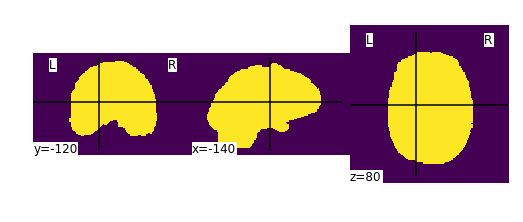

showing mask from given subset of dataset


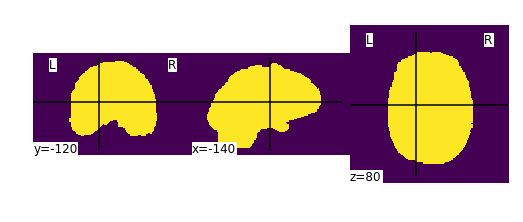

1
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_2013_pat0002_1/VSD.Brain.XX.O.MR_Flair.54518/VSD.Brain.XX.O.MR_Flair.54518.nii/mask.nii.gz
showing generated mask


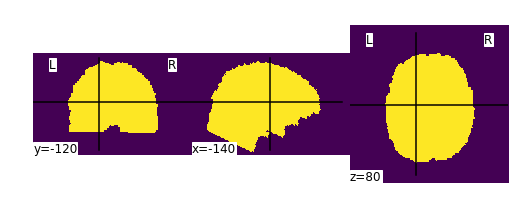

showing mask from given subset of dataset


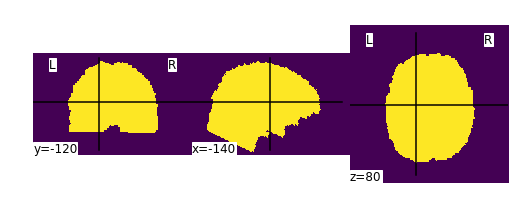

2
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_2013_pat0003_1/VSD.Brain.XX.O.MR_Flair.54524/VSD.Brain.XX.O.MR_Flair.54524.nii/mask.nii.gz
showing generated mask


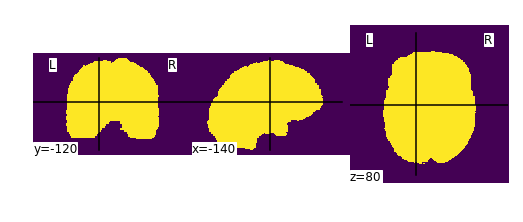

showing mask from given subset of dataset


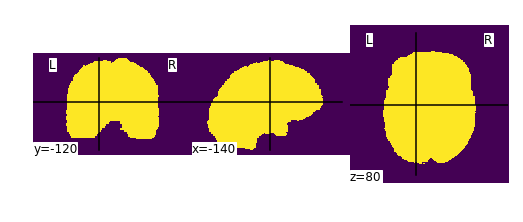

3
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_2013_pat0004_1/VSD.Brain.XX.O.MR_Flair.54530/VSD.Brain.XX.O.MR_Flair.54530.nii/mask.nii.gz
showing generated mask


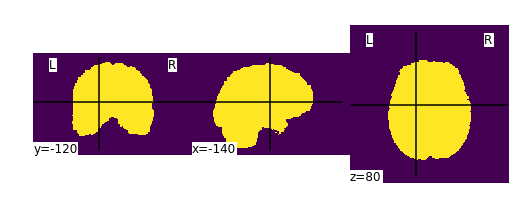

showing mask from given subset of dataset


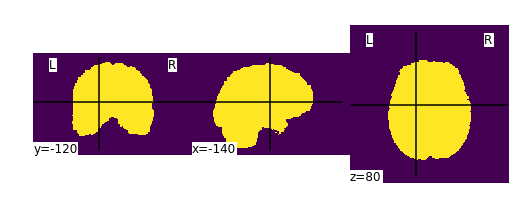

4
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_2013_pat0005_1/VSD.Brain.XX.O.MR_Flair.54536/VSD.Brain.XX.O.MR_Flair.54536.nii/mask.nii.gz
showing generated mask


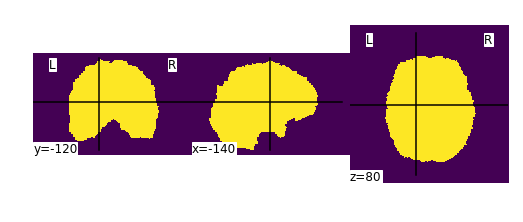

showing mask from given subset of dataset


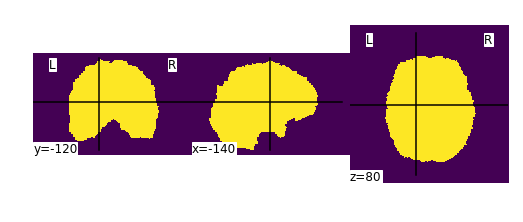

5
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_2013_pat0006_1/VSD.Brain.XX.O.MR_Flair.54542/VSD.Brain.XX.O.MR_Flair.54542.nii/mask.nii.gz
showing generated mask


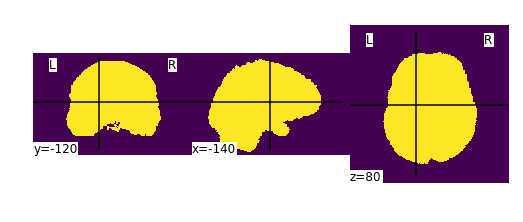

showing mask from given subset of dataset


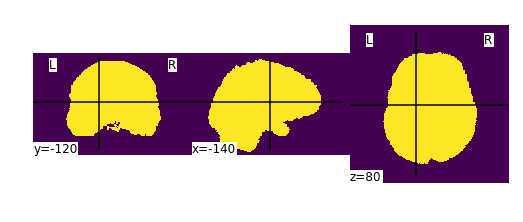

6
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_2013_pat0007_1/VSD.Brain.XX.O.MR_Flair.54548/VSD.Brain.XX.O.MR_Flair.54548.nii/mask.nii.gz
showing generated mask


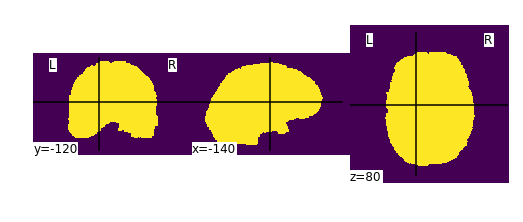

showing mask from given subset of dataset


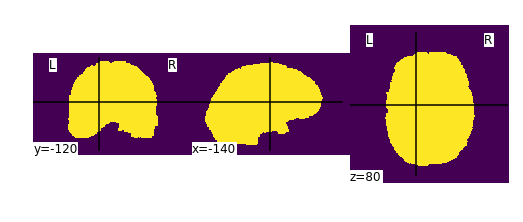

7
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_2013_pat0008_1/VSD.Brain.XX.O.MR_Flair.54554/VSD.Brain.XX.O.MR_Flair.54554.nii/mask.nii.gz
showing generated mask


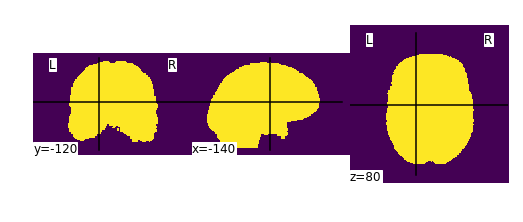

showing mask from given subset of dataset


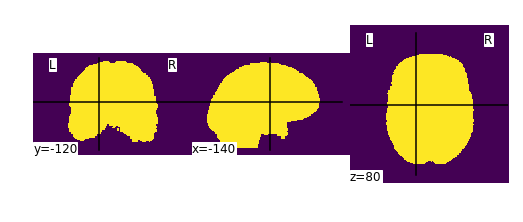

8
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_2013_pat0009_1/VSD.Brain.XX.O.MR_Flair.54560/VSD.Brain.XX.O.MR_Flair.54560.nii/mask.nii.gz
showing generated mask


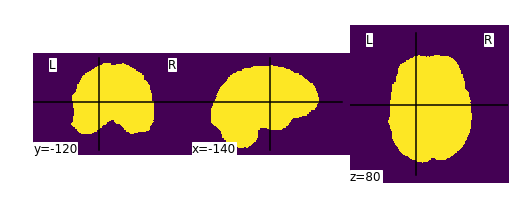

showing mask from given subset of dataset


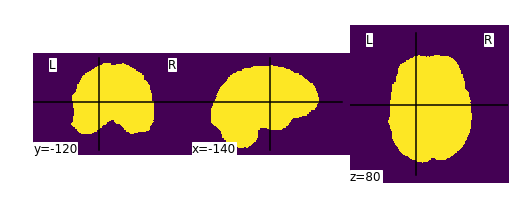

9
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_2013_pat0010_1/VSD.Brain.XX.O.MR_Flair.54566/VSD.Brain.XX.O.MR_Flair.54566.nii/mask.nii.gz
showing generated mask


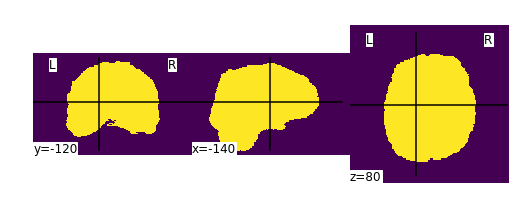

showing mask from given subset of dataset


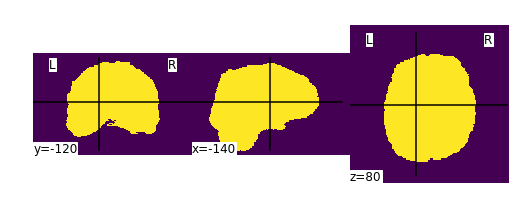

10
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_2013_pat0011_1/VSD.Brain.XX.O.MR_Flair.54572/VSD.Brain.XX.O.MR_Flair.54572.nii/mask.nii.gz
showing generated mask


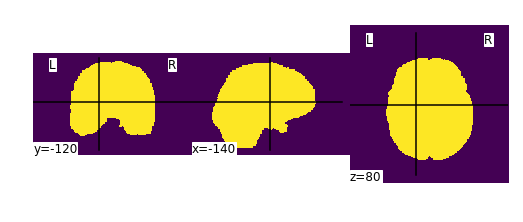

showing mask from given subset of dataset


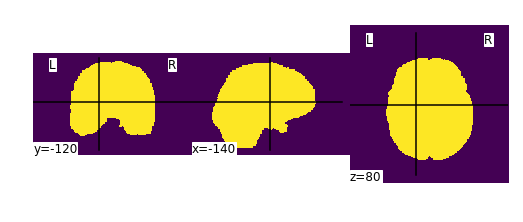

11
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_2013_pat0012_1/VSD.Brain.XX.O.MR_Flair.54578/VSD.Brain.XX.O.MR_Flair.54578.nii/mask.nii.gz
showing generated mask


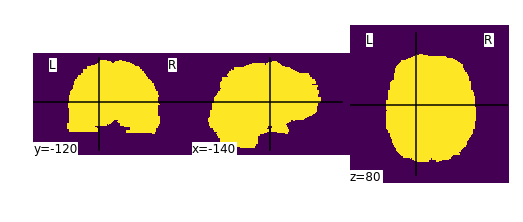

showing mask from given subset of dataset


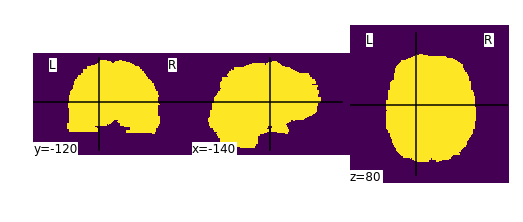

12
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_2013_pat0013_1/VSD.Brain.XX.O.MR_Flair.54584/VSD.Brain.XX.O.MR_Flair.54584.nii/mask.nii.gz
showing generated mask


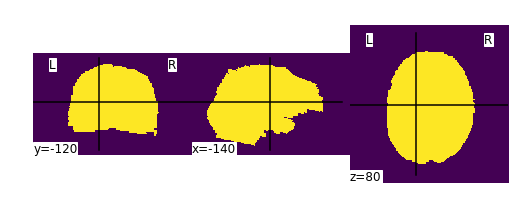

showing mask from given subset of dataset


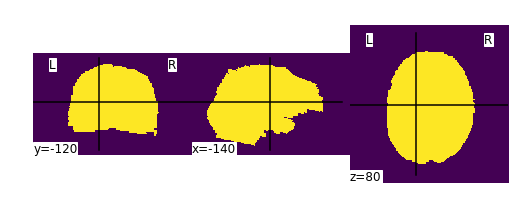

13
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_2013_pat0014_1/VSD.Brain.XX.O.MR_Flair.54590/VSD.Brain.XX.O.MR_Flair.54590.nii/mask.nii.gz
showing generated mask


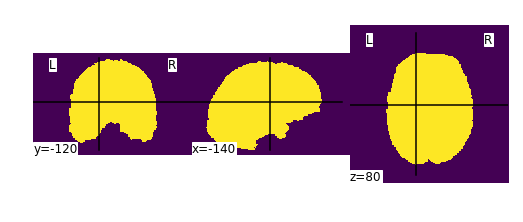

showing mask from given subset of dataset


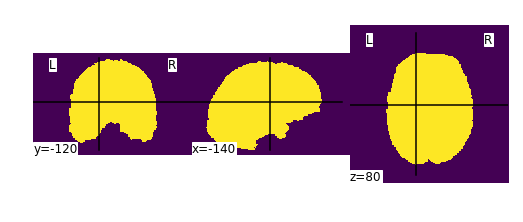

14
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_2013_pat0015_1/VSD.Brain.XX.O.MR_Flair.54596/VSD.Brain.XX.O.MR_Flair.54596.nii/mask.nii.gz
showing generated mask


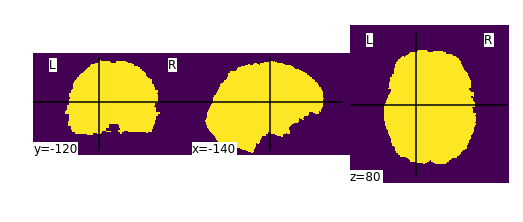

showing mask from given subset of dataset


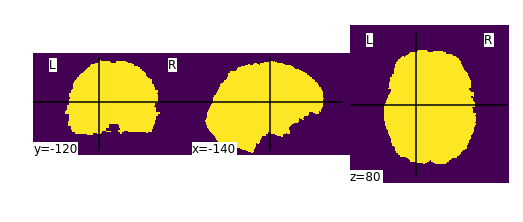

15
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_2013_pat0022_1/VSD.Brain.XX.O.MR_Flair.54602/VSD.Brain.XX.O.MR_Flair.54602.nii/mask.nii.gz
showing generated mask


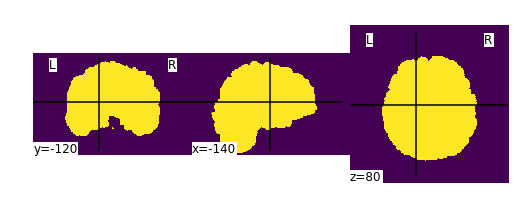

showing mask from given subset of dataset


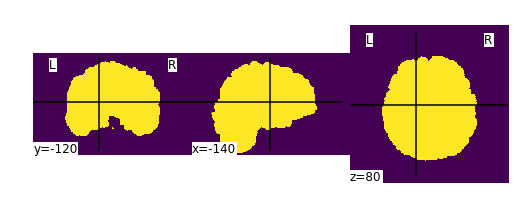

16
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_2013_pat0024_1/VSD.Brain.XX.O.MR_Flair.54608/VSD.Brain.XX.O.MR_Flair.54608.nii/mask.nii.gz
showing generated mask


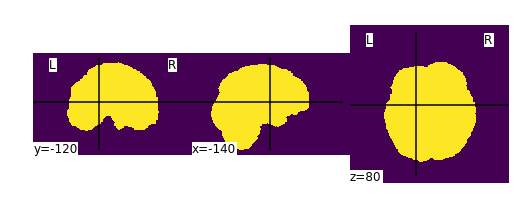

showing mask from given subset of dataset


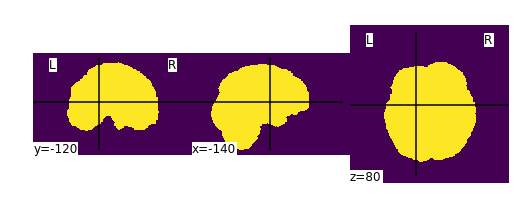

17
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_2013_pat0025_1/VSD.Brain.XX.O.MR_Flair.54614/VSD.Brain.XX.O.MR_Flair.54614.nii/mask.nii.gz
showing generated mask


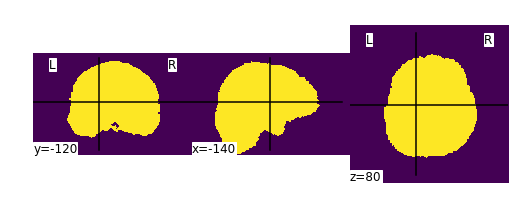

showing mask from given subset of dataset


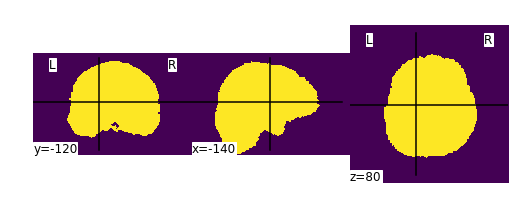

18
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_2013_pat0026_1/VSD.Brain.XX.O.MR_Flair.54620/VSD.Brain.XX.O.MR_Flair.54620.nii/mask.nii.gz
showing generated mask


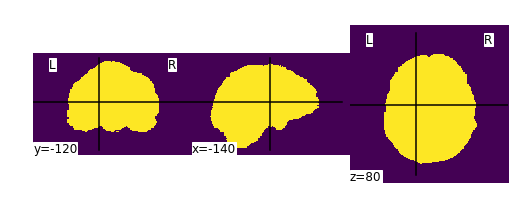

showing mask from given subset of dataset


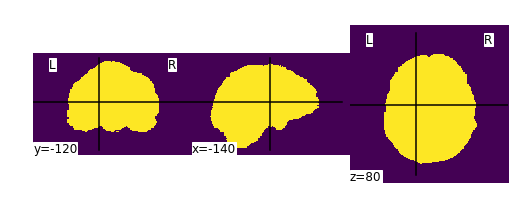

19
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_2013_pat0027_1/VSD.Brain.XX.O.MR_Flair.54626/VSD.Brain.XX.O.MR_Flair.54626.nii/mask.nii.gz
showing generated mask


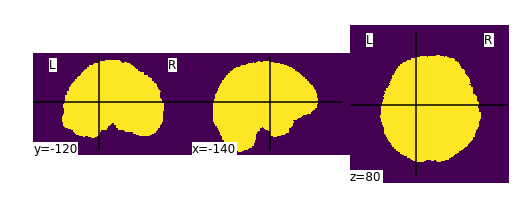

showing mask from given subset of dataset


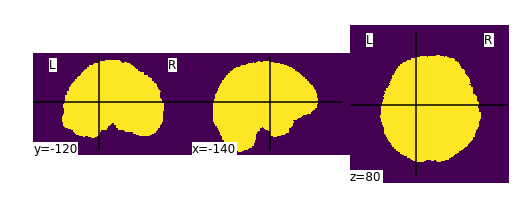

20
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat105_0001/VSD.Brain.XX.O.MR_Flair.35533/VSD.Brain.XX.O.MR_Flair.35533.nii/mask.nii.gz
showing generated mask


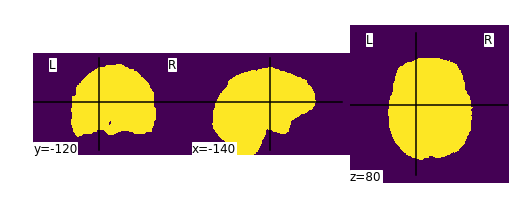

showing mask from given subset of dataset
21
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat111_0001/VSD.Brain.XX.O.MR_Flair.40827/VSD.Brain.XX.O.MR_Flair.40827.nii/mask.nii.gz
showing generated mask


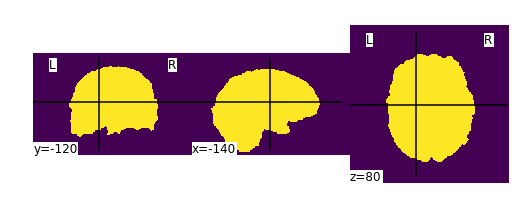

showing mask from given subset of dataset


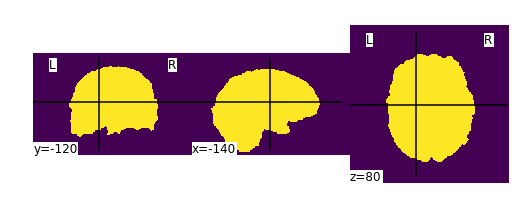

22
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat113_0001/VSD.Brain.XX.O.MR_Flair.35537/VSD.Brain.XX.O.MR_Flair.35537.nii/mask.nii.gz
showing generated mask


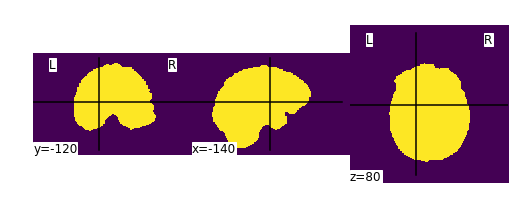

showing mask from given subset of dataset


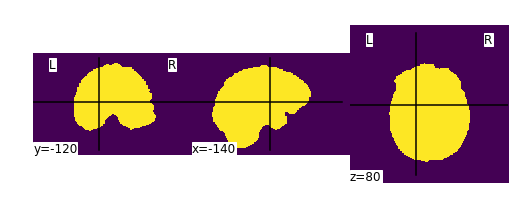

23
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat117_0001/VSD.Brain.XX.O.MR_Flair.35541/VSD.Brain.XX.O.MR_Flair.35541.nii/mask.nii.gz
showing generated mask


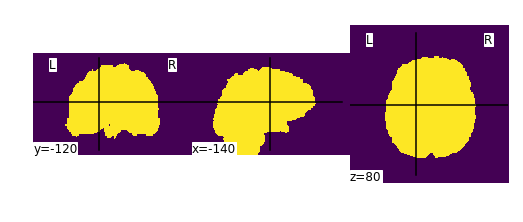

showing mask from given subset of dataset
24
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat118_0001/VSD.Brain.XX.O.MR_Flair.35545/VSD.Brain.XX.O.MR_Flair.35545.nii/mask.nii.gz
showing generated mask


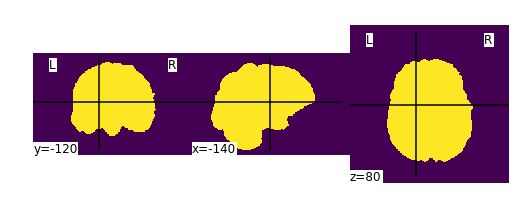

showing mask from given subset of dataset


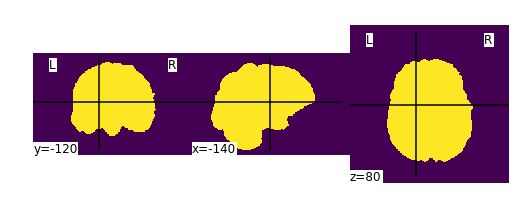

25
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat120_0001/VSD.Brain.XX.O.MR_Flair.35549/VSD.Brain.XX.O.MR_Flair.35549.nii/mask.nii.gz
showing generated mask


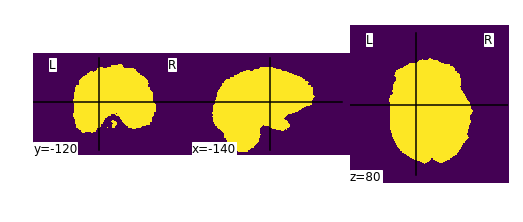

showing mask from given subset of dataset


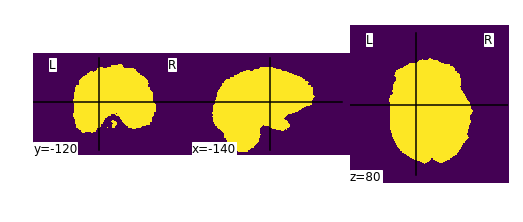

26
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat121_0001/VSD.Brain.XX.O.MR_Flair.35553/VSD.Brain.XX.O.MR_Flair.35553.nii/mask.nii.gz
showing generated mask


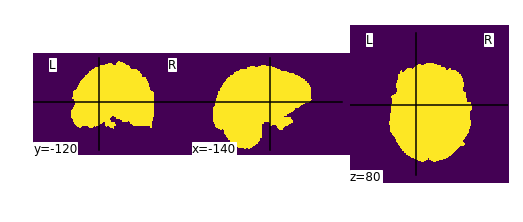

showing mask from given subset of dataset


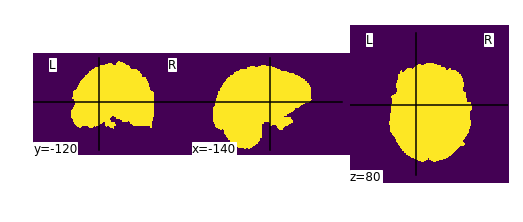

27
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat124_0003/VSD.Brain.XX.O.MR_Flair.35557/VSD.Brain.XX.O.MR_Flair.35557.nii/mask.nii.gz
showing generated mask


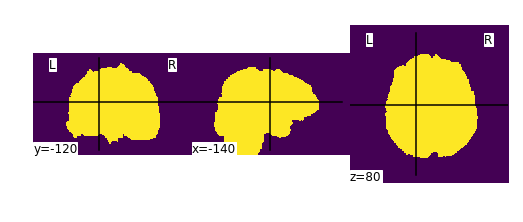

showing mask from given subset of dataset
28
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat131_0001/VSD.Brain.XX.O.MR_Flair.35561/VSD.Brain.XX.O.MR_Flair.35561.nii/mask.nii.gz
showing generated mask


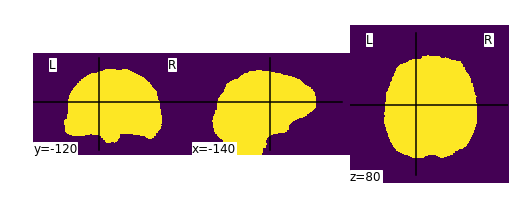

showing mask from given subset of dataset


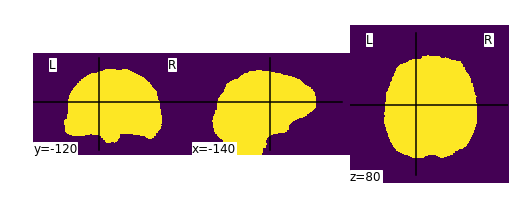

29
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat133_0001/VSD.Brain.XX.O.MR_Flair.35565/VSD.Brain.XX.O.MR_Flair.35565.nii/mask.nii.gz
showing generated mask


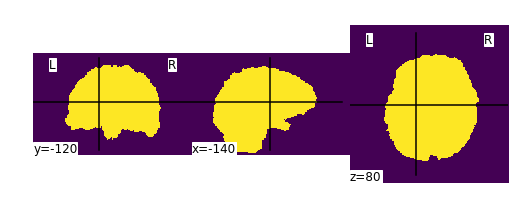

showing mask from given subset of dataset
30
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat135_0001/VSD.Brain.XX.O.MR_Flair.35573/VSD.Brain.XX.O.MR_Flair.35573.nii/mask.nii.gz
showing generated mask


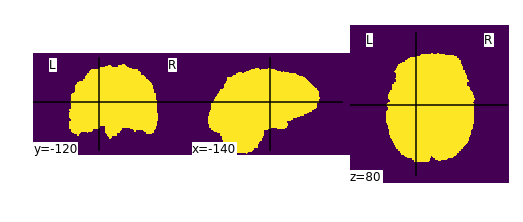

showing mask from given subset of dataset


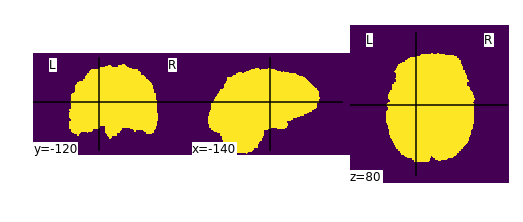

31
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat138_0001/VSD.Brain.XX.O.MR_Flair.35577/VSD.Brain.XX.O.MR_Flair.35577.nii/mask.nii.gz
showing generated mask


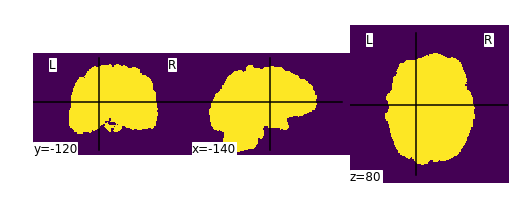

showing mask from given subset of dataset


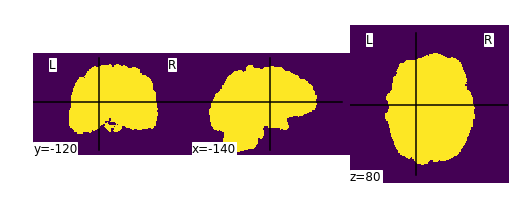

32
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat147_0001/VSD.Brain.XX.O.MR_Flair.35591/VSD.Brain.XX.O.MR_Flair.35591.nii/mask.nii.gz
showing generated mask


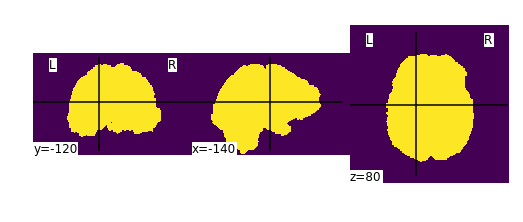

showing mask from given subset of dataset


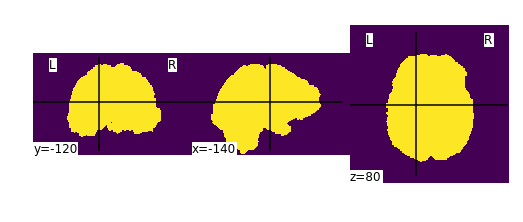

33
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat149_0001/VSD.Brain.XX.O.MR_Flair.35595/VSD.Brain.XX.O.MR_Flair.35595.nii/mask.nii.gz
showing generated mask


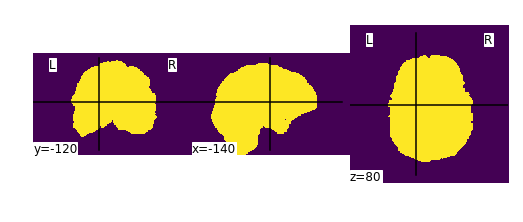

showing mask from given subset of dataset
34
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat150_0001/VSD.Brain.XX.O.MR_Flair.35599/VSD.Brain.XX.O.MR_Flair.35599.nii/mask.nii.gz
showing generated mask


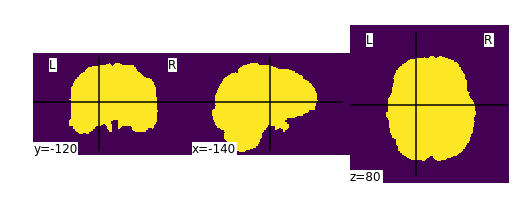

showing mask from given subset of dataset


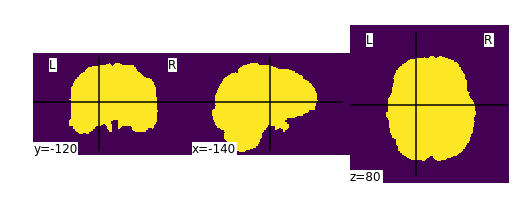

35
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat151_0001/VSD.Brain.XX.O.MR_Flair.35603/VSD.Brain.XX.O.MR_Flair.35603.nii/mask.nii.gz
showing generated mask


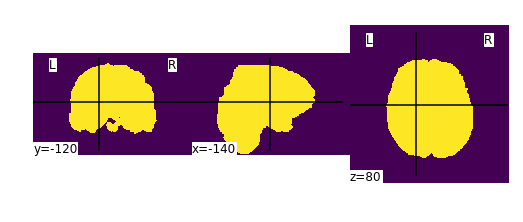

showing mask from given subset of dataset


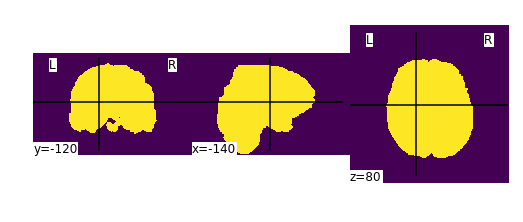

36
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat153_0002/VSD.Brain.XX.O.MR_Flair.40859/VSD.Brain.XX.O.MR_Flair.40859.nii/mask.nii.gz
showing generated mask


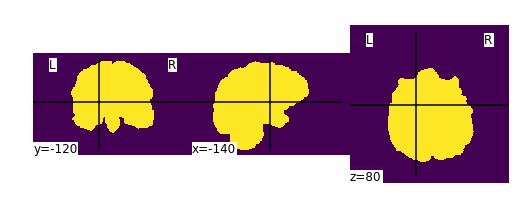

showing mask from given subset of dataset


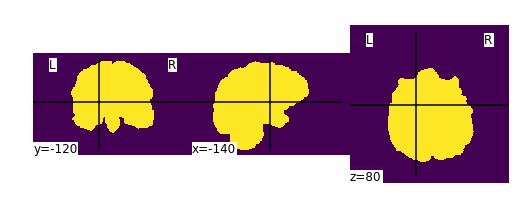

37
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat153_0109/VSD.Brain.XX.O.MR_Flair.40839/VSD.Brain.XX.O.MR_Flair.40839.nii/mask.nii.gz
showing generated mask


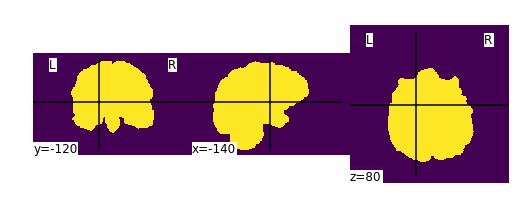

showing mask from given subset of dataset


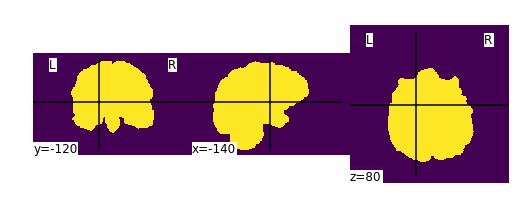

38
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat153_0165/VSD.Brain.XX.O.MR_Flair.40855/VSD.Brain.XX.O.MR_Flair.40855.nii/mask.nii.gz
showing generated mask


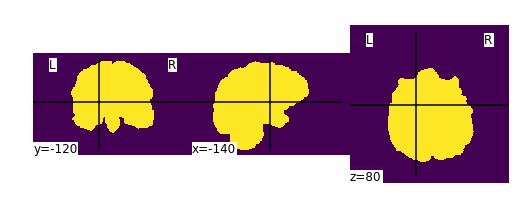

showing mask from given subset of dataset


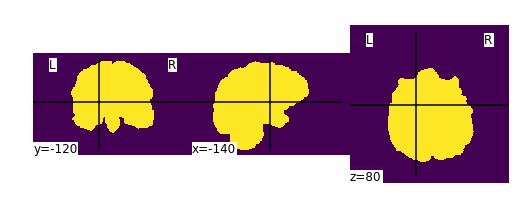

39
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat153_0181/VSD.Brain.XX.O.MR_Flair.40851/VSD.Brain.XX.O.MR_Flair.40851.nii/mask.nii.gz
showing generated mask


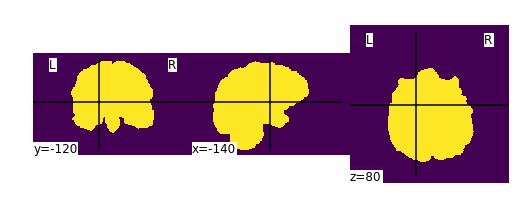

showing mask from given subset of dataset
40
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat153_0277/VSD.Brain.XX.O.MR_Flair.40847/VSD.Brain.XX.O.MR_Flair.40847.nii/mask.nii.gz
showing generated mask


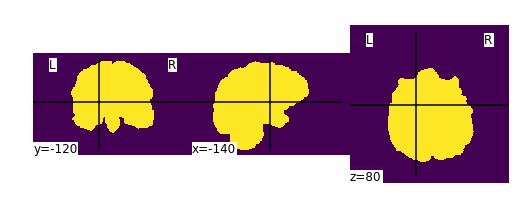

showing mask from given subset of dataset


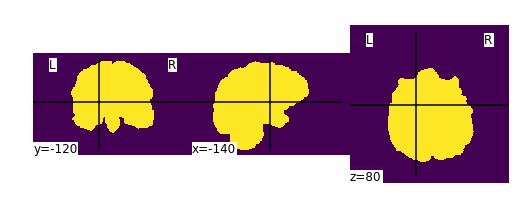

41
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat153_0294/VSD.Brain.XX.O.MR_Flair.40843/VSD.Brain.XX.O.MR_Flair.40843.nii/mask.nii.gz
showing generated mask


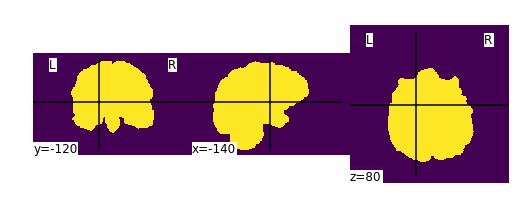

showing mask from given subset of dataset


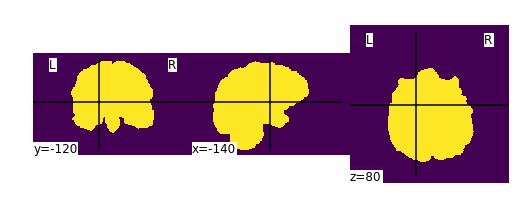

42
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat156_0001/VSD.Brain.XX.O.MR_Flair.35607/VSD.Brain.XX.O.MR_Flair.35607.nii/mask.nii.gz
showing generated mask


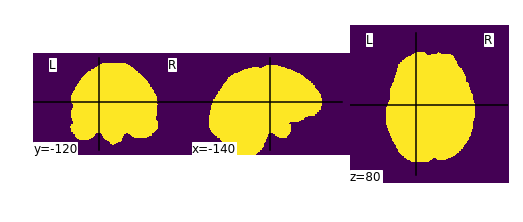

showing mask from given subset of dataset


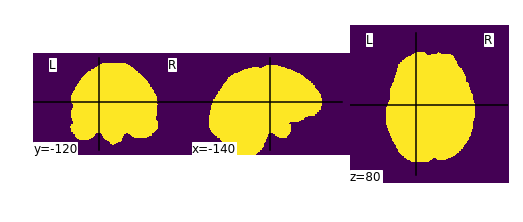

43
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat157_0001/VSD.Brain.XX.O.MR_Flair.40863/VSD.Brain.XX.O.MR_Flair.40863.nii/mask.nii.gz
showing generated mask


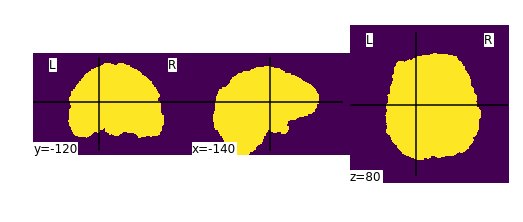

showing mask from given subset of dataset


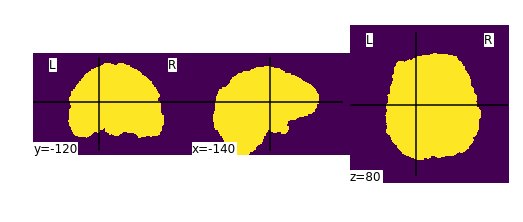

44
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat162_0001/VSD.Brain.XX.O.MR_Flair.35611/VSD.Brain.XX.O.MR_Flair.35611.nii/mask.nii.gz
showing generated mask


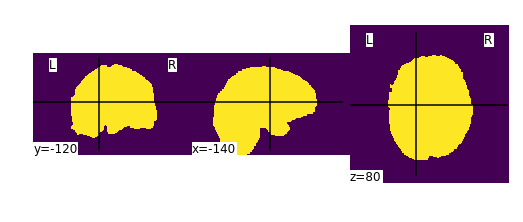

showing mask from given subset of dataset


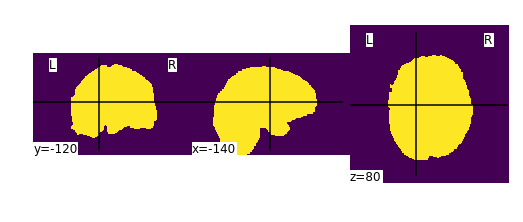

45
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat164_0001/VSD.Brain.XX.O.MR_Flair.35615/VSD.Brain.XX.O.MR_Flair.35615.nii/mask.nii.gz
showing generated mask


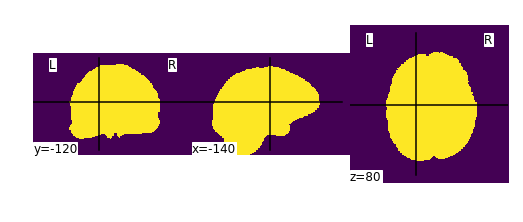

showing mask from given subset of dataset


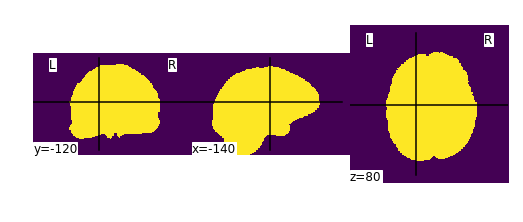

46
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat165_0001/VSD.Brain.XX.O.MR_Flair.40871/VSD.Brain.XX.O.MR_Flair.40871.nii/mask.nii.gz
showing generated mask


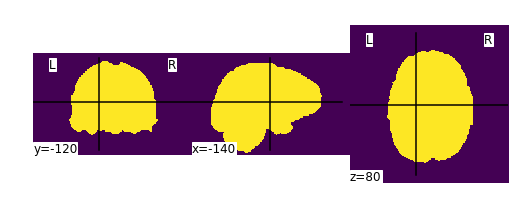

showing mask from given subset of dataset
47
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat167_0001/VSD.Brain.XX.O.MR_Flair.35619/VSD.Brain.XX.O.MR_Flair.35619.nii/mask.nii.gz
showing generated mask


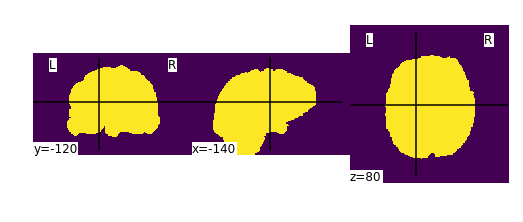

showing mask from given subset of dataset


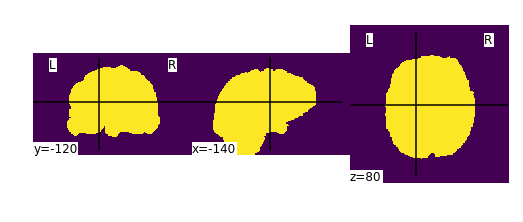

48
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat168_0001/VSD.Brain.XX.O.MR_Flair.35623/VSD.Brain.XX.O.MR_Flair.35623.nii/mask.nii.gz
showing generated mask


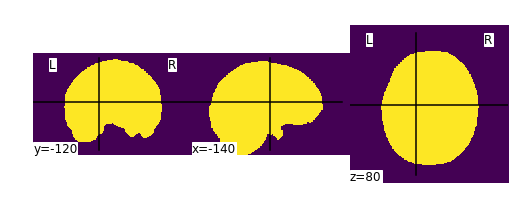

showing mask from given subset of dataset


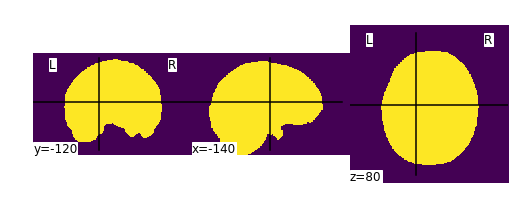

49
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat170_0002/VSD.Brain.XX.O.MR_Flair.35627/VSD.Brain.XX.O.MR_Flair.35627.nii/mask.nii.gz
showing generated mask


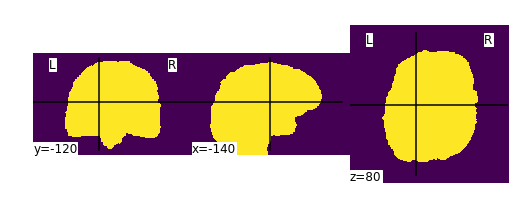

showing mask from given subset of dataset
50
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat171_0001/VSD.Brain.XX.O.MR_Flair.35647/VSD.Brain.XX.O.MR_Flair.35647.nii/mask.nii.gz
showing generated mask


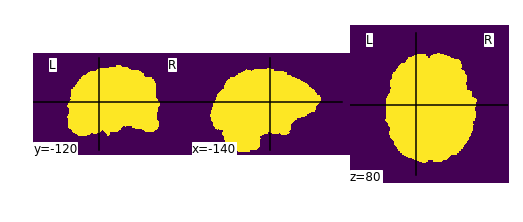

showing mask from given subset of dataset


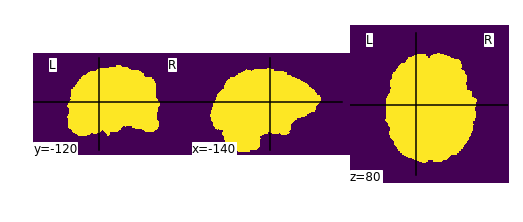

51
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat171_0200/VSD.Brain.XX.O.MR_Flair.35651/VSD.Brain.XX.O.MR_Flair.35651.nii/mask.nii.gz
showing generated mask


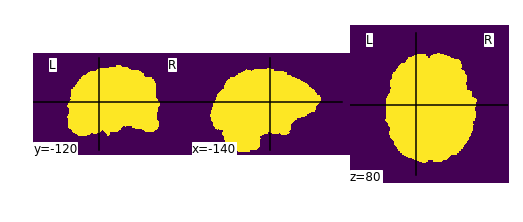

showing mask from given subset of dataset


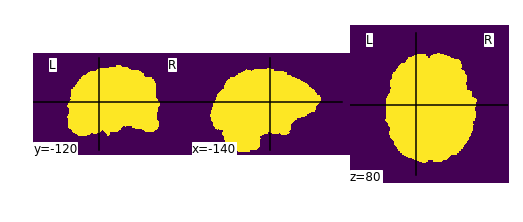

52
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat171_0387/VSD.Brain.XX.O.MR_Flair.35659/VSD.Brain.XX.O.MR_Flair.35659.nii/mask.nii.gz
showing generated mask


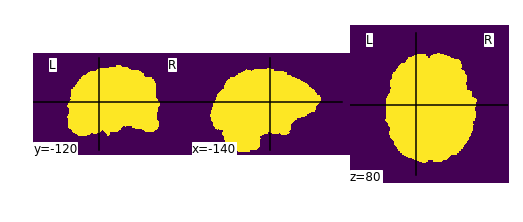

showing mask from given subset of dataset


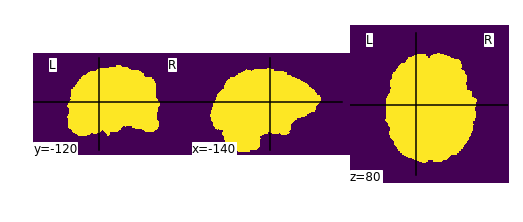

53
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat171_0618/VSD.Brain.XX.O.MR_Flair.35643/VSD.Brain.XX.O.MR_Flair.35643.nii/mask.nii.gz
showing generated mask


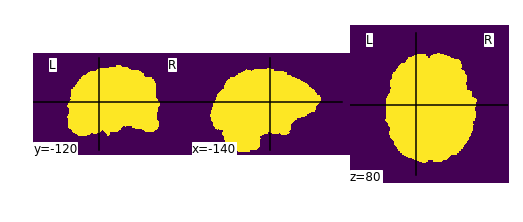

showing mask from given subset of dataset


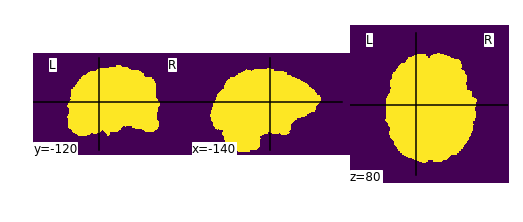

54
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat171_0780/VSD.Brain.XX.O.MR_Flair.35635/VSD.Brain.XX.O.MR_Flair.35635.nii/mask.nii.gz
showing generated mask


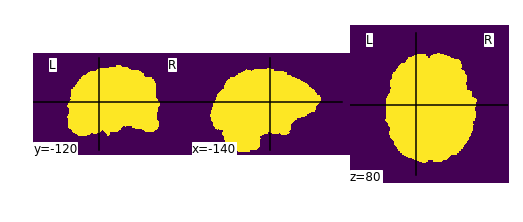

showing mask from given subset of dataset


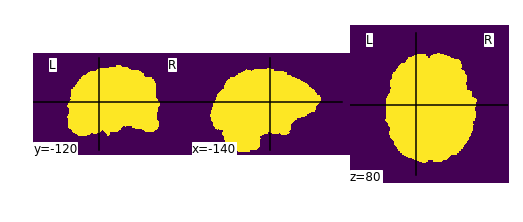

55
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat171_0950/VSD.Brain.XX.O.MR_Flair.35655/VSD.Brain.XX.O.MR_Flair.35655.nii/mask.nii.gz
showing generated mask


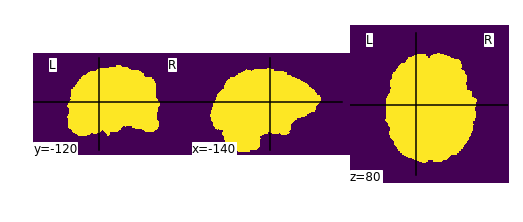

showing mask from given subset of dataset


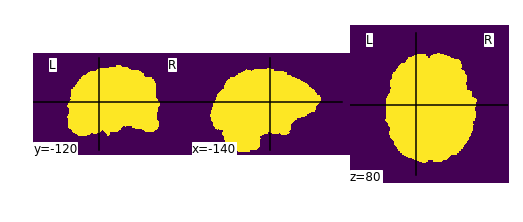

56
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat171_1126/VSD.Brain.XX.O.MR_Flair.35631/VSD.Brain.XX.O.MR_Flair.35631.nii/mask.nii.gz
showing generated mask


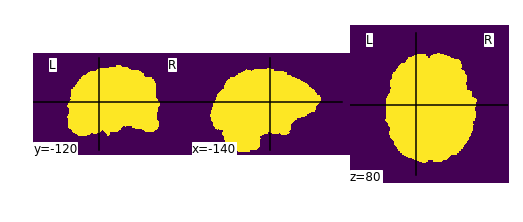

showing mask from given subset of dataset


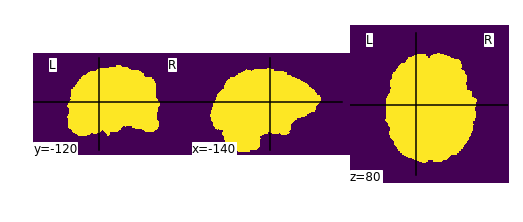

57
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat171_1231/VSD.Brain.XX.O.MR_Flair.35639/VSD.Brain.XX.O.MR_Flair.35639.nii/mask.nii.gz
showing generated mask


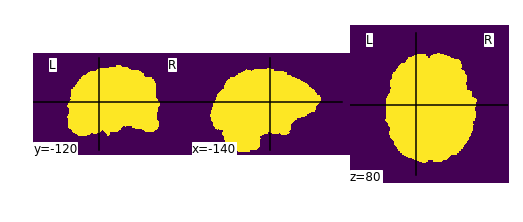

showing mask from given subset of dataset


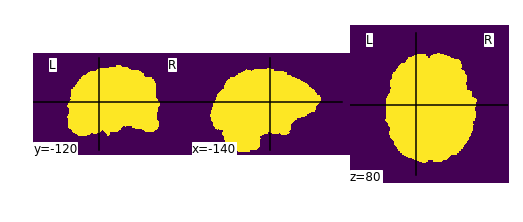

58
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat173_0001/VSD.Brain.XX.O.MR_Flair.35663/VSD.Brain.XX.O.MR_Flair.35663.nii/mask.nii.gz
showing generated mask


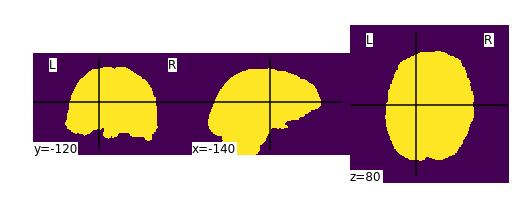

showing mask from given subset of dataset


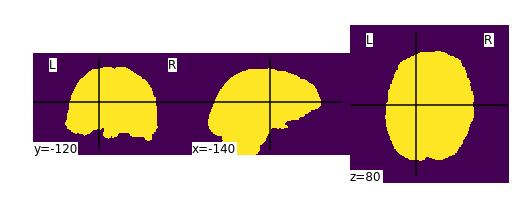

59
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat178_0002/VSD.Brain.XX.O.MR_Flair.35674/VSD.Brain.XX.O.MR_Flair.35674.nii/mask.nii.gz
showing generated mask


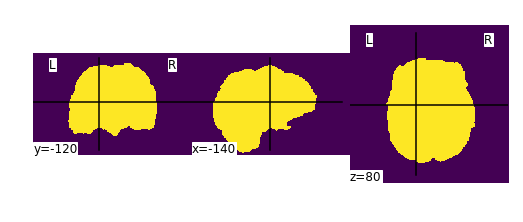

showing mask from given subset of dataset


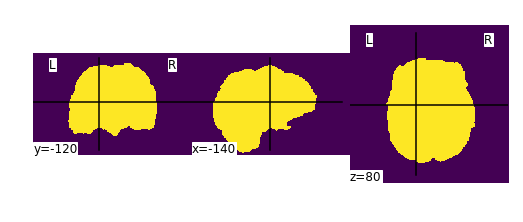

60
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat179_0001/VSD.Brain.XX.O.MR_Flair.40879/VSD.Brain.XX.O.MR_Flair.40879.nii/mask.nii.gz
showing generated mask


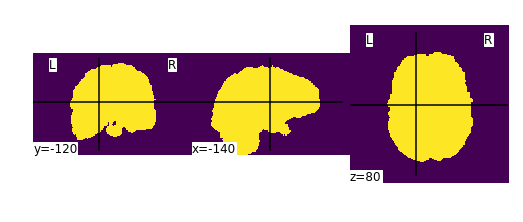

showing mask from given subset of dataset


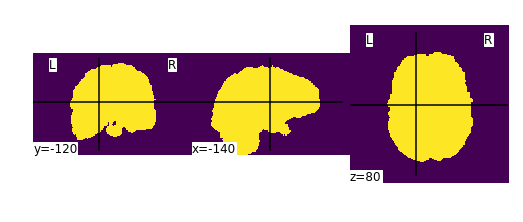

61
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat180_0001/VSD.Brain.XX.O.MR_Flair.35678/VSD.Brain.XX.O.MR_Flair.35678.nii/mask.nii.gz
showing generated mask


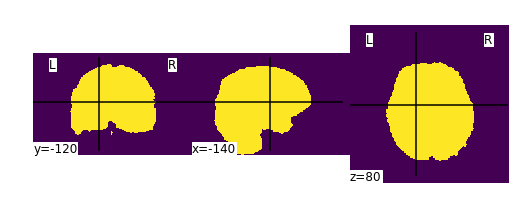

showing mask from given subset of dataset


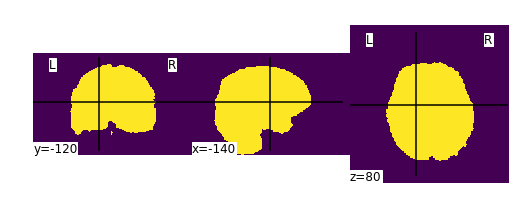

62
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat183_0001/VSD.Brain.XX.O.MR_Flair.35682/VSD.Brain.XX.O.MR_Flair.35682.nii/mask.nii.gz
showing generated mask


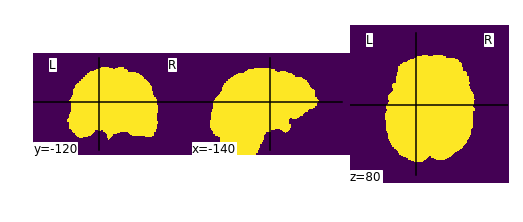

showing mask from given subset of dataset


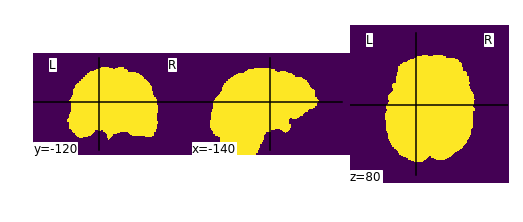

63
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat184_0001/VSD.Brain.XX.O.MR_Flair.35686/VSD.Brain.XX.O.MR_Flair.35686.nii/mask.nii.gz
showing generated mask


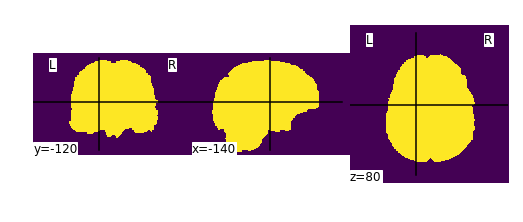

showing mask from given subset of dataset


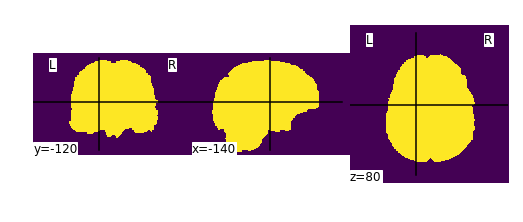

64
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat186_0001/VSD.Brain.XX.O.MR_Flair.35690/VSD.Brain.XX.O.MR_Flair.35690.nii/mask.nii.gz
showing generated mask


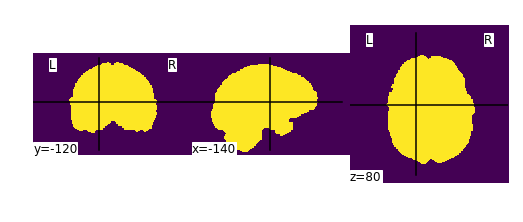

showing mask from given subset of dataset


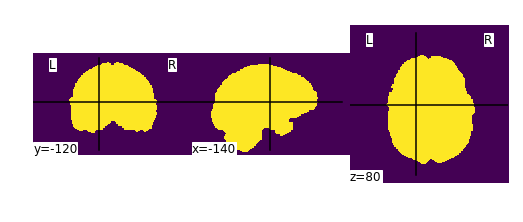

65
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat190_0001/VSD.Brain.XX.O.MR_Flair.40887/VSD.Brain.XX.O.MR_Flair.40887.nii/mask.nii.gz
showing generated mask


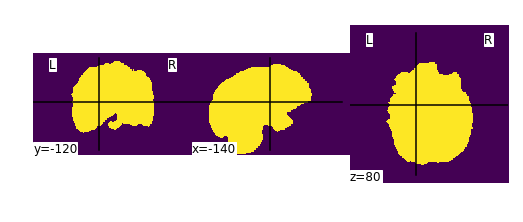

showing mask from given subset of dataset


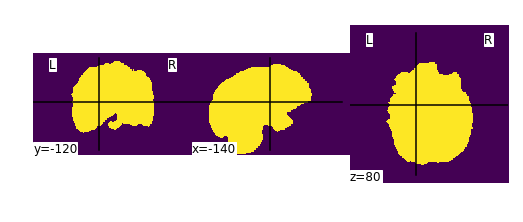

66
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat192_0001/VSD.Brain.XX.O.MR_Flair.35694/VSD.Brain.XX.O.MR_Flair.35694.nii/mask.nii.gz
showing generated mask


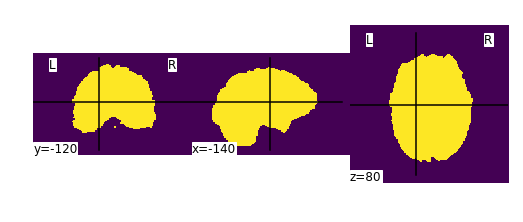

showing mask from given subset of dataset


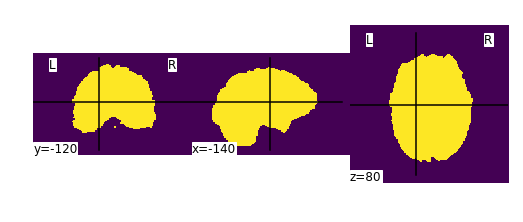

67
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat193_0002/VSD.Brain.XX.O.MR_Flair.35698/VSD.Brain.XX.O.MR_Flair.35698.nii/mask.nii.gz
showing generated mask


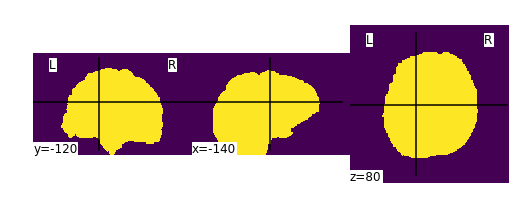

showing mask from given subset of dataset


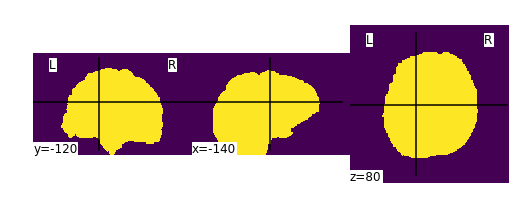

68
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat198_0001/VSD.Brain.XX.O.MR_Flair.35706/VSD.Brain.XX.O.MR_Flair.35706.nii/mask.nii.gz
showing generated mask


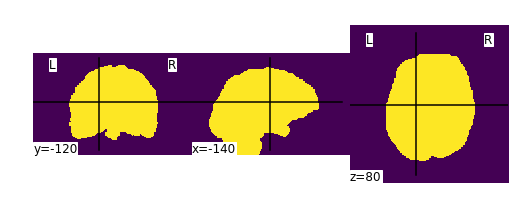

showing mask from given subset of dataset


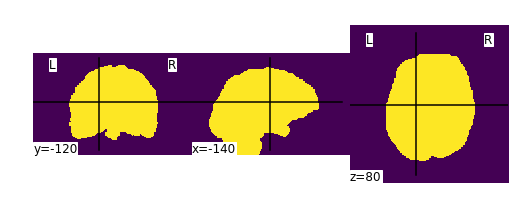

69
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat198_0283/VSD.Brain.XX.O.MR_Flair.35710/VSD.Brain.XX.O.MR_Flair.35710.nii/mask.nii.gz
showing generated mask


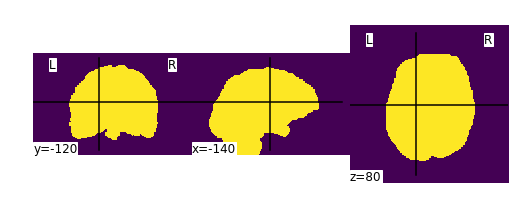

showing mask from given subset of dataset


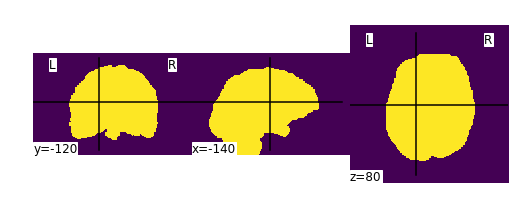

70
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat199_0001/VSD.Brain.XX.O.MR_Flair.35714/VSD.Brain.XX.O.MR_Flair.35714.nii/mask.nii.gz
showing generated mask


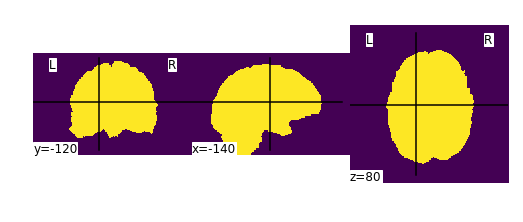

showing mask from given subset of dataset


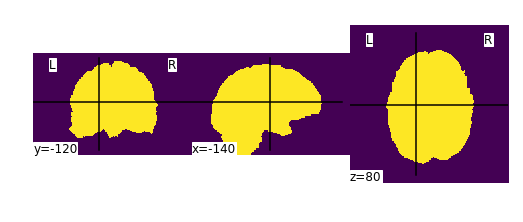

71
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat200_0210/VSD.Brain.XX.O.MR_Flair.40895/VSD.Brain.XX.O.MR_Flair.40895.nii/mask.nii.gz
showing generated mask


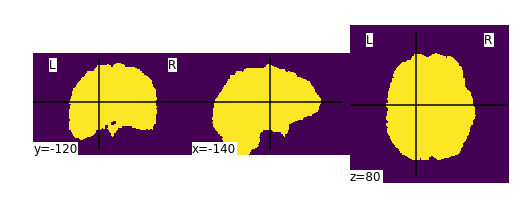

showing mask from given subset of dataset


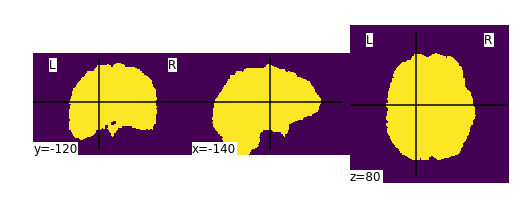

72
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat201_0001/VSD.Brain.XX.O.MR_Flair.40903/VSD.Brain.XX.O.MR_Flair.40903.nii/mask.nii.gz
showing generated mask


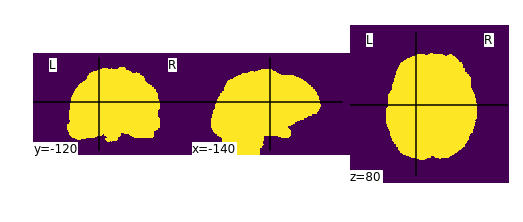

showing mask from given subset of dataset
73
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat203_0001/VSD.Brain.XX.O.MR_Flair.35722/VSD.Brain.XX.O.MR_Flair.35722.nii/mask.nii.gz
showing generated mask


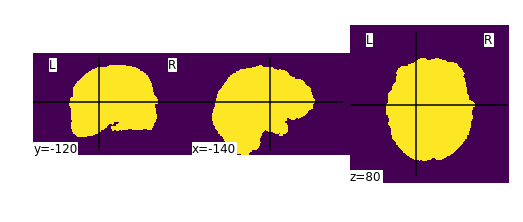

showing mask from given subset of dataset
74
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat205_0001/VSD.Brain.XX.O.MR_Flair.35728/VSD.Brain.XX.O.MR_Flair.35728.nii/mask.nii.gz
showing generated mask


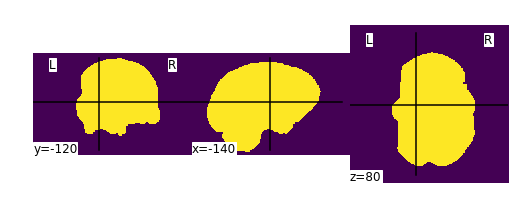

showing mask from given subset of dataset
75
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat208_0001/VSD.Brain.XX.O.MR_Flair.35732/VSD.Brain.XX.O.MR_Flair.35732.nii/mask.nii.gz
showing generated mask


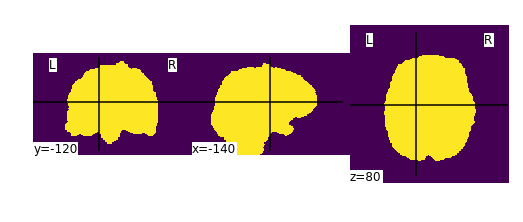

showing mask from given subset of dataset
76
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat211_0001/VSD.Brain.XX.O.MR_Flair.35736/VSD.Brain.XX.O.MR_Flair.35736.nii/mask.nii.gz
showing generated mask


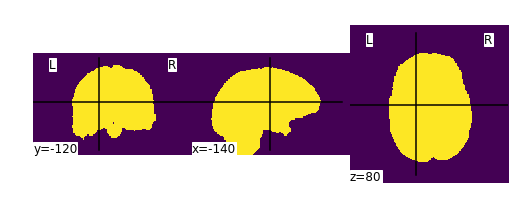

showing mask from given subset of dataset
77
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat217_0001/VSD.Brain.XX.O.MR_Flair.35752/VSD.Brain.XX.O.MR_Flair.35752.nii/mask.nii.gz
showing generated mask


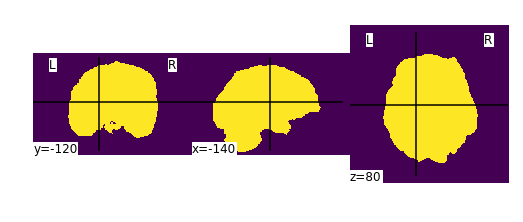

showing mask from given subset of dataset
78
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat218_0001/VSD.Brain.XX.O.MR_Flair.35756/VSD.Brain.XX.O.MR_Flair.35756.nii/mask.nii.gz
showing generated mask


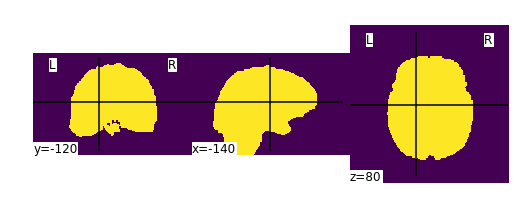

showing mask from given subset of dataset
79
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat221_0001/VSD.Brain.XX.O.MR_Flair.35760/VSD.Brain.XX.O.MR_Flair.35760.nii/mask.nii.gz
showing generated mask


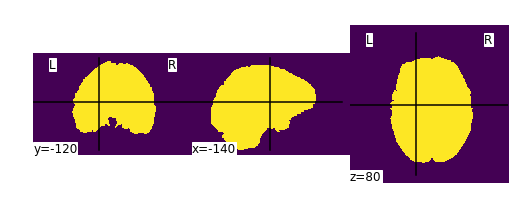

showing mask from given subset of dataset
80
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat222_0122/VSD.Brain.XX.O.MR_Flair.40915/VSD.Brain.XX.O.MR_Flair.40915.nii/mask.nii.gz
showing generated mask


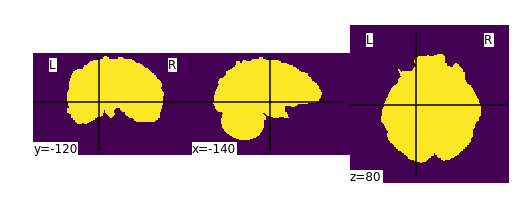

showing mask from given subset of dataset
81
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat222_0304/VSD.Brain.XX.O.MR_Flair.40907/VSD.Brain.XX.O.MR_Flair.40907.nii/mask.nii.gz
showing generated mask


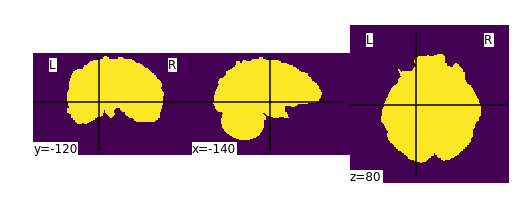

showing mask from given subset of dataset
82
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat226_0001/VSD.Brain.XX.O.MR_Flair.40919/VSD.Brain.XX.O.MR_Flair.40919.nii/mask.nii.gz
showing generated mask


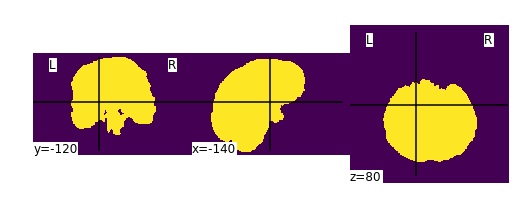

showing mask from given subset of dataset
83
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat226_0090/VSD.Brain.XX.O.MR_Flair.40923/VSD.Brain.XX.O.MR_Flair.40923.nii/mask.nii.gz
showing generated mask


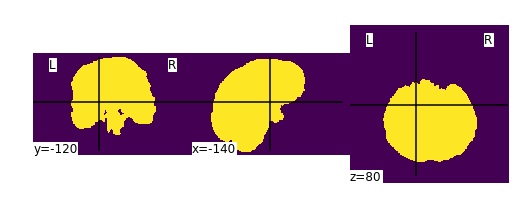

showing mask from given subset of dataset
84
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat230_0199/VSD.Brain.XX.O.MR_Flair.35780/VSD.Brain.XX.O.MR_Flair.35780.nii/mask.nii.gz
showing generated mask


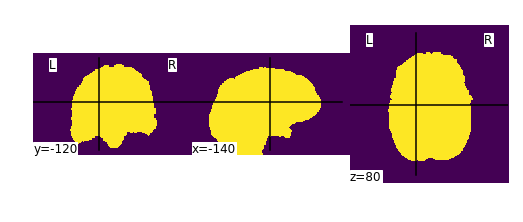

showing mask from given subset of dataset
85
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat230_0481/VSD.Brain.XX.O.MR_Flair.35776/VSD.Brain.XX.O.MR_Flair.35776.nii/mask.nii.gz
showing generated mask


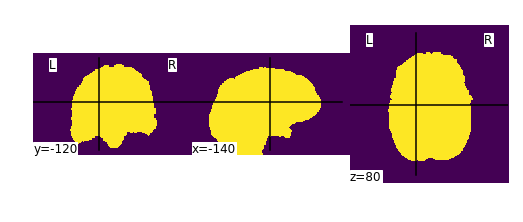

showing mask from given subset of dataset
86
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat230_0511/VSD.Brain.XX.O.MR_Flair.35796/VSD.Brain.XX.O.MR_Flair.35796.nii/mask.nii.gz
showing generated mask


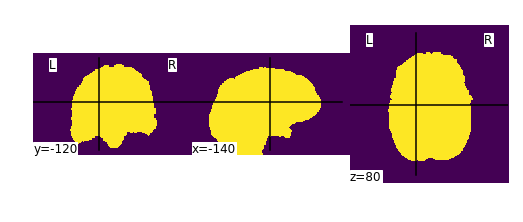

showing mask from given subset of dataset
87
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat230_0637/VSD.Brain.XX.O.MR_Flair.35792/VSD.Brain.XX.O.MR_Flair.35792.nii/mask.nii.gz
showing generated mask


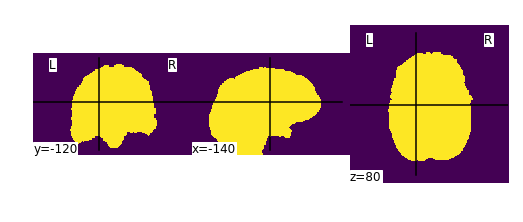

showing mask from given subset of dataset
88
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat230_0710/VSD.Brain.XX.O.MR_Flair.35788/VSD.Brain.XX.O.MR_Flair.35788.nii/mask.nii.gz
showing generated mask


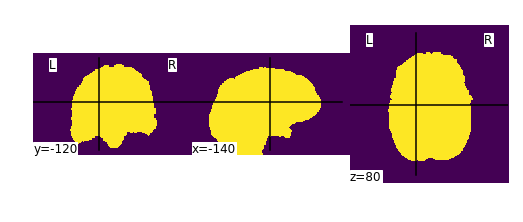

showing mask from given subset of dataset
89
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat231_0001/VSD.Brain.XX.O.MR_Flair.40927/VSD.Brain.XX.O.MR_Flair.40927.nii/mask.nii.gz
showing generated mask


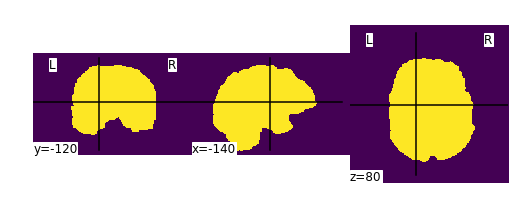

showing mask from given subset of dataset
90
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat234_0001/VSD.Brain.XX.O.MR_Flair.35800/VSD.Brain.XX.O.MR_Flair.35800.nii/mask.nii.gz
showing generated mask


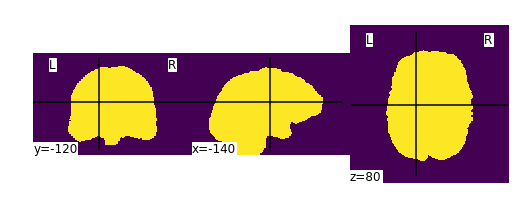

showing mask from given subset of dataset
91
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat235_0001/VSD.Brain.XX.O.MR_Flair.35804/VSD.Brain.XX.O.MR_Flair.35804.nii/mask.nii.gz
showing generated mask


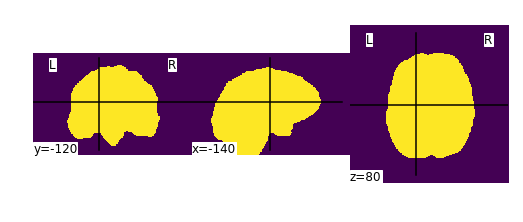

showing mask from given subset of dataset
92
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat242_0001/VSD.Brain.XX.O.MR_Flair.35808/VSD.Brain.XX.O.MR_Flair.35808.nii/mask.nii.gz
showing generated mask


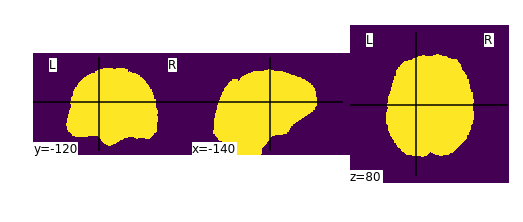

showing mask from given subset of dataset
93
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat247_0001/VSD.Brain.XX.O.MR_Flair.35820/VSD.Brain.XX.O.MR_Flair.35820.nii/mask.nii.gz
showing generated mask


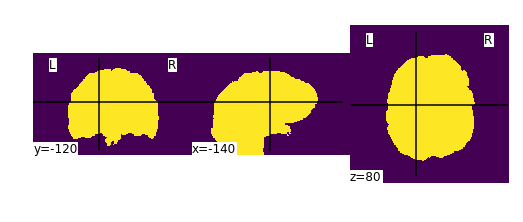

showing mask from given subset of dataset
94
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat257_0001/VSD.Brain.XX.O.MR_Flair.35848/VSD.Brain.XX.O.MR_Flair.35848.nii/mask.nii.gz
showing generated mask


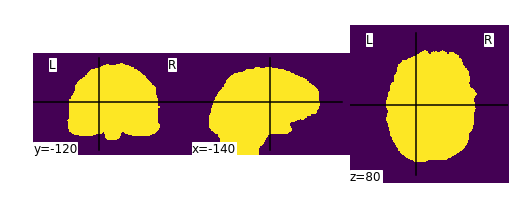

showing mask from given subset of dataset
95
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat258_0001/VSD.Brain.XX.O.MR_Flair.40935/VSD.Brain.XX.O.MR_Flair.40935.nii/mask.nii.gz
showing generated mask


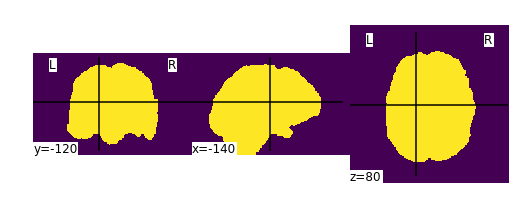

showing mask from given subset of dataset
96
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat260_0001/VSD.Brain.XX.O.MR_Flair.35872/VSD.Brain.XX.O.MR_Flair.35872.nii/mask.nii.gz
showing generated mask


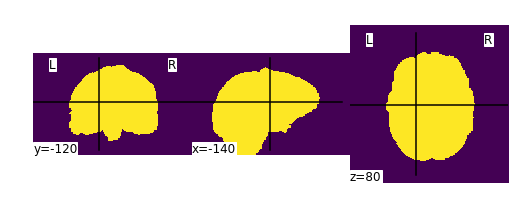

showing mask from given subset of dataset
97
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat260_0075/VSD.Brain.XX.O.MR_Flair.35868/VSD.Brain.XX.O.MR_Flair.35868.nii/mask.nii.gz
showing generated mask


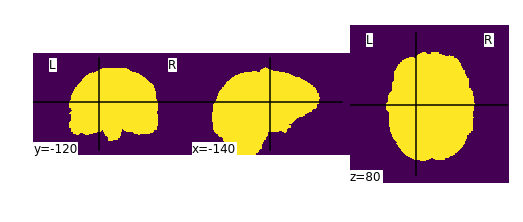

showing mask from given subset of dataset
98
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat260_0129/VSD.Brain.XX.O.MR_Flair.35864/VSD.Brain.XX.O.MR_Flair.35864.nii/mask.nii.gz
showing generated mask


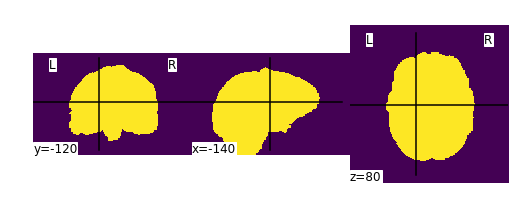

showing mask from given subset of dataset
99
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat260_0152/VSD.Brain.XX.O.MR_Flair.35860/VSD.Brain.XX.O.MR_Flair.35860.nii/mask.nii.gz
showing generated mask


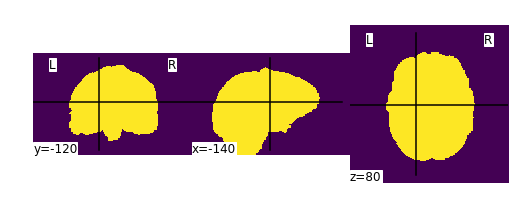

showing mask from given subset of dataset
100
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat260_0244/VSD.Brain.XX.O.MR_Flair.35856/VSD.Brain.XX.O.MR_Flair.35856.nii/mask.nii.gz
showing generated mask


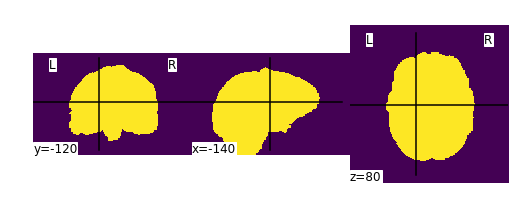

showing mask from given subset of dataset
101
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat260_0317/VSD.Brain.XX.O.MR_Flair.35852/VSD.Brain.XX.O.MR_Flair.35852.nii/mask.nii.gz
showing generated mask


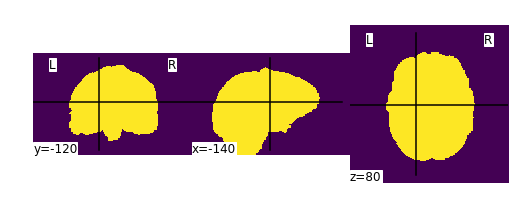

showing mask from given subset of dataset
102
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat265_0001/VSD.Brain.XX.O.MR_Flair.35884/VSD.Brain.XX.O.MR_Flair.35884.nii/mask.nii.gz
showing generated mask


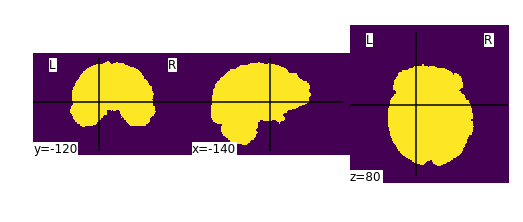

showing mask from given subset of dataset
103
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat274_0001/VSD.Brain.XX.O.MR_Flair.35898/VSD.Brain.XX.O.MR_Flair.35898.nii/mask.nii.gz
showing generated mask


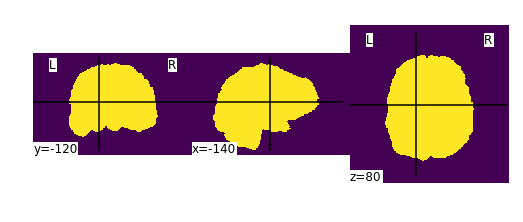

showing mask from given subset of dataset
104
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat277_0001/VSD.Brain.XX.O.MR_Flair.35906/VSD.Brain.XX.O.MR_Flair.35906.nii/mask.nii.gz
showing generated mask


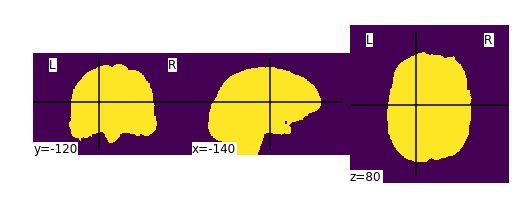

showing mask from given subset of dataset
105
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat278_0001/VSD.Brain.XX.O.MR_Flair.35910/VSD.Brain.XX.O.MR_Flair.35910.nii/mask.nii.gz
showing generated mask


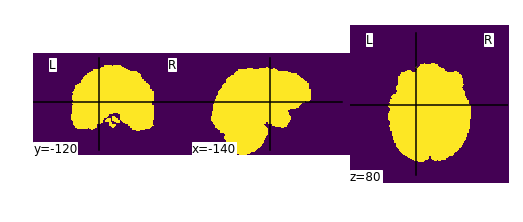

showing mask from given subset of dataset
106
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat280_0001/VSD.Brain.XX.O.MR_Flair.35926/VSD.Brain.XX.O.MR_Flair.35926.nii/mask.nii.gz
showing generated mask


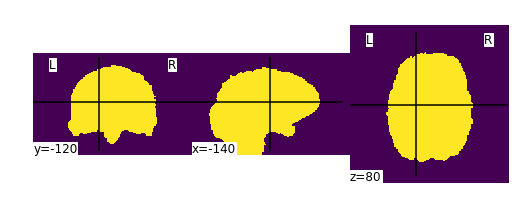

showing mask from given subset of dataset
107
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat280_0003/VSD.Brain.XX.O.MR_Flair.35914/VSD.Brain.XX.O.MR_Flair.35914.nii/mask.nii.gz
showing generated mask


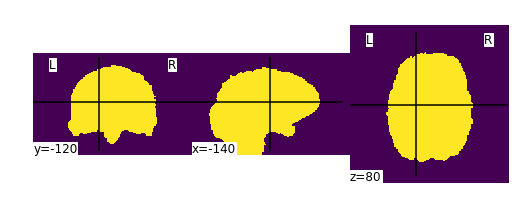

showing mask from given subset of dataset
108
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat283_0001/VSD.Brain.XX.O.MR_Flair.35930/VSD.Brain.XX.O.MR_Flair.35930.nii/mask.nii.gz
showing generated mask


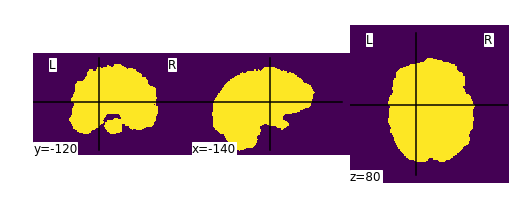

showing mask from given subset of dataset
109
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat290_0001/VSD.Brain.XX.O.MR_Flair.40963/VSD.Brain.XX.O.MR_Flair.40963.nii/mask.nii.gz
showing generated mask


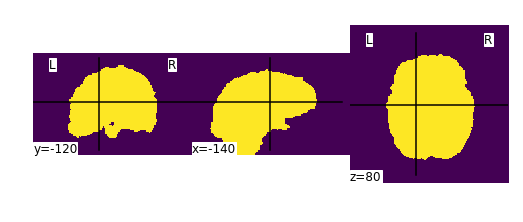

showing mask from given subset of dataset
110
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat290_0305/VSD.Brain.XX.O.MR_Flair.40955/VSD.Brain.XX.O.MR_Flair.40955.nii/mask.nii.gz
showing generated mask


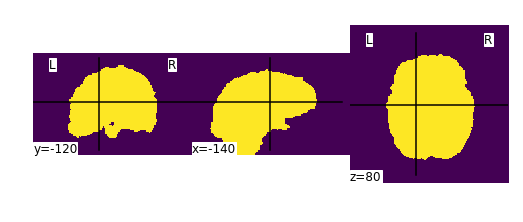

showing mask from given subset of dataset
111
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat290_0412/VSD.Brain.XX.O.MR_Flair.41636/VSD.Brain.XX.O.MR_Flair.41636.nii/mask.nii.gz
showing generated mask


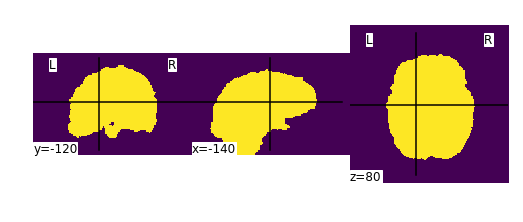

showing mask from given subset of dataset
112
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat290_0580/VSD.Brain.XX.O.MR_Flair.40967/VSD.Brain.XX.O.MR_Flair.40967.nii/mask.nii.gz
showing generated mask


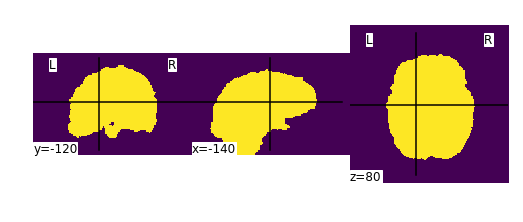

showing mask from given subset of dataset
113
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat290_0669/VSD.Brain.XX.O.MR_Flair.40947/VSD.Brain.XX.O.MR_Flair.40947.nii/mask.nii.gz
showing generated mask


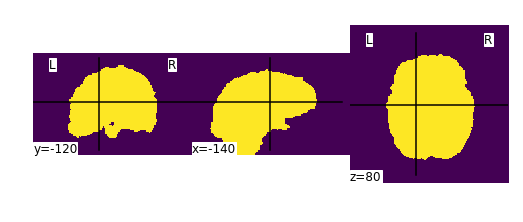

showing mask from given subset of dataset
114
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat296_0001/VSD.Brain.XX.O.MR_Flair.35944/VSD.Brain.XX.O.MR_Flair.35944.nii/mask.nii.gz
showing generated mask


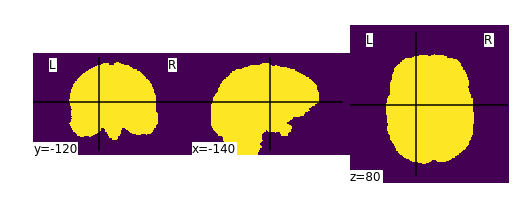

showing mask from given subset of dataset
115
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat300_0001/VSD.Brain.XX.O.MR_Flair.35956/VSD.Brain.XX.O.MR_Flair.35956.nii/mask.nii.gz
showing generated mask


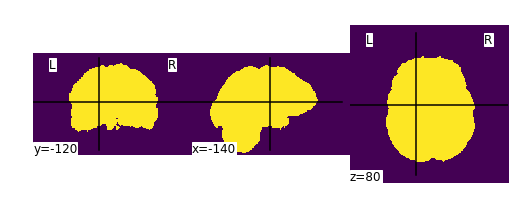

showing mask from given subset of dataset
116
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat309_0001/VSD.Brain.XX.O.MR_Flair.40979/VSD.Brain.XX.O.MR_Flair.40979.nii/mask.nii.gz
showing generated mask


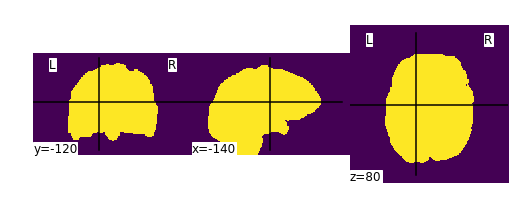

showing mask from given subset of dataset
117
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat309_0120/VSD.Brain.XX.O.MR_Flair.40995/VSD.Brain.XX.O.MR_Flair.40995.nii/mask.nii.gz
showing generated mask


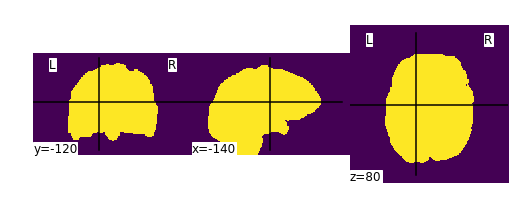

showing mask from given subset of dataset
118
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat309_0203/VSD.Brain.XX.O.MR_Flair.40975/VSD.Brain.XX.O.MR_Flair.40975.nii/mask.nii.gz
showing generated mask


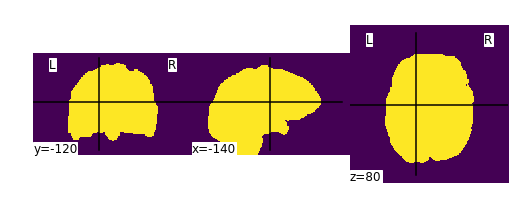

showing mask from given subset of dataset
119
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat309_0243/VSD.Brain.XX.O.MR_Flair.40991/VSD.Brain.XX.O.MR_Flair.40991.nii/mask.nii.gz
showing generated mask


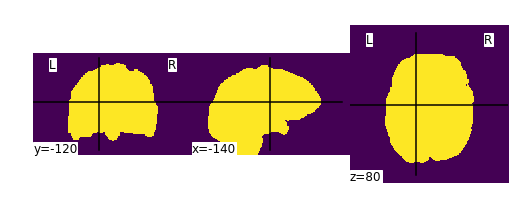

showing mask from given subset of dataset
120
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat309_0320/VSD.Brain.XX.O.MR_Flair.40987/VSD.Brain.XX.O.MR_Flair.40987.nii/mask.nii.gz
showing generated mask


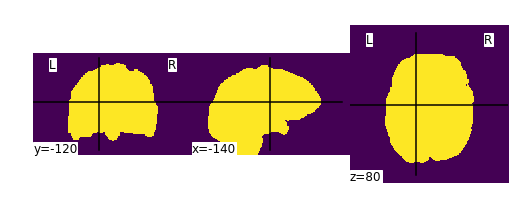

showing mask from given subset of dataset
121
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat309_0462/VSD.Brain.XX.O.MR_Flair.40983/VSD.Brain.XX.O.MR_Flair.40983.nii/mask.nii.gz
showing generated mask


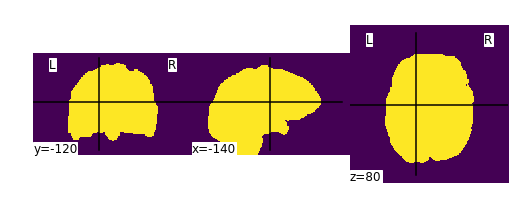

showing mask from given subset of dataset
122
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat314_0001/VSD.Brain.XX.O.MR_Flair.41018/VSD.Brain.XX.O.MR_Flair.41018.nii/mask.nii.gz
showing generated mask


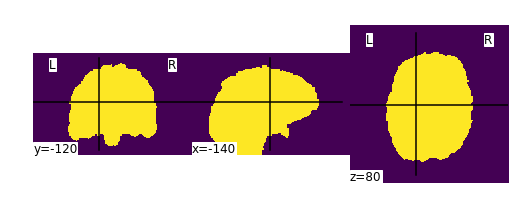

showing mask from given subset of dataset
123
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat314_0016/VSD.Brain.XX.O.MR_Flair.41234/VSD.Brain.XX.O.MR_Flair.41234.nii/mask.nii.gz
showing generated mask


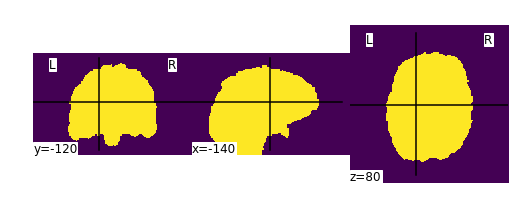

showing mask from given subset of dataset
124
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat314_0150/VSD.Brain.XX.O.MR_Flair.41036/VSD.Brain.XX.O.MR_Flair.41036.nii/mask.nii.gz
showing generated mask


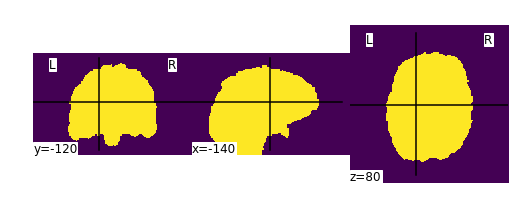

showing mask from given subset of dataset
125
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat314_0290/VSD.Brain.XX.O.MR_Flair.41006/VSD.Brain.XX.O.MR_Flair.41006.nii/mask.nii.gz
showing generated mask


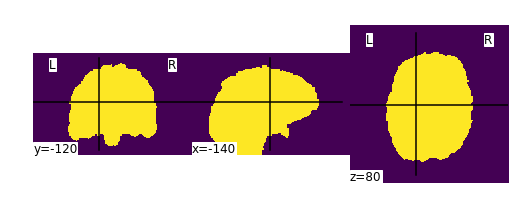

showing mask from given subset of dataset
126
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat319_0001/VSD.Brain.XX.O.MR_Flair.35993/VSD.Brain.XX.O.MR_Flair.35993.nii/mask.nii.gz
showing generated mask


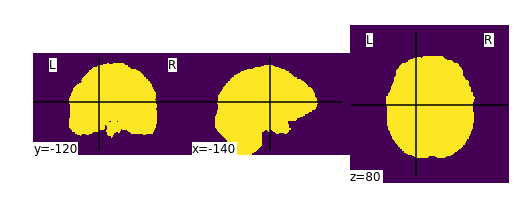

showing mask from given subset of dataset
127
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat321_0001/VSD.Brain.XX.O.MR_Flair.35997/VSD.Brain.XX.O.MR_Flair.35997.nii/mask.nii.gz
showing generated mask


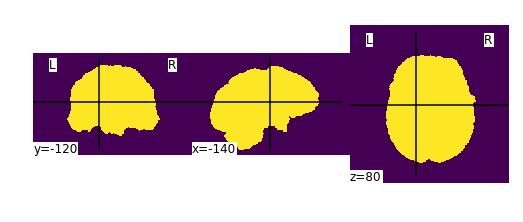

showing mask from given subset of dataset
128
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat322_0001/VSD.Brain.XX.O.MR_Flair.36001/VSD.Brain.XX.O.MR_Flair.36001.nii/mask.nii.gz
showing generated mask


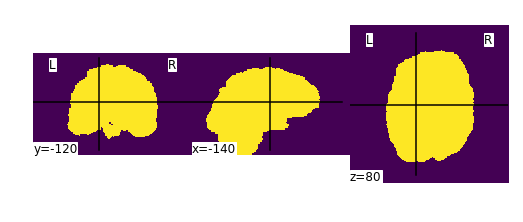

showing mask from given subset of dataset
129
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat328_0001/VSD.Brain.XX.O.MR_Flair.36009/VSD.Brain.XX.O.MR_Flair.36009.nii/mask.nii.gz
showing generated mask


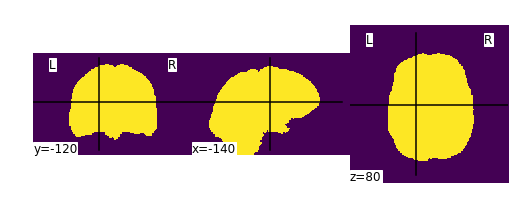

showing mask from given subset of dataset
130
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat331_0001/VSD.Brain.XX.O.MR_Flair.36013/VSD.Brain.XX.O.MR_Flair.36013.nii/mask.nii.gz
showing generated mask


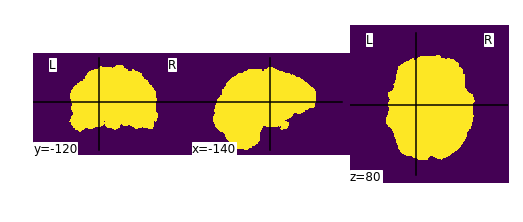

showing mask from given subset of dataset
131
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat332_0001/VSD.Brain.XX.O.MR_Flair.41030/VSD.Brain.XX.O.MR_Flair.41030.nii/mask.nii.gz
showing generated mask


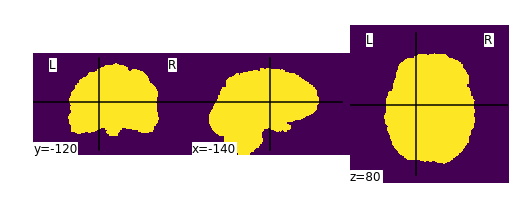

showing mask from given subset of dataset
132
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat335_0001/VSD.Brain.XX.O.MR_Flair.36017/VSD.Brain.XX.O.MR_Flair.36017.nii/mask.nii.gz
showing generated mask


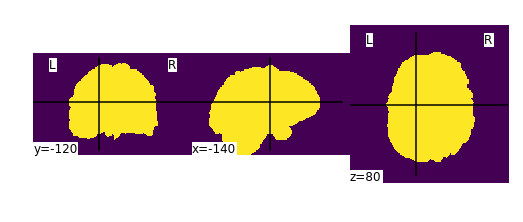

showing mask from given subset of dataset
133
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat338_0001/VSD.Brain.XX.O.MR_Flair.36025/VSD.Brain.XX.O.MR_Flair.36025.nii/mask.nii.gz
showing generated mask


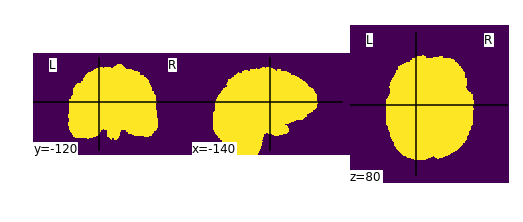

showing mask from given subset of dataset
134
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat343_0001/VSD.Brain.XX.O.MR_Flair.36033/VSD.Brain.XX.O.MR_Flair.36033.nii/mask.nii.gz
showing generated mask


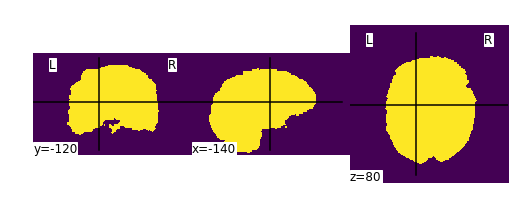

showing mask from given subset of dataset
135
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat361_0001/VSD.Brain.XX.O.MR_Flair.36049/VSD.Brain.XX.O.MR_Flair.36049.nii/mask.nii.gz
showing generated mask


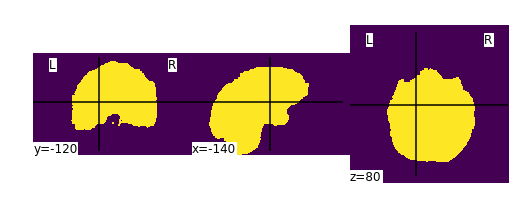

showing mask from given subset of dataset
136
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat368_0001/VSD.Brain.XX.O.MR_Flair.36060/VSD.Brain.XX.O.MR_Flair.36060.nii/mask.nii.gz
showing generated mask


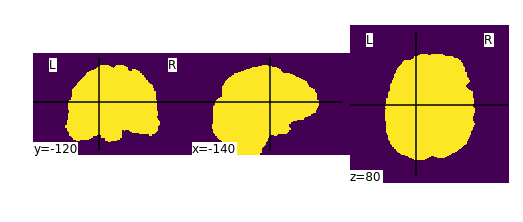

showing mask from given subset of dataset
137
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat370_0001/VSD.Brain.XX.O.MR_Flair.36080/VSD.Brain.XX.O.MR_Flair.36080.nii/mask.nii.gz
showing generated mask


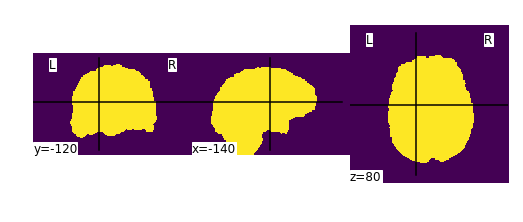

showing mask from given subset of dataset
138
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat370_0383/VSD.Brain.XX.O.MR_Flair.36084/VSD.Brain.XX.O.MR_Flair.36084.nii/mask.nii.gz
showing generated mask


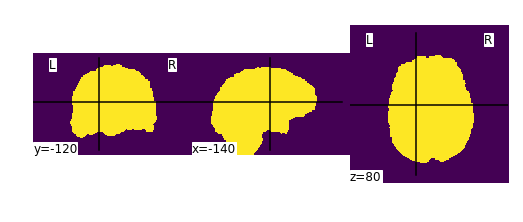

showing mask from given subset of dataset
139
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat370_0569/VSD.Brain.XX.O.MR_Flair.36072/VSD.Brain.XX.O.MR_Flair.36072.nii/mask.nii.gz
showing generated mask


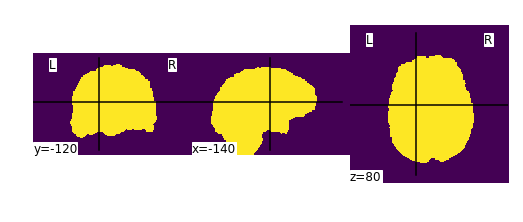

showing mask from given subset of dataset
140
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat370_0907/VSD.Brain.XX.O.MR_Flair.36076/VSD.Brain.XX.O.MR_Flair.36076.nii/mask.nii.gz
showing generated mask


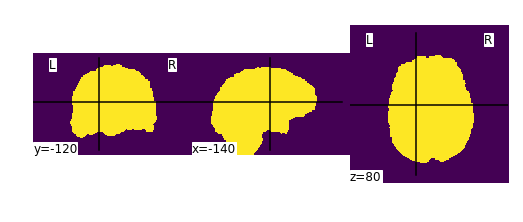

showing mask from given subset of dataset
141
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat370_1126/VSD.Brain.XX.O.MR_Flair.36092/VSD.Brain.XX.O.MR_Flair.36092.nii/mask.nii.gz
showing generated mask


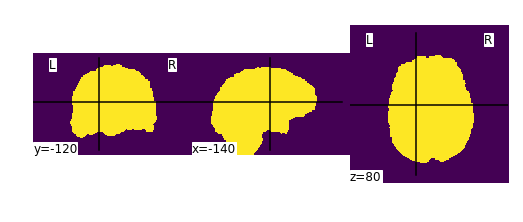

showing mask from given subset of dataset
142
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat370_1354/VSD.Brain.XX.O.MR_Flair.36068/VSD.Brain.XX.O.MR_Flair.36068.nii/mask.nii.gz
showing generated mask


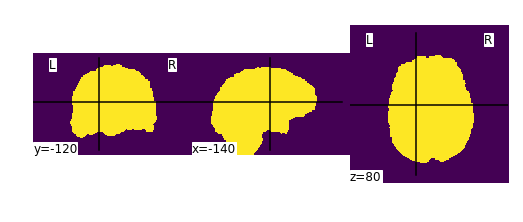

showing mask from given subset of dataset
143
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat370_1470/VSD.Brain.XX.O.MR_Flair.36088/VSD.Brain.XX.O.MR_Flair.36088.nii/mask.nii.gz
showing generated mask


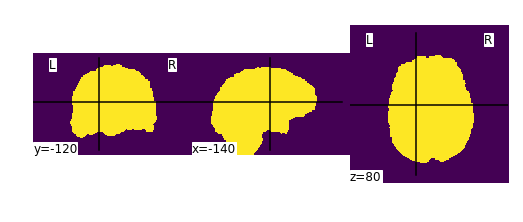

showing mask from given subset of dataset
144
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat372_0001/VSD.Brain.XX.O.MR_Flair.36096/VSD.Brain.XX.O.MR_Flair.36096.nii/mask.nii.gz
showing generated mask


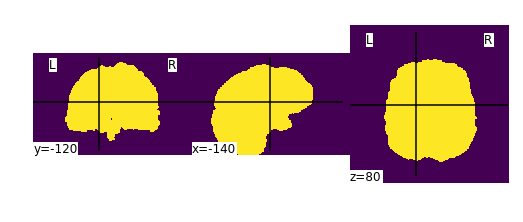

showing mask from given subset of dataset
145
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat374_0001/VSD.Brain.XX.O.MR_Flair.36138/VSD.Brain.XX.O.MR_Flair.36138.nii/mask.nii.gz
showing generated mask


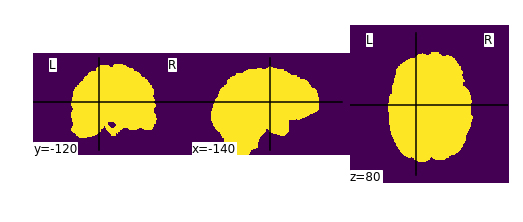

showing mask from given subset of dataset
146
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat374_0356/VSD.Brain.XX.O.MR_Flair.36100/VSD.Brain.XX.O.MR_Flair.36100.nii/mask.nii.gz
showing generated mask


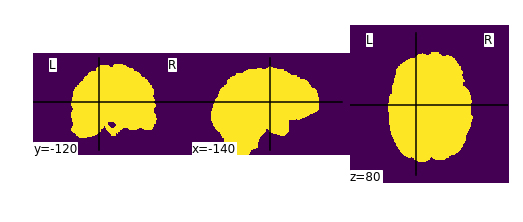

showing mask from given subset of dataset
147
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat374_0557/VSD.Brain.XX.O.MR_Flair.36112/VSD.Brain.XX.O.MR_Flair.36112.nii/mask.nii.gz
showing generated mask


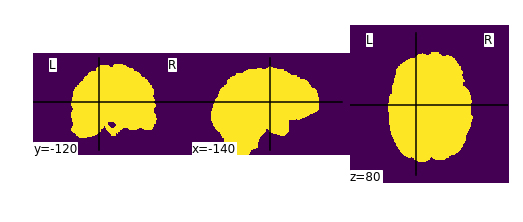

showing mask from given subset of dataset
148
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat374_0801/VSD.Brain.XX.O.MR_Flair.36122/VSD.Brain.XX.O.MR_Flair.36122.nii/mask.nii.gz
showing generated mask


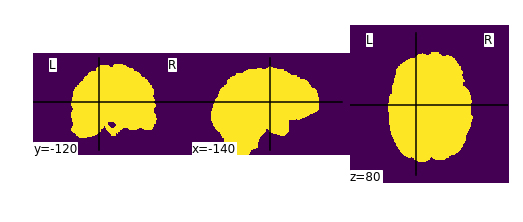

showing mask from given subset of dataset
149
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat374_0909/VSD.Brain.XX.O.MR_Flair.36134/VSD.Brain.XX.O.MR_Flair.36134.nii/mask.nii.gz
showing generated mask


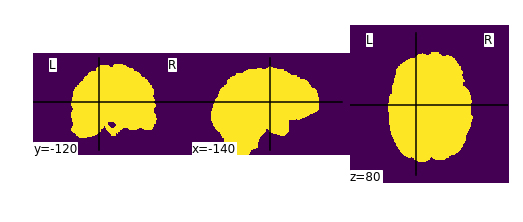

showing mask from given subset of dataset
150
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat374_1165/VSD.Brain.XX.O.MR_Flair.36104/VSD.Brain.XX.O.MR_Flair.36104.nii/mask.nii.gz
showing generated mask


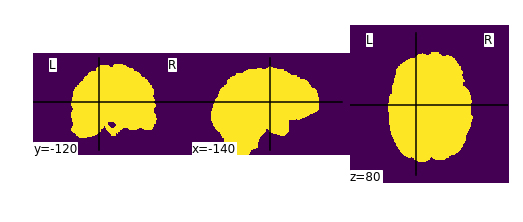

showing mask from given subset of dataset
151
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat374_1426/VSD.Brain.XX.O.MR_Flair.36130/VSD.Brain.XX.O.MR_Flair.36130.nii/mask.nii.gz
showing generated mask


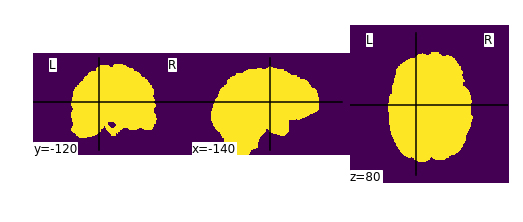

showing mask from given subset of dataset
152
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat374_1627/VSD.Brain.XX.O.MR_Flair.36118/VSD.Brain.XX.O.MR_Flair.36118.nii/mask.nii.gz
showing generated mask


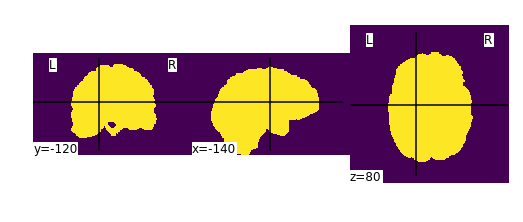

showing mask from given subset of dataset
153
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat375_0001/VSD.Brain.XX.O.MR_Flair.36142/VSD.Brain.XX.O.MR_Flair.36142.nii/mask.nii.gz
showing generated mask


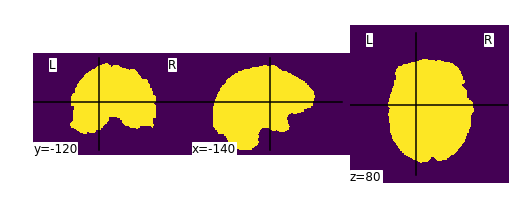

showing mask from given subset of dataset
154
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat377_0001/VSD.Brain.XX.O.MR_Flair.41056/VSD.Brain.XX.O.MR_Flair.41056.nii/mask.nii.gz
showing generated mask


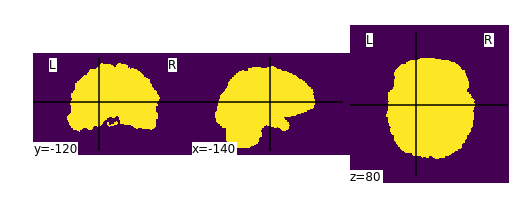

showing mask from given subset of dataset
155
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat377_0640/VSD.Brain.XX.O.MR_Flair.41052/VSD.Brain.XX.O.MR_Flair.41052.nii/mask.nii.gz
showing generated mask


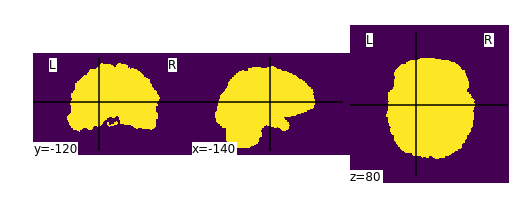

showing mask from given subset of dataset
156
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat378_0001/VSD.Brain.XX.O.MR_Flair.41060/VSD.Brain.XX.O.MR_Flair.41060.nii/mask.nii.gz
showing generated mask


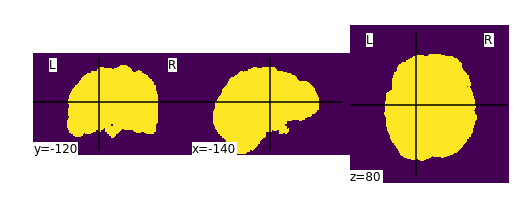

showing mask from given subset of dataset
157
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat390_0001/VSD.Brain.XX.O.MR_Flair.36150/VSD.Brain.XX.O.MR_Flair.36150.nii/mask.nii.gz
showing generated mask


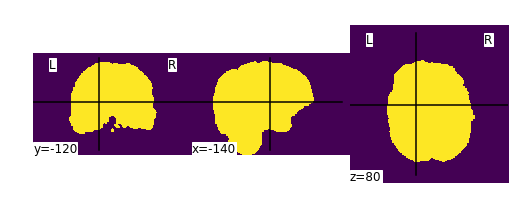

showing mask from given subset of dataset
158
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat391_0002/VSD.Brain.XX.O.MR_Flair.36154/VSD.Brain.XX.O.MR_Flair.36154.nii/mask.nii.gz
showing generated mask


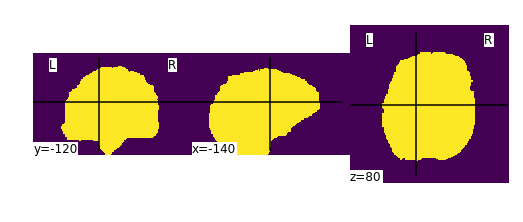

showing mask from given subset of dataset
159
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat392_0340/VSD.Brain.XX.O.MR_Flair.41080/VSD.Brain.XX.O.MR_Flair.41080.nii/mask.nii.gz
showing generated mask


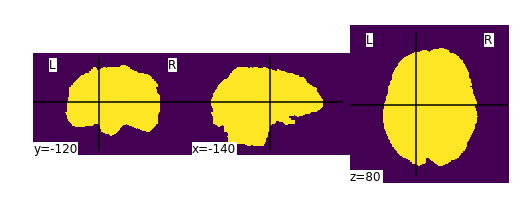

showing mask from given subset of dataset
160
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat394_0001/VSD.Brain.XX.O.MR_Flair.36161/VSD.Brain.XX.O.MR_Flair.36161.nii/mask.nii.gz
showing generated mask


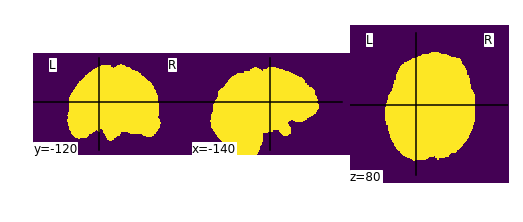

showing mask from given subset of dataset
161
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat396_0001/VSD.Brain.XX.O.MR_Flair.36173/VSD.Brain.XX.O.MR_Flair.36173.nii/mask.nii.gz
showing generated mask


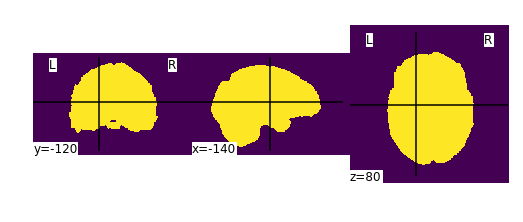

showing mask from given subset of dataset
162
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat396_0105/VSD.Brain.XX.O.MR_Flair.36177/VSD.Brain.XX.O.MR_Flair.36177.nii/mask.nii.gz
showing generated mask


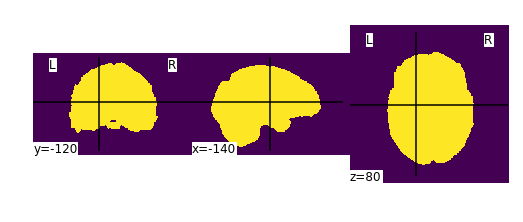

showing mask from given subset of dataset
163
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat396_0117/VSD.Brain.XX.O.MR_Flair.36193/VSD.Brain.XX.O.MR_Flair.36193.nii/mask.nii.gz
showing generated mask


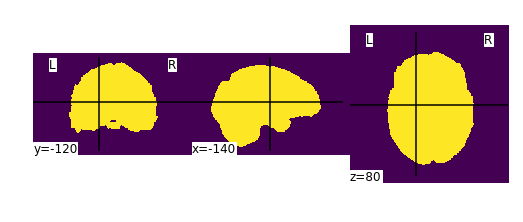

showing mask from given subset of dataset
164
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat396_0139/VSD.Brain.XX.O.MR_Flair.36185/VSD.Brain.XX.O.MR_Flair.36185.nii/mask.nii.gz
showing generated mask


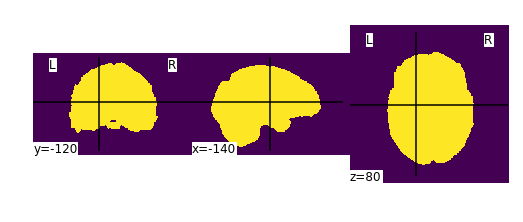

showing mask from given subset of dataset
165
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat396_0176/VSD.Brain.XX.O.MR_Flair.36189/VSD.Brain.XX.O.MR_Flair.36189.nii/mask.nii.gz
showing generated mask


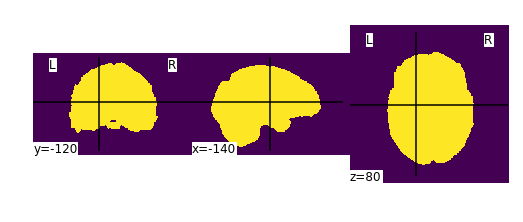

showing mask from given subset of dataset
166
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat396_0217/VSD.Brain.XX.O.MR_Flair.36181/VSD.Brain.XX.O.MR_Flair.36181.nii/mask.nii.gz
showing generated mask


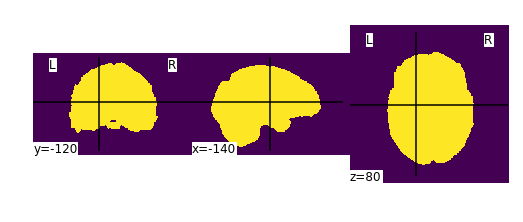

showing mask from given subset of dataset
167
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat396_0294/VSD.Brain.XX.O.MR_Flair.36165/VSD.Brain.XX.O.MR_Flair.36165.nii/mask.nii.gz
showing generated mask


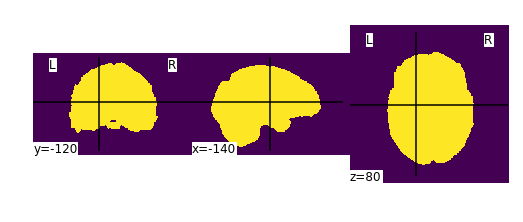

showing mask from given subset of dataset
168
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat399_0002/VSD.Brain.XX.O.MR_Flair.36229/VSD.Brain.XX.O.MR_Flair.36229.nii/mask.nii.gz
showing generated mask


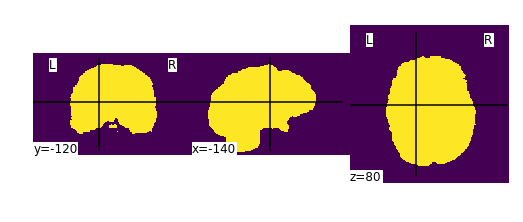

showing mask from given subset of dataset
169
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat399_0156/VSD.Brain.XX.O.MR_Flair.36233/VSD.Brain.XX.O.MR_Flair.36233.nii/mask.nii.gz
showing generated mask


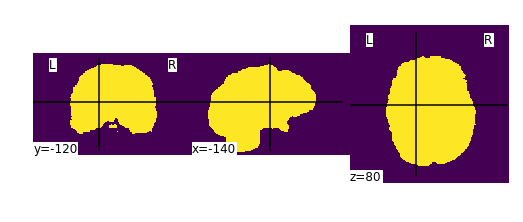

showing mask from given subset of dataset
170
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat399_0217/VSD.Brain.XX.O.MR_Flair.36225/VSD.Brain.XX.O.MR_Flair.36225.nii/mask.nii.gz
showing generated mask


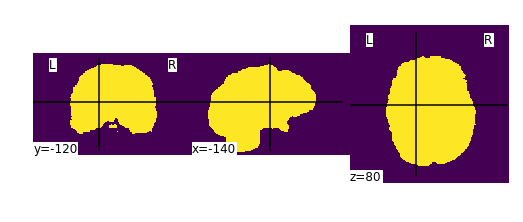

showing mask from given subset of dataset
171
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat399_0290/VSD.Brain.XX.O.MR_Flair.36209/VSD.Brain.XX.O.MR_Flair.36209.nii/mask.nii.gz
showing generated mask


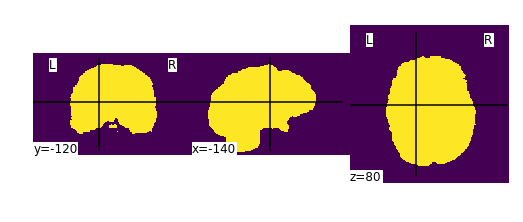

showing mask from given subset of dataset
172
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat399_0369/VSD.Brain.XX.O.MR_Flair.36197/VSD.Brain.XX.O.MR_Flair.36197.nii/mask.nii.gz
showing generated mask


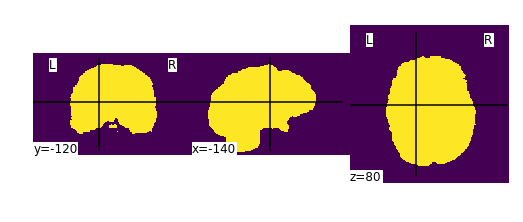

showing mask from given subset of dataset
173
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat399_0417/VSD.Brain.XX.O.MR_Flair.36205/VSD.Brain.XX.O.MR_Flair.36205.nii/mask.nii.gz
showing generated mask


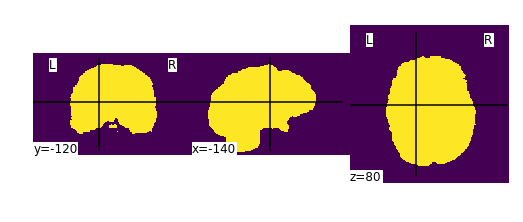

showing mask from given subset of dataset
174
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat399_0479/VSD.Brain.XX.O.MR_Flair.36201/VSD.Brain.XX.O.MR_Flair.36201.nii/mask.nii.gz
showing generated mask


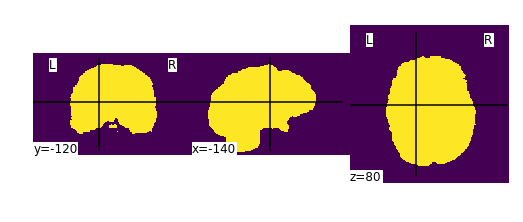

showing mask from given subset of dataset
175
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat399_0527/VSD.Brain.XX.O.MR_Flair.36221/VSD.Brain.XX.O.MR_Flair.36221.nii/mask.nii.gz
showing generated mask


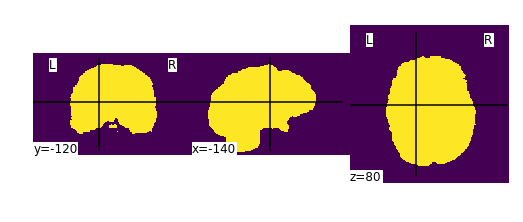

showing mask from given subset of dataset
176
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat399_0595/VSD.Brain.XX.O.MR_Flair.36217/VSD.Brain.XX.O.MR_Flair.36217.nii/mask.nii.gz
showing generated mask


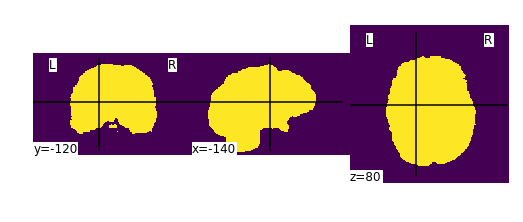

showing mask from given subset of dataset
177
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat399_0815/VSD.Brain.XX.O.MR_Flair.36213/VSD.Brain.XX.O.MR_Flair.36213.nii/mask.nii.gz
showing generated mask


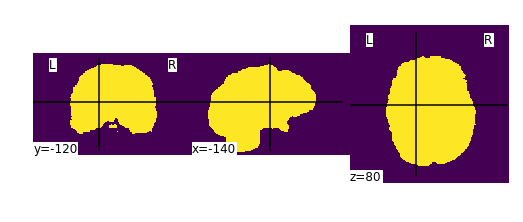

showing mask from given subset of dataset
178
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat401_0001/VSD.Brain.XX.O.MR_Flair.36241/VSD.Brain.XX.O.MR_Flair.36241.nii/mask.nii.gz
showing generated mask


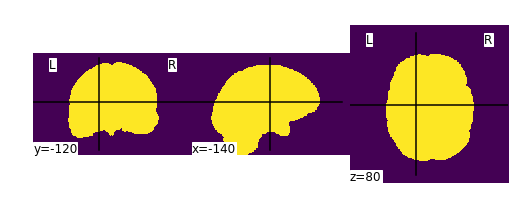

showing mask from given subset of dataset
179
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat404_0001/VSD.Brain.XX.O.MR_Flair.36252/VSD.Brain.XX.O.MR_Flair.36252.nii/mask.nii.gz
showing generated mask


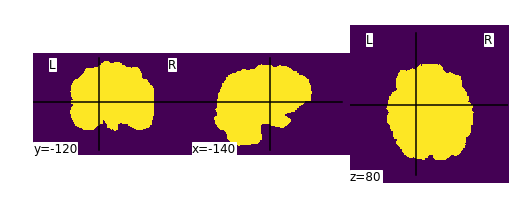

showing mask from given subset of dataset
180
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat406_0001/VSD.Brain.XX.O.MR_Flair.36260/VSD.Brain.XX.O.MR_Flair.36260.nii/mask.nii.gz
showing generated mask


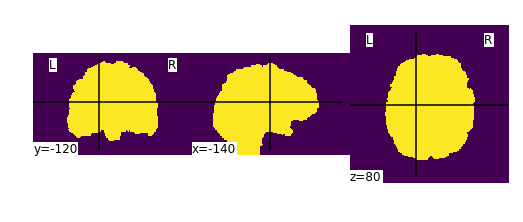

showing mask from given subset of dataset
181
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat409_0001/VSD.Brain.XX.O.MR_Flair.41096/VSD.Brain.XX.O.MR_Flair.41096.nii/mask.nii.gz
showing generated mask


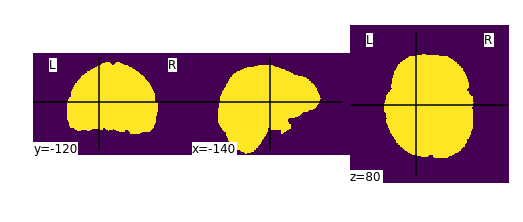

showing mask from given subset of dataset
182
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat411_0001/VSD.Brain.XX.O.MR_Flair.36268/VSD.Brain.XX.O.MR_Flair.36268.nii/mask.nii.gz
showing generated mask


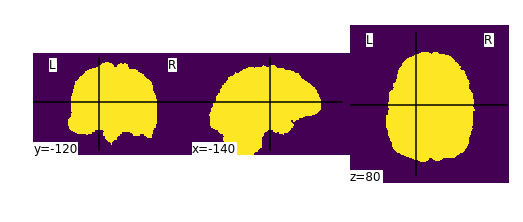

showing mask from given subset of dataset
183
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat412_0001/VSD.Brain.XX.O.MR_Flair.36272/VSD.Brain.XX.O.MR_Flair.36272.nii/mask.nii.gz
showing generated mask


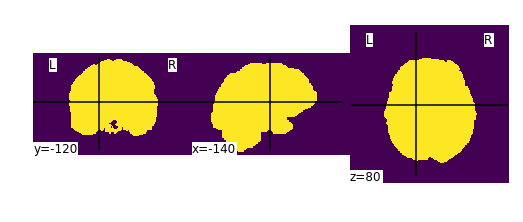

showing mask from given subset of dataset
184
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat417_0001/VSD.Brain.XX.O.MR_Flair.36284/VSD.Brain.XX.O.MR_Flair.36284.nii/mask.nii.gz
showing generated mask


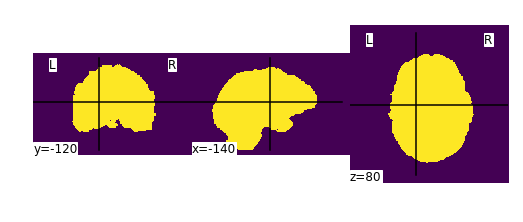

showing mask from given subset of dataset
185
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat417_0019/VSD.Brain.XX.O.MR_Flair.36280/VSD.Brain.XX.O.MR_Flair.36280.nii/mask.nii.gz
showing generated mask


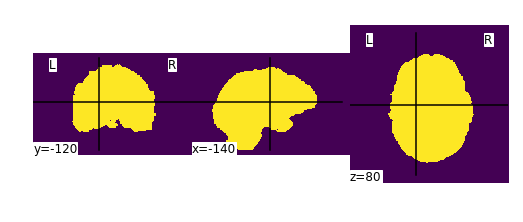

showing mask from given subset of dataset
186
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat419_0001/VSD.Brain.XX.O.MR_Flair.36288/VSD.Brain.XX.O.MR_Flair.36288.nii/mask.nii.gz
showing generated mask


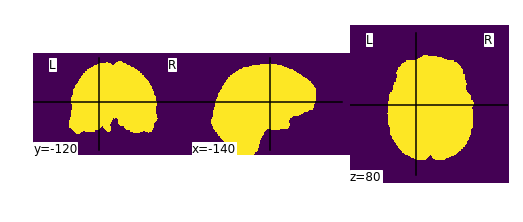

showing mask from given subset of dataset
187
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat424_0001/VSD.Brain.XX.O.MR_Flair.36292/VSD.Brain.XX.O.MR_Flair.36292.nii/mask.nii.gz
showing generated mask


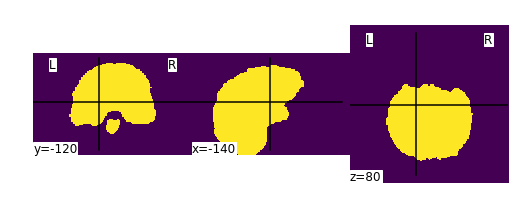

showing mask from given subset of dataset
188
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat425_0001/VSD.Brain.XX.O.MR_Flair.36299/VSD.Brain.XX.O.MR_Flair.36299.nii/mask.nii.gz
showing generated mask


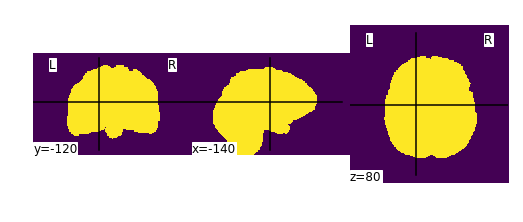

showing mask from given subset of dataset
189
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat429_0001/VSD.Brain.XX.O.MR_Flair.36311/VSD.Brain.XX.O.MR_Flair.36311.nii/mask.nii.gz
showing generated mask


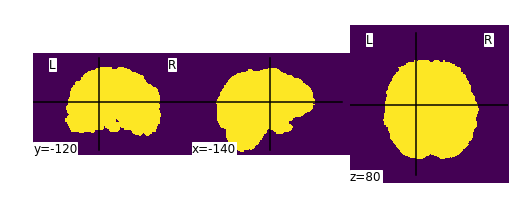

showing mask from given subset of dataset
190
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat430_0001/VSD.Brain.XX.O.MR_Flair.36315/VSD.Brain.XX.O.MR_Flair.36315.nii/mask.nii.gz
showing generated mask


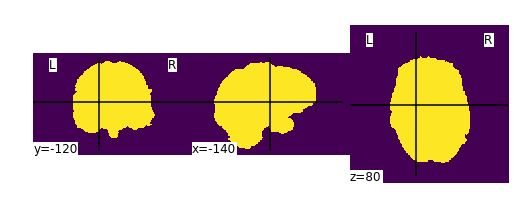

showing mask from given subset of dataset
191
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat432_0001/VSD.Brain.XX.O.MR_Flair.36319/VSD.Brain.XX.O.MR_Flair.36319.nii/mask.nii.gz
showing generated mask


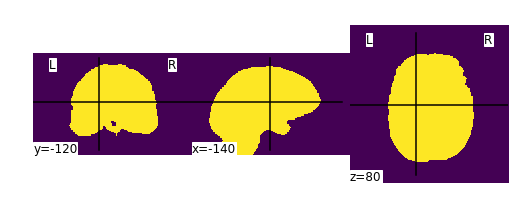

showing mask from given subset of dataset
192
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat436_0001/VSD.Brain.XX.O.MR_Flair.36401/VSD.Brain.XX.O.MR_Flair.36401.nii/mask.nii.gz
showing generated mask


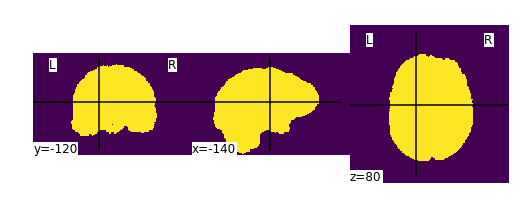

showing mask from given subset of dataset
193
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat437_0001/VSD.Brain.XX.O.MR_Flair.36502/VSD.Brain.XX.O.MR_Flair.36502.nii/mask.nii.gz
showing generated mask


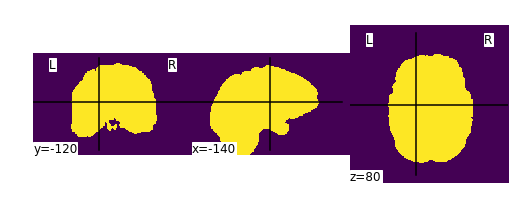

showing mask from given subset of dataset
194
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat439_0001/VSD.Brain.XX.O.MR_Flair.41111/VSD.Brain.XX.O.MR_Flair.41111.nii/mask.nii.gz
showing generated mask


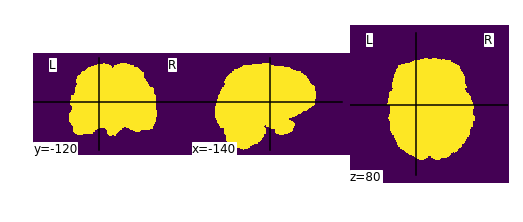

showing mask from given subset of dataset
195
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat439_0263/VSD.Brain.XX.O.MR_Flair.41115/VSD.Brain.XX.O.MR_Flair.41115.nii/mask.nii.gz
showing generated mask


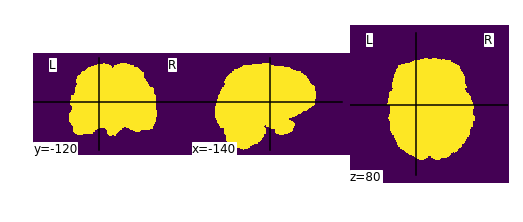

showing mask from given subset of dataset
196
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat439_0333/VSD.Brain.XX.O.MR_Flair.41123/VSD.Brain.XX.O.MR_Flair.41123.nii/mask.nii.gz
showing generated mask


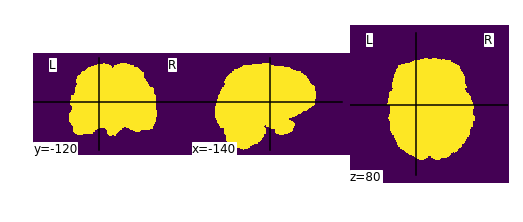

showing mask from given subset of dataset
197
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat439_0360/VSD.Brain.XX.O.MR_Flair.41119/VSD.Brain.XX.O.MR_Flair.41119.nii/mask.nii.gz
showing generated mask


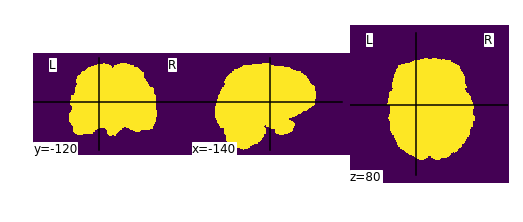

showing mask from given subset of dataset
198
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat444_0001/VSD.Brain.XX.O.MR_Flair.36510/VSD.Brain.XX.O.MR_Flair.36510.nii/mask.nii.gz
showing generated mask


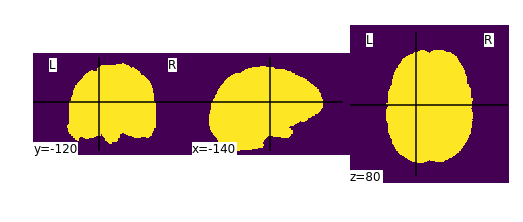

showing mask from given subset of dataset
199
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat444_0033/VSD.Brain.XX.O.MR_Flair.36530/VSD.Brain.XX.O.MR_Flair.36530.nii/mask.nii.gz
showing generated mask


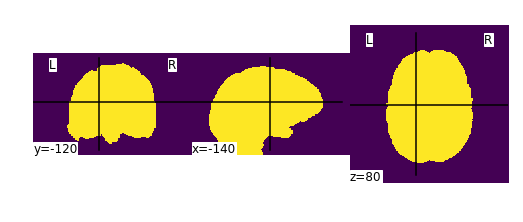

showing mask from given subset of dataset
200
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat444_0038/VSD.Brain.XX.O.MR_Flair.36526/VSD.Brain.XX.O.MR_Flair.36526.nii/mask.nii.gz
showing generated mask


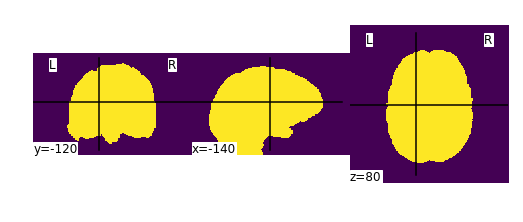

showing mask from given subset of dataset
201
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat444_0077/VSD.Brain.XX.O.MR_Flair.36518/VSD.Brain.XX.O.MR_Flair.36518.nii/mask.nii.gz
showing generated mask


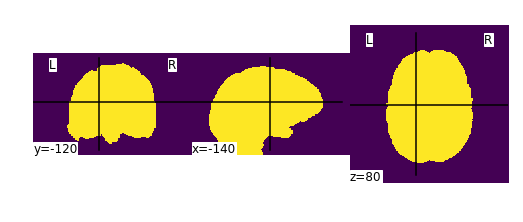

showing mask from given subset of dataset
202
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat444_0104/VSD.Brain.XX.O.MR_Flair.36522/VSD.Brain.XX.O.MR_Flair.36522.nii/mask.nii.gz
showing generated mask


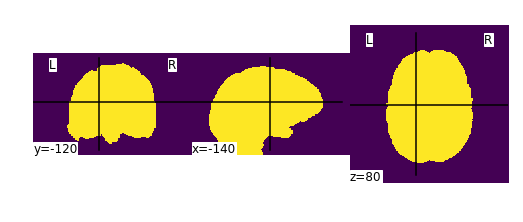

showing mask from given subset of dataset
203
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat447_0122/VSD.Brain.XX.O.MR_Flair.41131/VSD.Brain.XX.O.MR_Flair.41131.nii/mask.nii.gz
showing generated mask


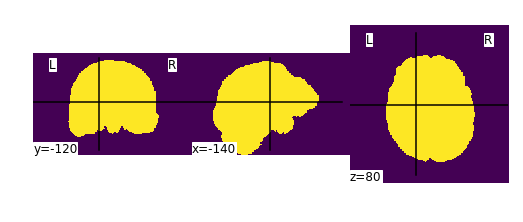

showing mask from given subset of dataset
204
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat447_0199/VSD.Brain.XX.O.MR_Flair.41135/VSD.Brain.XX.O.MR_Flair.41135.nii/mask.nii.gz
showing generated mask


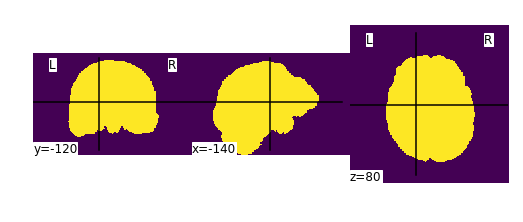

showing mask from given subset of dataset
205
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat447_0313/VSD.Brain.XX.O.MR_Flair.41127/VSD.Brain.XX.O.MR_Flair.41127.nii/mask.nii.gz
showing generated mask


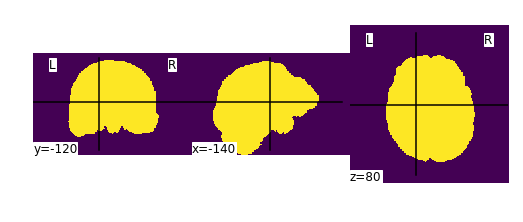

showing mask from given subset of dataset
206
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat448_0001/VSD.Brain.XX.O.MR_Flair.36536/VSD.Brain.XX.O.MR_Flair.36536.nii/mask.nii.gz
showing generated mask


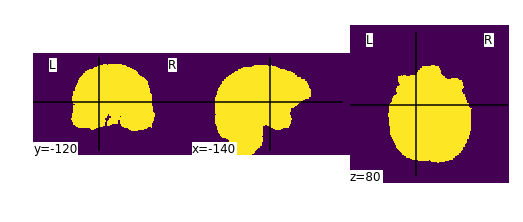

showing mask from given subset of dataset
207
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat455_0001/VSD.Brain.XX.O.MR_Flair.36544/VSD.Brain.XX.O.MR_Flair.36544.nii/mask.nii.gz
showing generated mask


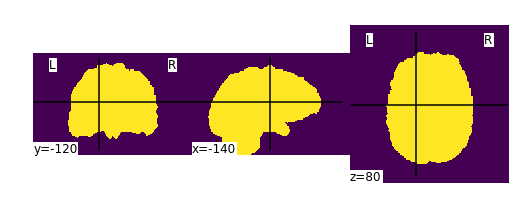

showing mask from given subset of dataset
208
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat460_0001/VSD.Brain.XX.O.MR_Flair.36551/VSD.Brain.XX.O.MR_Flair.36551.nii/mask.nii.gz
showing generated mask


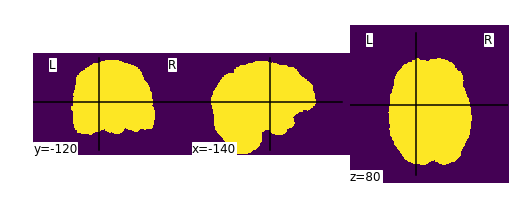

showing mask from given subset of dataset
209
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat463_0001/VSD.Brain.XX.O.MR_Flair.36555/VSD.Brain.XX.O.MR_Flair.36555.nii/mask.nii.gz
showing generated mask


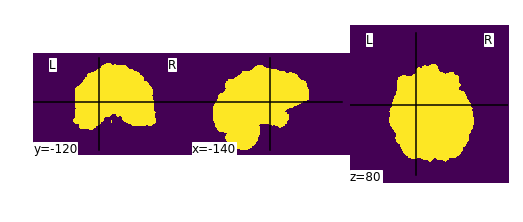

showing mask from given subset of dataset
210
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat468_0001/VSD.Brain.XX.O.MR_Flair.36563/VSD.Brain.XX.O.MR_Flair.36563.nii/mask.nii.gz
showing generated mask


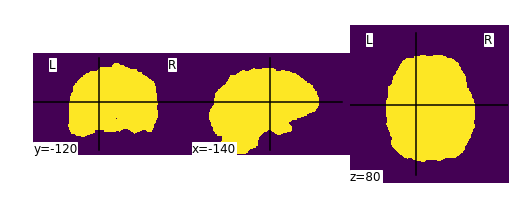

showing mask from given subset of dataset
211
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat469_0001/VSD.Brain.XX.O.MR_Flair.36567/VSD.Brain.XX.O.MR_Flair.36567.nii/mask.nii.gz
showing generated mask


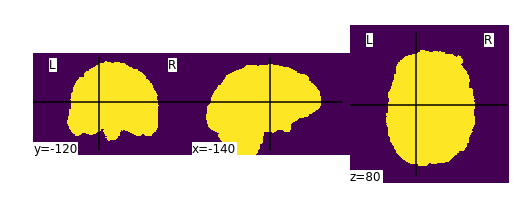

showing mask from given subset of dataset
212
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat471_0001/VSD.Brain.XX.O.MR_Flair.36571/VSD.Brain.XX.O.MR_Flair.36571.nii/mask.nii.gz
showing generated mask


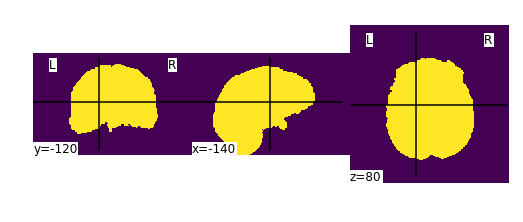

showing mask from given subset of dataset
213
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat473_0001/VSD.Brain.XX.O.MR_Flair.36575/VSD.Brain.XX.O.MR_Flair.36575.nii/mask.nii.gz
showing generated mask


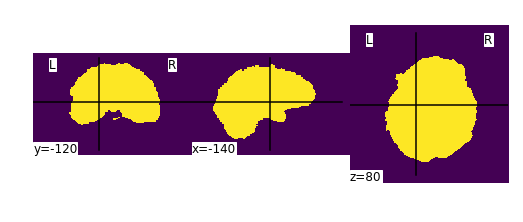

showing mask from given subset of dataset
214
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat474_0001/VSD.Brain.XX.O.MR_Flair.36579/VSD.Brain.XX.O.MR_Flair.36579.nii/mask.nii.gz
showing generated mask


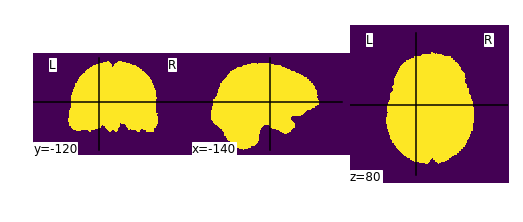

showing mask from given subset of dataset
215
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat478_0001/VSD.Brain.XX.O.MR_Flair.36587/VSD.Brain.XX.O.MR_Flair.36587.nii/mask.nii.gz
showing generated mask


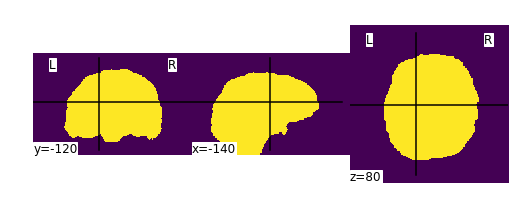

showing mask from given subset of dataset
216
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat479_0001/VSD.Brain.XX.O.MR_Flair.36591/VSD.Brain.XX.O.MR_Flair.36591.nii/mask.nii.gz
showing generated mask


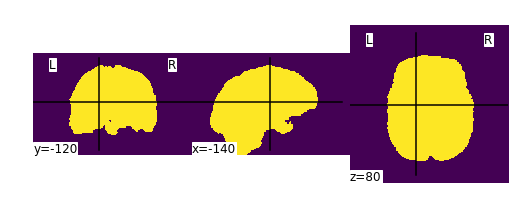

showing mask from given subset of dataset
217
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat491_0001/VSD.Brain.XX.O.MR_Flair.36603/VSD.Brain.XX.O.MR_Flair.36603.nii/mask.nii.gz
showing generated mask


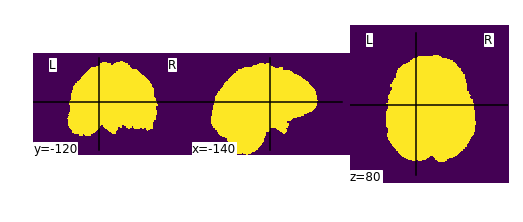

showing mask from given subset of dataset
218
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat498_0001/VSD.Brain.XX.O.MR_Flair.36616/VSD.Brain.XX.O.MR_Flair.36616.nii/mask.nii.gz
showing generated mask


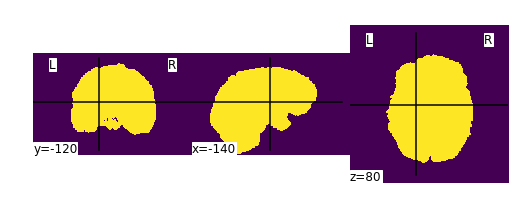

showing mask from given subset of dataset
219
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat499_0001/VSD.Brain.XX.O.MR_Flair.36620/VSD.Brain.XX.O.MR_Flair.36620.nii/mask.nii.gz
showing generated mask


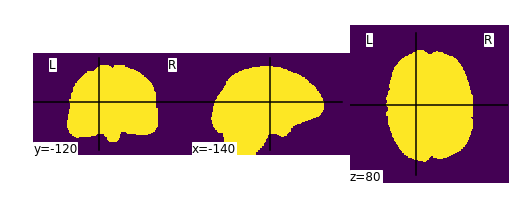

showing mask from given subset of dataset
220
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_2013_pat0001_1/VSD.Brain.XX.O.MR_Flair.54632/VSD.Brain.XX.O.MR_Flair.54632.nii/mask.nii.gz
showing generated mask


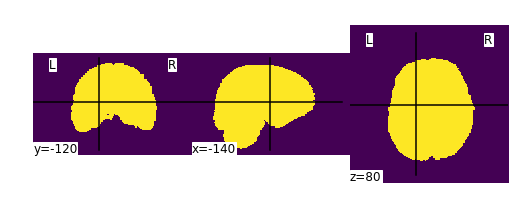

showing mask from given subset of dataset
221
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_2013_pat0002_1/VSD.Brain.XX.O.MR_Flair.54638/VSD.Brain.XX.O.MR_Flair.54638.nii/mask.nii.gz
showing generated mask


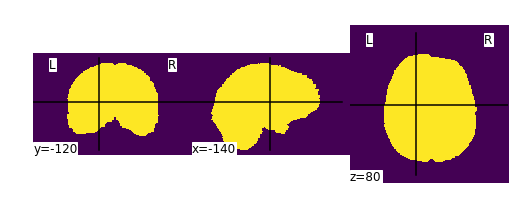

showing mask from given subset of dataset
222
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_2013_pat0004_1/VSD.Brain.XX.O.MR_Flair.54644/VSD.Brain.XX.O.MR_Flair.54644.nii/mask.nii.gz
showing generated mask


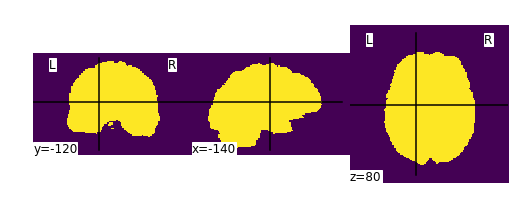

showing mask from given subset of dataset
223
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_2013_pat0006_1/VSD.Brain.XX.O.MR_Flair.54650/VSD.Brain.XX.O.MR_Flair.54650.nii/mask.nii.gz
showing generated mask


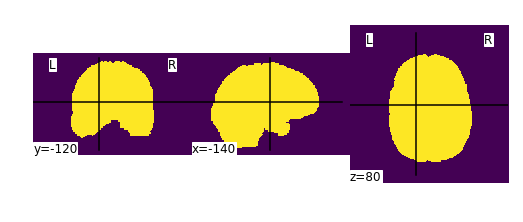

showing mask from given subset of dataset
224
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_2013_pat0008_1/VSD.Brain.XX.O.MR_Flair.54656/VSD.Brain.XX.O.MR_Flair.54656.nii/mask.nii.gz
showing generated mask


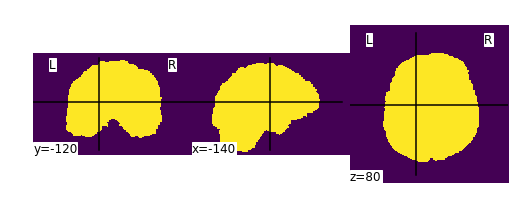

showing mask from given subset of dataset
225
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_2013_pat0011_1/VSD.Brain.XX.O.MR_Flair.54662/VSD.Brain.XX.O.MR_Flair.54662.nii/mask.nii.gz
showing generated mask


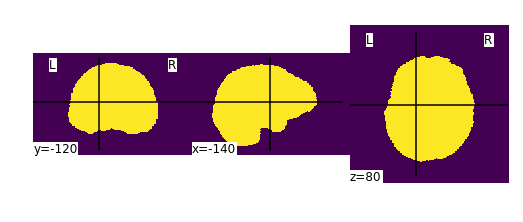

showing mask from given subset of dataset
226
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_2013_pat0012_1/VSD.Brain.XX.O.MR_Flair.54668/VSD.Brain.XX.O.MR_Flair.54668.nii/mask.nii.gz
showing generated mask


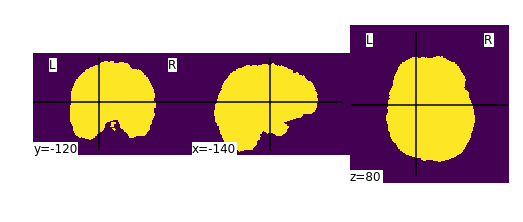

showing mask from given subset of dataset
227
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_2013_pat0013_1/VSD.Brain.XX.O.MR_Flair.54674/VSD.Brain.XX.O.MR_Flair.54674.nii/mask.nii.gz
showing generated mask


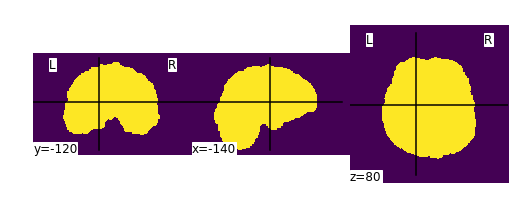

showing mask from given subset of dataset
228
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_2013_pat0014_1/VSD.Brain.XX.O.MR_Flair.54680/VSD.Brain.XX.O.MR_Flair.54680.nii/mask.nii.gz
showing generated mask


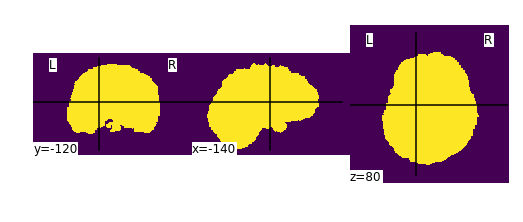

showing mask from given subset of dataset
229
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_2013_pat0015_1/VSD.Brain.XX.O.MR_Flair.54686/VSD.Brain.XX.O.MR_Flair.54686.nii/mask.nii.gz
showing generated mask


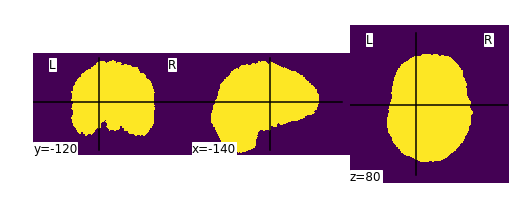

showing mask from given subset of dataset
230
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat101_0001/VSD.Brain.XX.O.MR_Flair.35529/VSD.Brain.XX.O.MR_Flair.35529.nii/mask.nii.gz
showing generated mask


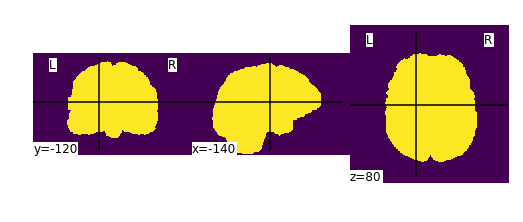

showing mask from given subset of dataset
231
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat103_0001/VSD.Brain.XX.O.MR_Flair.40819/VSD.Brain.XX.O.MR_Flair.40819.nii/mask.nii.gz
showing generated mask


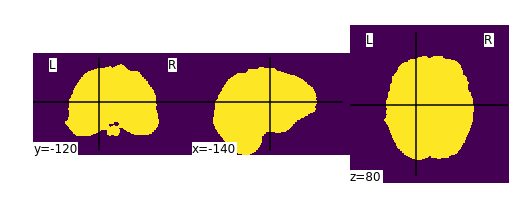

showing mask from given subset of dataset
232
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat109_0001/VSD.Brain.XX.O.MR_Flair.40823/VSD.Brain.XX.O.MR_Flair.40823.nii/mask.nii.gz
showing generated mask


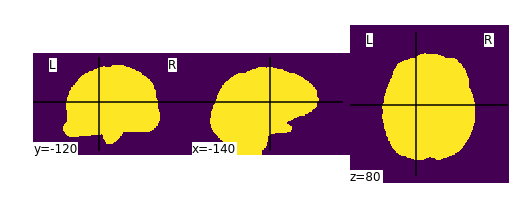

showing mask from given subset of dataset
233
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat130_0001/VSD.Brain.XX.O.MR_Flair.40831/VSD.Brain.XX.O.MR_Flair.40831.nii/mask.nii.gz
showing generated mask


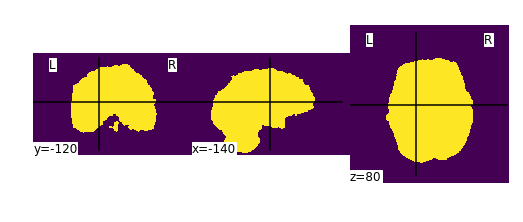

showing mask from given subset of dataset
234
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat141_0001/VSD.Brain.XX.O.MR_Flair.35587/VSD.Brain.XX.O.MR_Flair.35587.nii/mask.nii.gz
showing generated mask


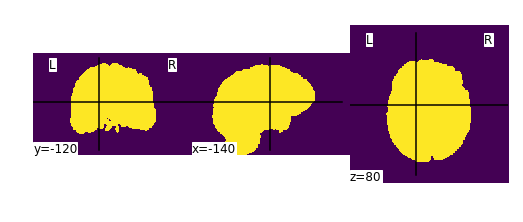

showing mask from given subset of dataset
235
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat152_0001/VSD.Brain.XX.O.MR_Flair.40835/VSD.Brain.XX.O.MR_Flair.40835.nii/mask.nii.gz
showing generated mask


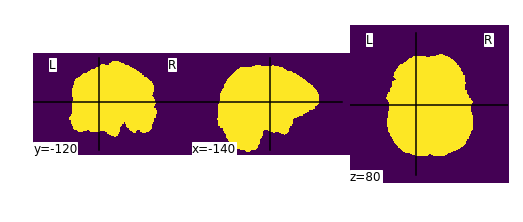

showing mask from given subset of dataset
236
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat175_0001/VSD.Brain.XX.O.MR_Flair.40875/VSD.Brain.XX.O.MR_Flair.40875.nii/mask.nii.gz
showing generated mask


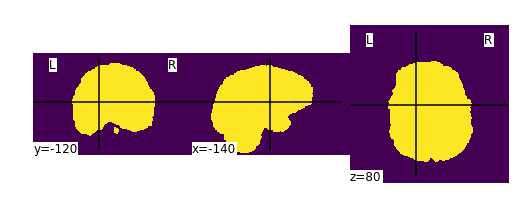

showing mask from given subset of dataset
237
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat177_0001/VSD.Brain.XX.O.MR_Flair.35670/VSD.Brain.XX.O.MR_Flair.35670.nii/mask.nii.gz
showing generated mask


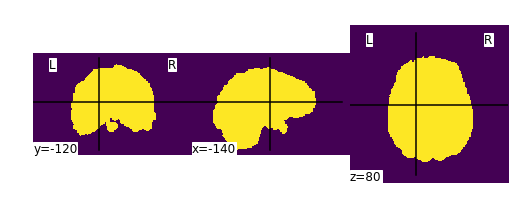

showing mask from given subset of dataset
238
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat202_0001/VSD.Brain.XX.O.MR_Flair.35718/VSD.Brain.XX.O.MR_Flair.35718.nii/mask.nii.gz
showing generated mask


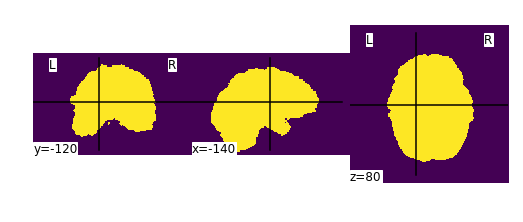

showing mask from given subset of dataset
239
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat241_0001/VSD.Brain.XX.O.MR_Flair.40931/VSD.Brain.XX.O.MR_Flair.40931.nii/mask.nii.gz
showing generated mask


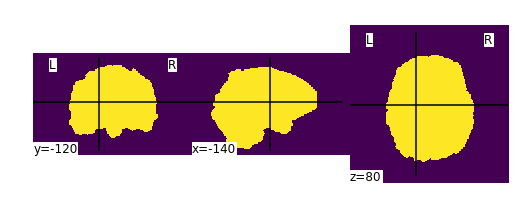

showing mask from given subset of dataset
240
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat249_0001/VSD.Brain.XX.O.MR_Flair.35828/VSD.Brain.XX.O.MR_Flair.35828.nii/mask.nii.gz
showing generated mask


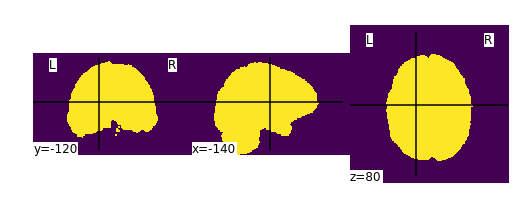

showing mask from given subset of dataset
241
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat254_0001/VSD.Brain.XX.O.MR_Flair.35840/VSD.Brain.XX.O.MR_Flair.35840.nii/mask.nii.gz
showing generated mask


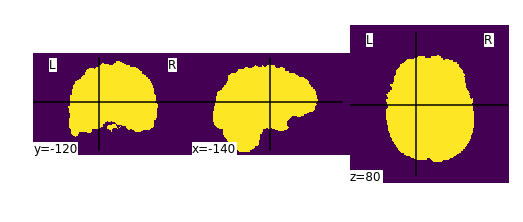

showing mask from given subset of dataset
242
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat255_0001/VSD.Brain.XX.O.MR_Flair.35844/VSD.Brain.XX.O.MR_Flair.35844.nii/mask.nii.gz
showing generated mask


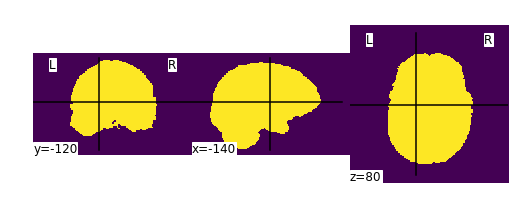

showing mask from given subset of dataset
243
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat261_0001/VSD.Brain.XX.O.MR_Flair.40939/VSD.Brain.XX.O.MR_Flair.40939.nii/mask.nii.gz
showing generated mask


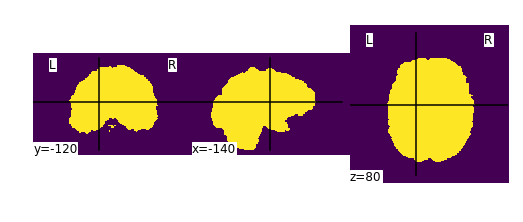

showing mask from given subset of dataset
244
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat266_0001/VSD.Brain.XX.O.MR_Flair.35888/VSD.Brain.XX.O.MR_Flair.35888.nii/mask.nii.gz
showing generated mask


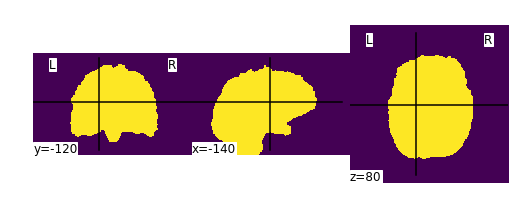

showing mask from given subset of dataset
245
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat276_0001/VSD.Brain.XX.O.MR_Flair.35902/VSD.Brain.XX.O.MR_Flair.35902.nii/mask.nii.gz
showing generated mask


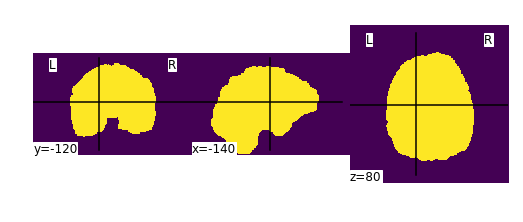

showing mask from given subset of dataset
246
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat282_0001/VSD.Brain.XX.O.MR_Flair.40943/VSD.Brain.XX.O.MR_Flair.40943.nii/mask.nii.gz
showing generated mask


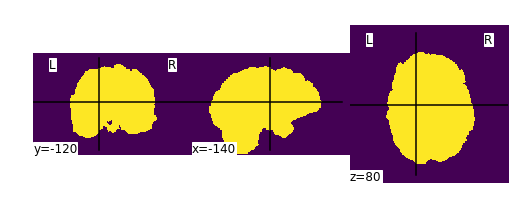

showing mask from given subset of dataset
247
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat298_0001/VSD.Brain.XX.O.MR_Flair.35948/VSD.Brain.XX.O.MR_Flair.35948.nii/mask.nii.gz
showing generated mask


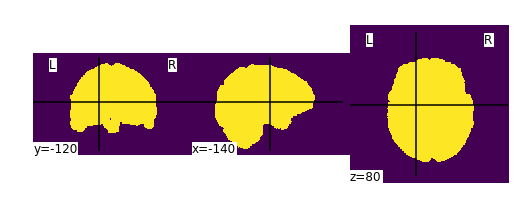

showing mask from given subset of dataset
248
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat299_0001/VSD.Brain.XX.O.MR_Flair.35952/VSD.Brain.XX.O.MR_Flair.35952.nii/mask.nii.gz
showing generated mask


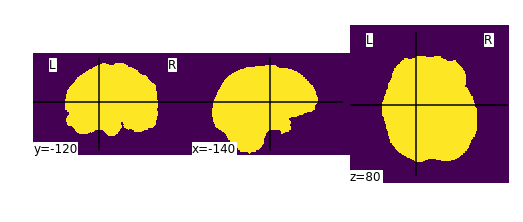

showing mask from given subset of dataset
249
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat307_0001/VSD.Brain.XX.O.MR_Flair.40971/VSD.Brain.XX.O.MR_Flair.40971.nii/mask.nii.gz
showing generated mask


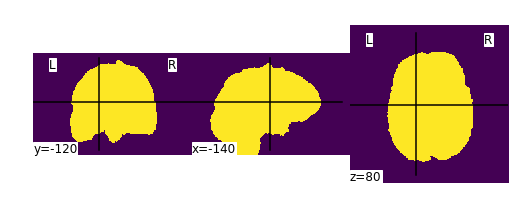

showing mask from given subset of dataset
250
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat312_0001/VSD.Brain.XX.O.MR_Flair.35981/VSD.Brain.XX.O.MR_Flair.35981.nii/mask.nii.gz
showing generated mask


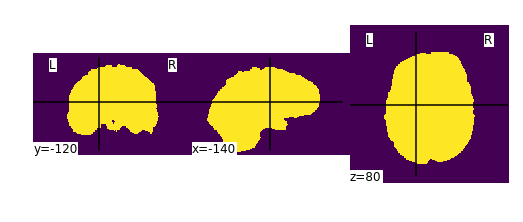

showing mask from given subset of dataset
251
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat325_0001/VSD.Brain.XX.O.MR_Flair.36005/VSD.Brain.XX.O.MR_Flair.36005.nii/mask.nii.gz
showing generated mask


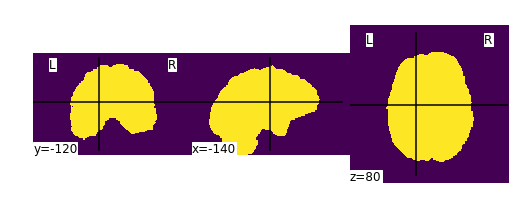

showing mask from given subset of dataset
252
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat330_0001/VSD.Brain.XX.O.MR_Flair.41026/VSD.Brain.XX.O.MR_Flair.41026.nii/mask.nii.gz
showing generated mask


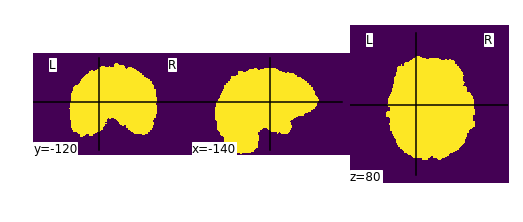

showing mask from given subset of dataset
253
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat346_0001/VSD.Brain.XX.O.MR_Flair.41040/VSD.Brain.XX.O.MR_Flair.41040.nii/mask.nii.gz
showing generated mask


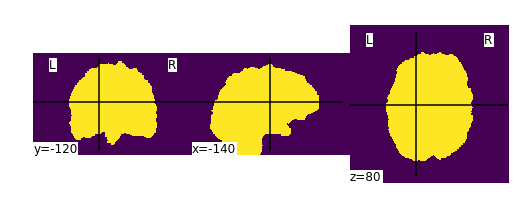

showing mask from given subset of dataset
254
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat351_0001/VSD.Brain.XX.O.MR_Flair.36045/VSD.Brain.XX.O.MR_Flair.36045.nii/mask.nii.gz
showing generated mask


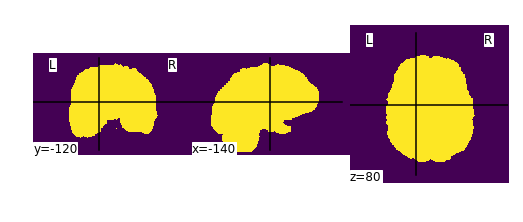

showing mask from given subset of dataset
255
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat354_0001/VSD.Brain.XX.O.MR_Flair.41044/VSD.Brain.XX.O.MR_Flair.41044.nii/mask.nii.gz
showing generated mask


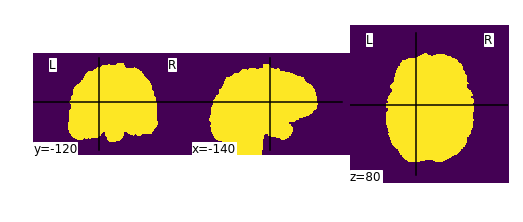

showing mask from given subset of dataset
256
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat387_0001/VSD.Brain.XX.O.MR_Flair.41064/VSD.Brain.XX.O.MR_Flair.41064.nii/mask.nii.gz
showing generated mask


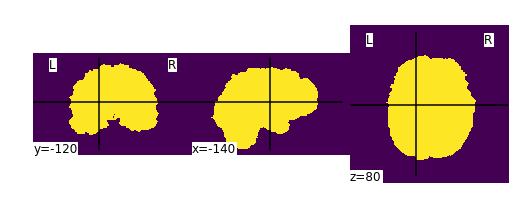

showing mask from given subset of dataset
257
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat393_0001/VSD.Brain.XX.O.MR_Flair.41088/VSD.Brain.XX.O.MR_Flair.41088.nii/mask.nii.gz
showing generated mask


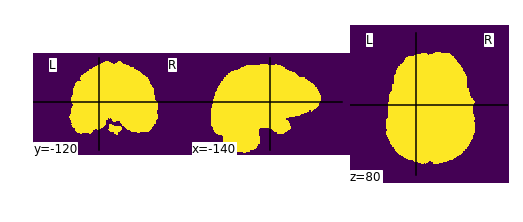

showing mask from given subset of dataset
258
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat402_0001/VSD.Brain.XX.O.MR_Flair.36246/VSD.Brain.XX.O.MR_Flair.36246.nii/mask.nii.gz
showing generated mask


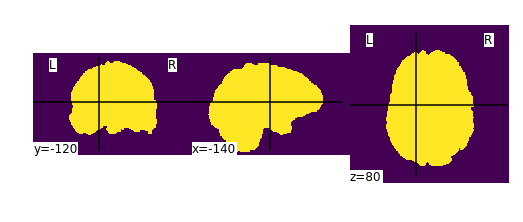

showing mask from given subset of dataset
259
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat408_0001/VSD.Brain.XX.O.MR_Flair.41092/VSD.Brain.XX.O.MR_Flair.41092.nii/mask.nii.gz
showing generated mask


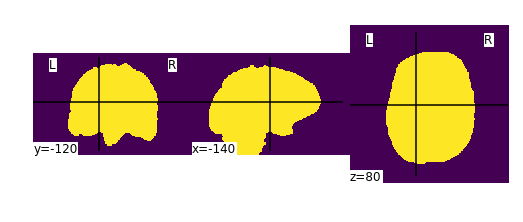

showing mask from given subset of dataset
260
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat410_0001/VSD.Brain.XX.O.MR_Flair.41100/VSD.Brain.XX.O.MR_Flair.41100.nii/mask.nii.gz
showing generated mask


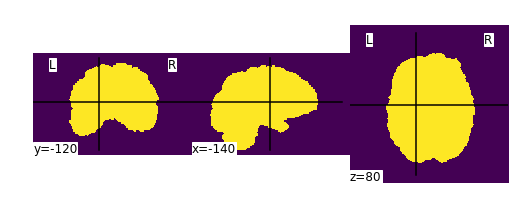

showing mask from given subset of dataset
261
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat413_0001/VSD.Brain.XX.O.MR_Flair.36276/VSD.Brain.XX.O.MR_Flair.36276.nii/mask.nii.gz
showing generated mask


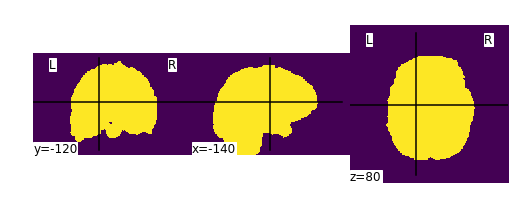

showing mask from given subset of dataset
262
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat420_0001/VSD.Brain.XX.O.MR_Flair.41104/VSD.Brain.XX.O.MR_Flair.41104.nii/mask.nii.gz
showing generated mask


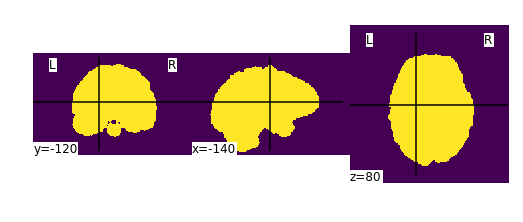

showing mask from given subset of dataset


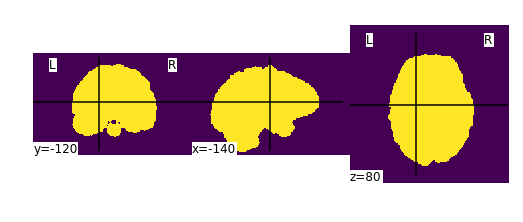

263
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat428_0001/VSD.Brain.XX.O.MR_Flair.36307/VSD.Brain.XX.O.MR_Flair.36307.nii/mask.nii.gz
showing generated mask


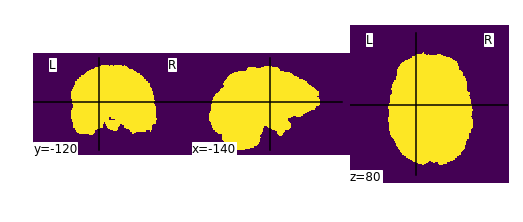

showing mask from given subset of dataset


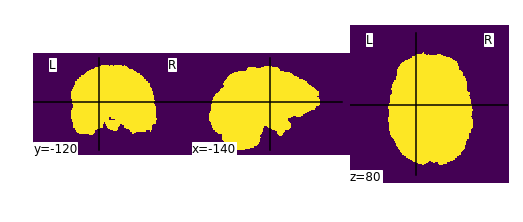

264
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat442_0001/VSD.Brain.XX.O.MR_Flair.36506/VSD.Brain.XX.O.MR_Flair.36506.nii/mask.nii.gz
showing generated mask


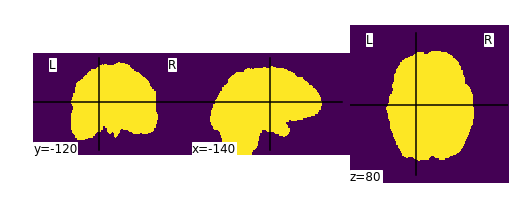

showing mask from given subset of dataset
265
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat449_0001/VSD.Brain.XX.O.MR_Flair.36540/VSD.Brain.XX.O.MR_Flair.36540.nii/mask.nii.gz
showing generated mask


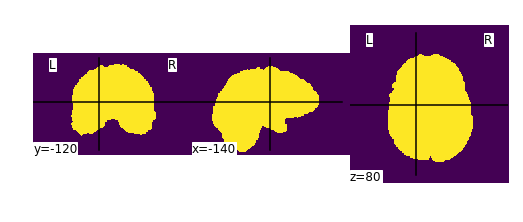

showing mask from given subset of dataset
266
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat451_0001/VSD.Brain.XX.O.MR_Flair.41139/VSD.Brain.XX.O.MR_Flair.41139.nii/mask.nii.gz
showing generated mask


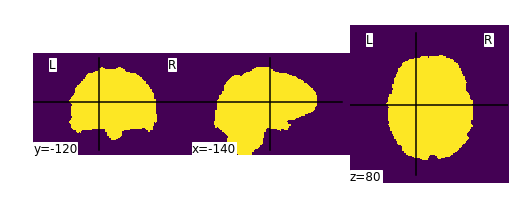

showing mask from given subset of dataset


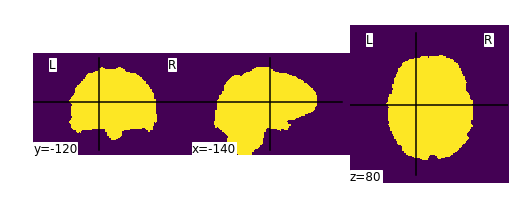

267
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat462_0001/VSD.Brain.XX.O.MR_Flair.41143/VSD.Brain.XX.O.MR_Flair.41143.nii/mask.nii.gz
showing generated mask


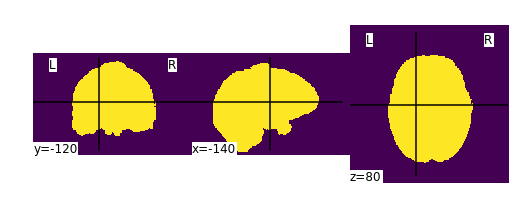

showing mask from given subset of dataset


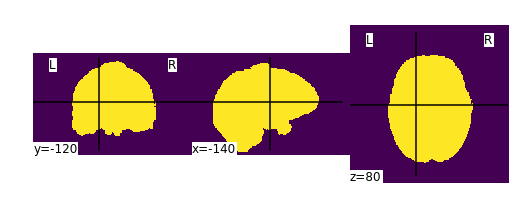

268
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat466_0001/VSD.Brain.XX.O.MR_Flair.36559/VSD.Brain.XX.O.MR_Flair.36559.nii/mask.nii.gz
showing generated mask


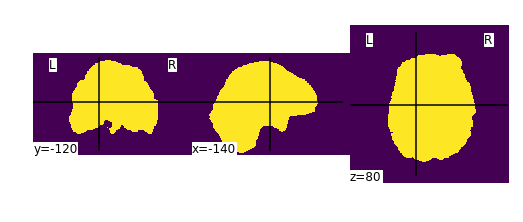

showing mask from given subset of dataset


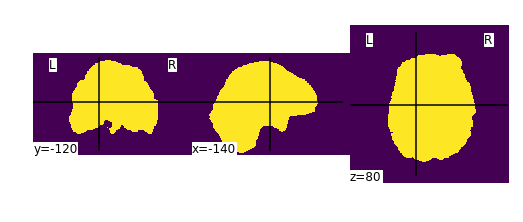

269
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat470_0001/VSD.Brain.XX.O.MR_Flair.41147/VSD.Brain.XX.O.MR_Flair.41147.nii/mask.nii.gz
showing generated mask


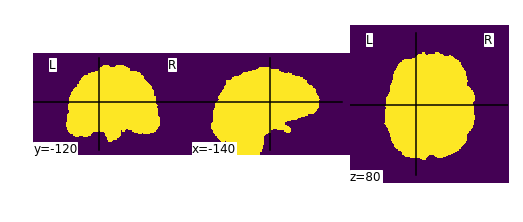

showing mask from given subset of dataset


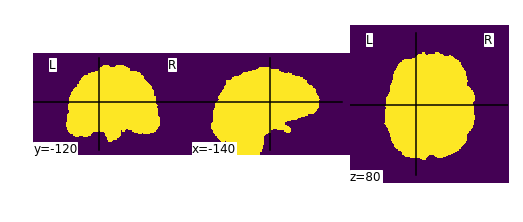

270
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat480_0001/VSD.Brain.XX.O.MR_Flair.41151/VSD.Brain.XX.O.MR_Flair.41151.nii/mask.nii.gz
showing generated mask


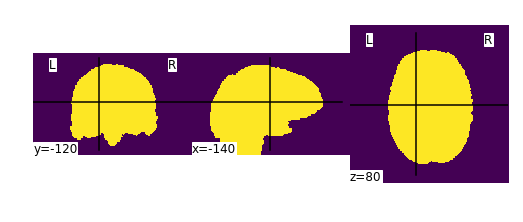

showing mask from given subset of dataset


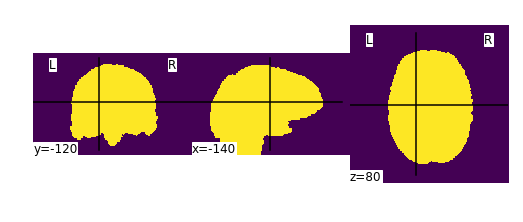

271
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat483_0001/VSD.Brain.XX.O.MR_Flair.36595/VSD.Brain.XX.O.MR_Flair.36595.nii/mask.nii.gz
showing generated mask


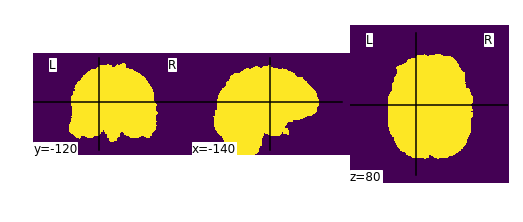

showing mask from given subset of dataset


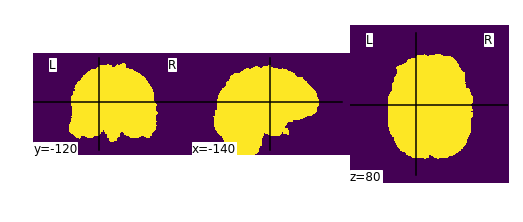

272
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat490_0001/VSD.Brain.XX.O.MR_Flair.36599/VSD.Brain.XX.O.MR_Flair.36599.nii/mask.nii.gz
showing generated mask


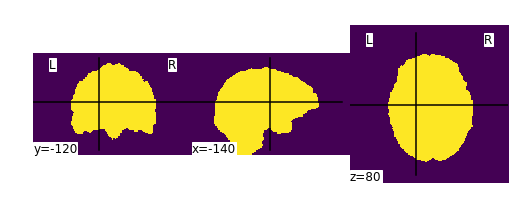

showing mask from given subset of dataset


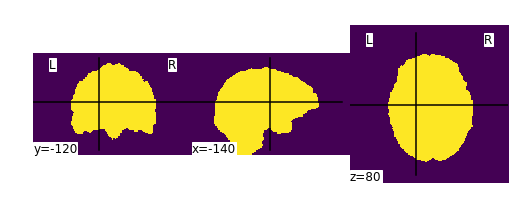

273
/data2/brats2015_converted/BRATS2015_Training/LGG/brats_tcia_pat493_0001/VSD.Brain.XX.O.MR_Flair.36607/VSD.Brain.XX.O.MR_Flair.36607.nii/mask.nii.gz
showing generated mask


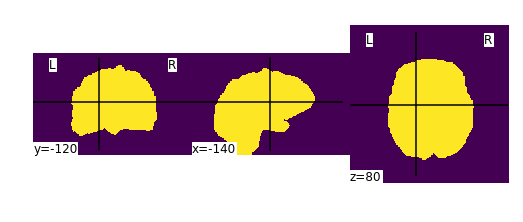

showing mask from given subset of dataset


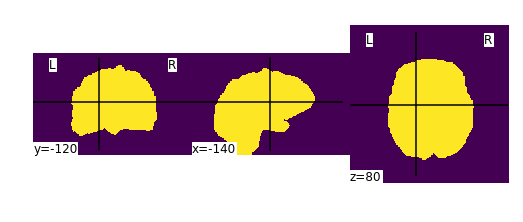

DONE


/home/arissa/miniconda3/envs/brats/lib/python3.6/site-packages/ipykernel_launcher.py:56: ResourceWarning: unclosed file <_io.TextIOWrapper name='brats2015nii_list.txt' mode='r' encoding='UTF-8'>


In [15]:
cut_coords = (-140, -120, 80)
def original_code_generate_masks_on_full_dataset():
    skip = 5
    testf = open('brats2015nii_list.txt', 'r')
    test_dir = testf.readlines()
    for i in range(int(len(test_dir)/5)):
        print(i)
        direct,_ = test_dir[skip*i].split("\n")    
        # read the images and ground truth
#         images0 = nib.load(direct).get_data()
        images0 = nib.load(direct+'.gz').get_data()
        images0 = np.expand_dims(images0, axis=0)

        direct1,_ = test_dir[skip*i + 1].split("\n")    
        # read the images and ground truth
#         images1 = nib.load(direct1).get_data()
        images1 = nib.load(direct1+'.gz').get_data()
        images1 = np.expand_dims(images1, axis=0)

        direct2,_ = test_dir[skip*i + 2].split("\n")    
        # read the images and ground truth
#         images2 = nib.load(direct2).get_data()
        images2 = nib.load(direct2+'.gz').get_data()
        images2 = np.expand_dims(images2, axis=0)

        direct3,_ = test_dir[skip*i + 3].split("\n")    
        # read the images and ground truth
#         images3 = nib.load(direct3).get_data()
        images3 = nib.load(direct3+'.gz').get_data()
        images3 = np.expand_dims(images3, axis=0)

        images = np.concatenate((images0, images1, images2, images3), axis=0)

        image = np.max(images, axis=0)
        image = np.swapaxes(image, 0, 2)
        image[image>0] =1
        image = image.astype(dtype=np.uint8)
        if not os.path.exists(direct):
            os.makedirs(direct)
        image = sitk.GetImageFromArray(image)
        sitk.WriteImage(image, direct + "/mask.nii.gz")
        print(direct + "/mask.nii.gz")
        print("showing generated mask")
        plotting.plot_img(direct + "/mask.nii.gz", cut_coords=cut_coords)
        plotting.show()
        try:
            print("showing mask from given subset of dataset")
            example_mask = "./" + direct[46:] + "/mask.nii.gz"
#             print(example_mask)
            plotting.plot_img(example_mask, cut_coords=cut_coords)
            plotting.show()
        except:
            pass
#         break
    print("DONE")
original_code_generate_masks_on_full_dataset()

In [ ]:


# testf = open('test.txt', 'r')
# test_dir = testf.readlines()

# for i in range(int(len(test_dir))):
#     i = i + 1
#     print("image" + str(i))
	
#     if i % 5 == 4:
#         continue

#     direct_mask,_ = test_dir[5 * int(i/5)].split("\n")    
#     direct_image,_ = test_dir[i].split("\n")    
#     direct_mask = direct_mask + "/mask.nii.gz"
#     direct_image = direct_image +".gz"
    
#     pathToMainFolderWithSubjects = "./HGG/"
#     subjectsToProcess = os.listdir(pathToMainFolderWithSubjects)
#     subjectsToProcess.sort()
 
#     saveOutput = True
#     prefixToAddToOutp = "_zNorm2StdsMu"
     
#     dtypeToSaveOutput = "float32"
#     saveNormalizationPlots = True
         

#     lowHighCutoffPercentile = [5., 95.]
#     lowHighCutoffTimesTheStd = [3., 3.]
#     cutoffAtWholeImgMean = True 
# #     pdb.set_trace()
#     path = "/data2/arissa/Autofocus-Layer/data_preprocessing/data_normalization/generate_normal.py"
#     normalizationModule.do_normalization( __file__,
# 				pathToMainFolderWithSubjects,
# 				subjectsToProcess,
# 				direct_image,direct_mask,				
# 				saveOutput,
# 				prefixToAddToOutp,				
# 				dtypeToSaveOutput,
# 				saveNormalizationPlots,								
# 				lowHighCutoffPercentile, # Can be None
# 				lowHighCutoffTimesTheStd, # Can be None
# 				cutoffAtWholeImgMean,
# 				)



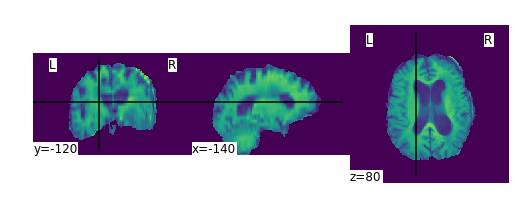

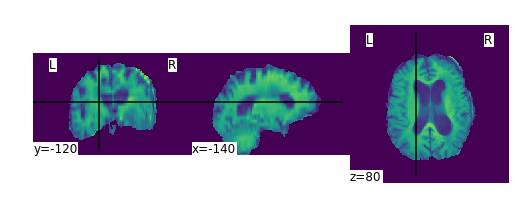

In [16]:
def view_normalized():
    impath = "/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat200_0210/VSD.Brain.XX.O.MR_T1.40898/VSD.Brain.XX.O.MR_T1.40898.nii.gz"
    normalized_path = "/data2/brats2015_converted/BRATS2015_Training/HGG/brats_tcia_pat200_0210/VSD.Brain.XX.O.MR_T1.40898/VSD.Brain.XX.O.MR_T1.40898_normalized.nii.gz"
    plotting.plot_img(impath, cut_coords=cut_coords)
    plotting.show()

    plotting.plot_img(normalized_path, cut_coords=cut_coords)
    plotting.show()
# view_normalized()
    

In [23]:
def write_files_to_list_nii_normalized():
    skip = 5
    nii_f = open('brats2015nii_list.txt', 'r')
    nii_files = nii_f.readlines()
    nii_f.close()
    assert len(nii_files) == 1100 + 270
    
    nii_normalized_f = open('brats2015_nii_normalized_list.txt', 'w')
    count = 0
    for i in range(len(nii_files)):
        new_filepath = nii_files[i].split("\n")[0]
        if i % skip != skip - 1:
            new_filepath = new_filepath[:-4] + "_normalized.nii"
            print(new_filepath)
        nii_normalized_f.write(new_filepath + "\n")
#         print(mha_files[i])
        count += 1
    assert count == 1100 + 270
    nii_f.close()
    print("Done")
write_files_to_list_nii_normalized()

/data2/brats2015_converted/BRATS2015_Training/HGG/brats_2013_pat0001_1/VSD.Brain.XX.O.MR_Flair.54512/VSD.Brain.XX.O.MR_Flair.54512_normalized.nii
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_2013_pat0001_1/VSD.Brain.XX.O.MR_T1.54513/VSD.Brain.XX.O.MR_T1.54513_normalized.nii
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_2013_pat0001_1/VSD.Brain.XX.O.MR_T1c.54514/VSD.Brain.XX.O.MR_T1c.54514_normalized.nii
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_2013_pat0001_1/VSD.Brain.XX.O.MR_T2.54515/VSD.Brain.XX.O.MR_T2.54515_normalized.nii
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_2013_pat0002_1/VSD.Brain.XX.O.MR_Flair.54518/VSD.Brain.XX.O.MR_Flair.54518_normalized.nii
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_2013_pat0002_1/VSD.Brain.XX.O.MR_T1.54519/VSD.Brain.XX.O.MR_T1.54519_normalized.nii
/data2/brats2015_converted/BRATS2015_Training/HGG/brats_2013_pat0002_1/VSD.Brain.XX.O.MR_T1c.54520/VSD.Brain.XX.O.MR_T1c.54520_normalized.nii
/dat

/home/arissa/miniconda3/envs/brats/lib/python3.6/site-packages/ipykernel_launcher.py:21: ResourceWarning: unclosed file <_io.TextIOWrapper name='brats2015_nii_normalized_list.txt' mode='w' encoding='UTF-8'>
